#AUXILARY FUNCTIONS

In [120]:
import numpy as np
import cv2 as cv
import os
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

working_directory = os.getcwd()

In [121]:
def get_descriptor(descriptor=cv.AKAZE_create(), filename='ideal.jpg'):
    image = cv.imread(filename)
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    kp, des = descriptor.detectAndCompute(gray_image, None)
    print(des.shape)
    return kp, des


def experiment(descriptor=cv.AKAZE_create(), ideal_name='ideal.jpg', result_dir='Results'):
    try:
        os.mkdir(working_directory + '\\' + result_dir)
    except FileExistsError:
        pass

    ideal = cv.imread(ideal_name)
    h, w, d = ideal.shape
    plt.imshow(ideal)
    plt.show()

    gray_ideal = cv.cvtColor(ideal, cv.COLOR_BGR2GRAY)
    kp_ideal, des_ideal = descriptor.detectAndCompute(gray_ideal, None)

    result = cv.drawKeypoints(gray_ideal, kp_ideal[-200:], None, color=(255, 0, 0),
                              flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(result)
    plt.show()
    # np.savetxt('key_points.txt', kp_ideal, delimiter=' ', fmt='%.0f')
    np.savetxt('descriptor.txt', des_ideal, delimiter='\t', fmt='%.0f')
    print(h, w, d)
    print(des_ideal.shape)

    return kp_ideal, des_ideal

In [122]:
def get_data(descriptor,max_feature_value,positive_folders=['Positive'], negative_folders=['Negative']):
    working_directory = os.getcwd()
    positives = [working_directory + '\\' + positive_folder for positive_folder in positive_folders]
    negatives = [working_directory + '\\' + negative_folder for negative_folder in negative_folders]

    positive_examples = []
#     i=1
    for positive in positives:
        for filename in os.listdir(positive):
    #         print(i)
    #         i+=1
            try:
                kp, des = get_descriptor(descriptor=descriptor,filename=positive + '\\' + filename)
            except AttributeError:
                continue

    #         if len(des) >= 100 and len(des)<90000:
            positive_examples.append(des / max_feature_value)  # here

    negative_examples = []
#     i=1
    for negative in negatives:
        for filename in os.listdir(negative):
    #         print(i)
    #         i+=1
            try:
                kp, des = get_descriptor(descriptor=descriptor,filename=negative + '\\' + filename)
            except AttributeError:
                continue
        
#         if len(des) >= 100 and len(des)<90000:
            negative_examples.append(des / max_feature_value)  # here

    labels_data = [1] * len(positive_examples) + [0] * len(negative_examples)
    return np.asarray(positive_examples + negative_examples), np.asarray(labels_data)
    # here we need to change the way of including keypoints



In [123]:
from collections import Counter
def count(data,clasterizator,N_cl=100):
    marked_data = []
    keys = range(0,N_cl)
    for t in data:
        cnt = Counter(clasterizator.predict(t))
        t_freq = [(cnt[c]+0.)/len(t) for c in keys]
        marked_data.append(np.array(t_freq))
    return marked_data

In [124]:
# descriptor=cv.AKAZE_create()
# kp,des1 = get_descriptor(descriptor)
# print(des1.shape)
# print(des1[0])

# descriptor=cv.SIFT_create()
# kp,des1 = get_descriptor(descriptor)
# print(des1.shape)
# print(des1[0])

# descriptor=cv.ORB_create()
# kp,des1 = get_descriptor(descriptor)
# print(des1.shape)
# print(des1[0])

SIFT = cv.SIFT_create()
ORB = cv.ORB_create()
AKAZE = cv.AKAZE_create()
max_values = {'SIFT':127.,'ORB':255.,'AKAZE':255.}
descriptors = {'SIFT':SIFT,'ORB':ORB,'AKAZE':AKAZE}

# Main

In [125]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score,precision_score,f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
from matplotlib import cm
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [135]:
des,des_name,des_max_value = descriptors['SIFT'],'SIFT',max_values['SIFT']
obj = 'cat'
cat_set,labels = get_data(positive_folders=['cat_positive'],negative_folders = ['cat_negative'],
                          descriptor=des,max_feature_value=des_max_value)
X_train,X_cv,y_train,y_cv =train_test_split(cat_set,labels,test_size=0.25,random_state=0)


(180, 128)
(2794, 128)
(103, 128)
(157, 128)
(13298, 128)
(3179, 128)
(563, 128)
(1457, 128)
(300, 128)
(220, 128)
(6469, 128)
(137, 128)
(177, 128)
(451, 128)
(354, 128)
(296, 128)
(353, 128)
(2467, 128)
(11766, 128)
(815, 128)
(568, 128)
(987, 128)
(88, 128)
(657, 128)
(26318, 128)
(17371, 128)
(17911, 128)
(131, 128)
(181, 128)
(131, 128)
(5014, 128)
(12253, 128)
(7888, 128)
(4218, 128)
(2340, 128)
(590, 128)
(3082, 128)
(909, 128)
(3242, 128)
(527, 128)
(217, 128)
(2177, 128)
(1193, 128)
(1128, 128)
(1506, 128)
(177, 128)
(184, 128)
(145, 128)
(894, 128)
(761, 128)
(127, 128)
(1528, 128)
(215, 128)
(52, 128)
(240, 128)
(105, 128)
(430, 128)
(437, 128)
(2070, 128)
(1678, 128)
(3649, 128)
(5234, 128)
(1138, 128)
(1694, 128)
(416, 128)
(1396, 128)
(3698, 128)
(6642, 128)
(5317, 128)
(32849, 128)
(19663, 128)
(20055, 128)
(18437, 128)
(12317, 128)
(493, 128)
(48847, 128)
(68175, 128)
(73522, 128)
(697, 128)
(8902, 128)
(2917, 128)
(432, 128)
(6551, 128)
(3326, 128)
(303, 128)
(90, 128)

In [136]:
len(labels)

222

[10, 30, 50, 100, 150, 300, 500]
[10, 30, 50, 100, 150, 300, 500]
[10, 30, 50, 100, 150, 300, 500]
[10, 30, 50, 100, 150, 300, 500]
[10, 30, 50, 100, 150, 300, 500]
[10, 30, 50, 100, 150, 300, 500]
[10, 30, 50, 100, 150, 300, 500]


C:\Users\Serg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\Users\Serg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\Users\Serg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  cluster_centers = _init_centroids(


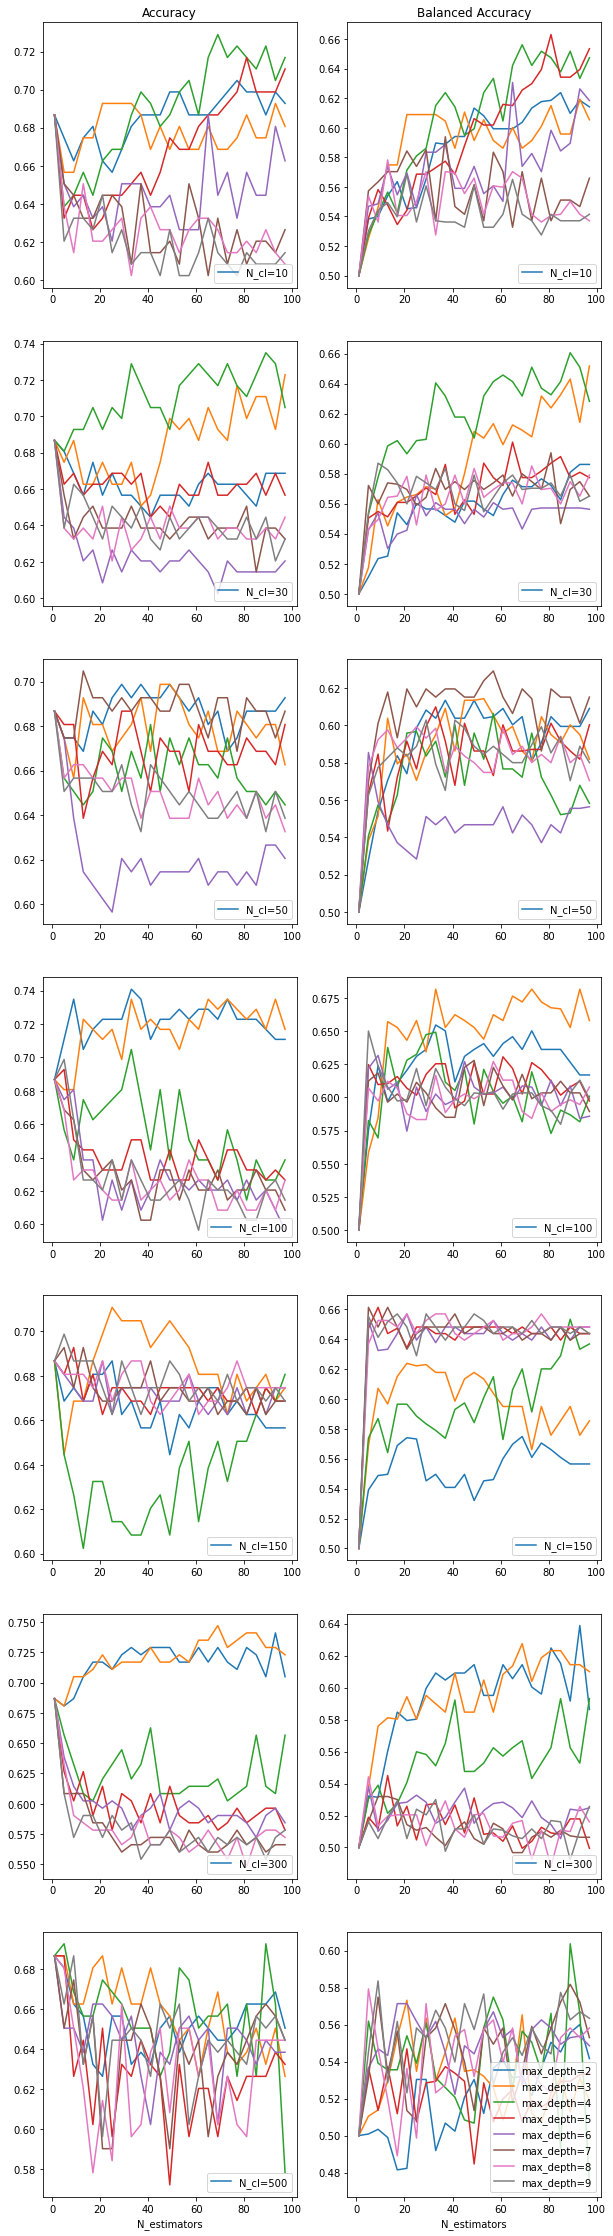

In [137]:
fig, ax = plt.subplots(7,2)
cv_results = []
N_cls = [10,30,50,100,150,300,500]
for i,N_cl in enumerate(N_cls):
    print(N_cls)
    clasterizator = MiniBatchKMeans(n_clusters=N_cl, random_state=0, max_iter=300)
    points = np.array([j  for i in X_train for j in i])
    clasterizator.fit(points)
    X_train_marked = count(X_train,clasterizator,N_cl)
    X_cv_marked = count(X_cv,clasterizator,N_cl)
    param_grid = {
    'max_depth' : range(2,10),
    'n_estimators' : range(1,100,4)
}
    scoring = {'Accuracy': make_scorer(accuracy_score),'Balanced':
               make_scorer(balanced_accuracy_score)}
    clf = GridSearchCV(GradientBoostingClassifier(), param_grid,
                       return_train_score=True,scoring=scoring,refit='Balanced',cv=2)
    clf.fit(X_train_marked, y_train)
    results = pd.DataFrame(clf.cv_results_)
    
    d,n = clf.best_params_['max_depth'],clf.best_params_['n_estimators']
    clas = GradientBoostingClassifier(max_depth=d,n_estimators=n)
    clas.fit(X_train_marked,y_train)
    
    a = accuracy_score(y_cv,clas.predict(X_cv_marked))
    p = precision_score(y_cv,clas.predict(X_cv_marked))
    r = recall_score(y_cv,clas.predict(X_cv_marked))
    cv_results.append([N_cl,d,n,a,p,r])
    
    dump(clasterizator, des_name + '_clasterizator_'+str(N_cl)+'.joblib')
    dump(clas,des_name + "_classifier_"+str(N_cl)+'.joblib')
    
    grouped = results.groupby(by=["param_max_depth"])
    for key, group in grouped:
#         group.plot(ax=ax[i,0], kind='line', x='param_n_estimators', y='mean_test_Accuracy',
#                    label=key,title='Accuracy N_cl = '+str(N_cl),figsize=(15,10),legend='false')
#         group.plot(ax=ax[i,1], kind='line', x='param_n_estimators', y='mean_test_Balanced', label=key,
#                    title='Balanced Accuracy N_cl = '+str(N_cl),figsize=(15,10),legend='true')
        group.plot(ax=ax[i,0], kind='line', x='param_n_estimators', y='mean_test_Accuracy',
                       label=key,title='Accuracy'*(i==0),figsize=(10,40))
        ax[i,0].legend(['N_cl='+str(N_cl)],loc='lower right')
#         plt.legend(loc='upper right')
        group.plot(ax=ax[i,1], kind='line', x='param_n_estimators', y='mean_test_Balanced', label=key,
                       title='Balanced Accuracy'*(i==0),figsize=(10,40))
        if i==6:
            ax[i,1].legend(['max_depth='+str(i) for i in range(2,10)],loc='lower right')
            ax[i,1].set_xlabel('N_estimators')
            ax[i,0].set_xlabel('N_estimators')
        else:
            ax[i,1].legend(['N_cl='+str(N_cl)],loc='lower right')
            ax[i,0].set_xlabel('')
            ax[i,1].set_xlabel('')

plt.savefig(obj+'_'+des_name+'_learning_curves.png', dpi=500)

cv_results_beautiful = pd.DataFrame(cv_results,columns=['N_cl','max_depth','n_estimators','accuracy','precision','recall'])
cv_results_beautiful.to_csv(obj +'_'+des_name+'_cv_report',sep='\t')
cv_results_beautiful

SIFT
(180, 128)
(2794, 128)
(103, 128)
(157, 128)
(13298, 128)
(3179, 128)
(563, 128)
(1457, 128)
(300, 128)
(220, 128)
(6469, 128)
(137, 128)
(177, 128)
(451, 128)
(354, 128)
(296, 128)
(353, 128)
(2467, 128)
(11766, 128)
(815, 128)
(568, 128)
(987, 128)
(88, 128)
(657, 128)
(26318, 128)
(17371, 128)
(17911, 128)
(131, 128)
(181, 128)
(131, 128)
(5014, 128)
(12253, 128)
(7888, 128)
(4218, 128)
(2340, 128)
(590, 128)
(3082, 128)
(909, 128)
(3242, 128)
(527, 128)
(217, 128)
(2177, 128)
(1193, 128)
(1128, 128)
(1506, 128)
(177, 128)
(184, 128)
(145, 128)
(894, 128)
(761, 128)
(127, 128)
(1528, 128)
(215, 128)
(52, 128)
(240, 128)
(105, 128)
(430, 128)
(437, 128)
(2070, 128)
(1678, 128)
(3649, 128)
(5234, 128)
(1138, 128)
(1694, 128)
(416, 128)
(1396, 128)
(3698, 128)
(6642, 128)
(5317, 128)
(32849, 128)
(19663, 128)
(20055, 128)
(18437, 128)
(12317, 128)
(493, 128)
(48847, 128)
(68175, 128)
(73522, 128)
(697, 128)
(8902, 128)
(2917, 128)
(432, 128)
(6551, 128)
(3326, 128)
(303, 128)
(90,

C:\Users\Serg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\Users\Serg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\Users\Serg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  cluster_centers = _init_centroids(


ORB
(364, 32)
(500, 32)
(322, 32)
(396, 32)
(500, 32)
(500, 32)
(362, 32)
(500, 32)
(490, 32)
(440, 32)
(500, 32)
(245, 32)
(326, 32)
(443, 32)
(500, 32)
(382, 32)
(485, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(354, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(113, 32)
(32, 32)
(172, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(417, 32)
(393, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(29, 32)
(214, 32)
(16, 32)
(500, 32)
(417, 32)
(289, 32)
(500, 32)
(180, 32)
(291, 32)
(350, 32)
(338, 32)
(353, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(384, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(452, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(367, 32)
(382, 32)
(500, 32)
(500, 32)
(357, 32)
(498, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(201, 32)
(500, 32)
(500, 32)

C:\Users\Serg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\Users\Serg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\Users\Serg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  cluster_centers = _init_centroids(


AKAZE
(71, 61)
(919, 61)
(101, 61)
(90, 61)
(5922, 61)
(4349, 61)
(553, 61)
(836, 61)
(269, 61)
(256, 61)
(3521, 61)
(148, 61)
(85, 61)
(122, 61)
(303, 61)
(127, 61)
(601, 61)
(1161, 61)
(4578, 61)
(970, 61)
(557, 61)
(784, 61)
(49, 61)
(207, 61)
(5680, 61)
(6288, 61)
(6169, 61)
(157, 61)
(191, 61)
(172, 61)
(496, 61)
(1266, 61)
(624, 61)
(260, 61)
(2973, 61)
(1094, 61)
(1478, 61)
(664, 61)
(1668, 61)
(336, 61)
(506, 61)
(1903, 61)
(634, 61)
(948, 61)
(1628, 61)
(217, 61)
(236, 61)
(208, 61)
(1565, 61)
(508, 61)
(26, 61)
(1184, 61)
(278, 61)
(61, 61)
(38, 61)
(46, 61)
(664, 61)
(514, 61)
(3784, 61)
(3626, 61)
(5867, 61)
(7472, 61)
(3723, 61)
(3875, 61)
(868, 61)
(2740, 61)
(4712, 61)
(12882, 61)
(11105, 61)
(18896, 61)
(8190, 61)
(10184, 61)
(8296, 61)
(7110, 61)
(837, 61)
(17463, 61)
(23356, 61)
(22166, 61)
(952, 61)
(1775, 61)
(1119, 61)
(669, 61)
(1855, 61)
(2006, 61)
(304, 61)
(12, 61)
(1348, 61)
(1029, 61)
(4, 61)
(356, 61)
(1251, 61)
(1513, 61)
(290, 61)
(2170, 61)
(767, 61)
(156

C:\Users\Serg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\Users\Serg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\Users\Serg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  cluster_centers = _init_centroids(


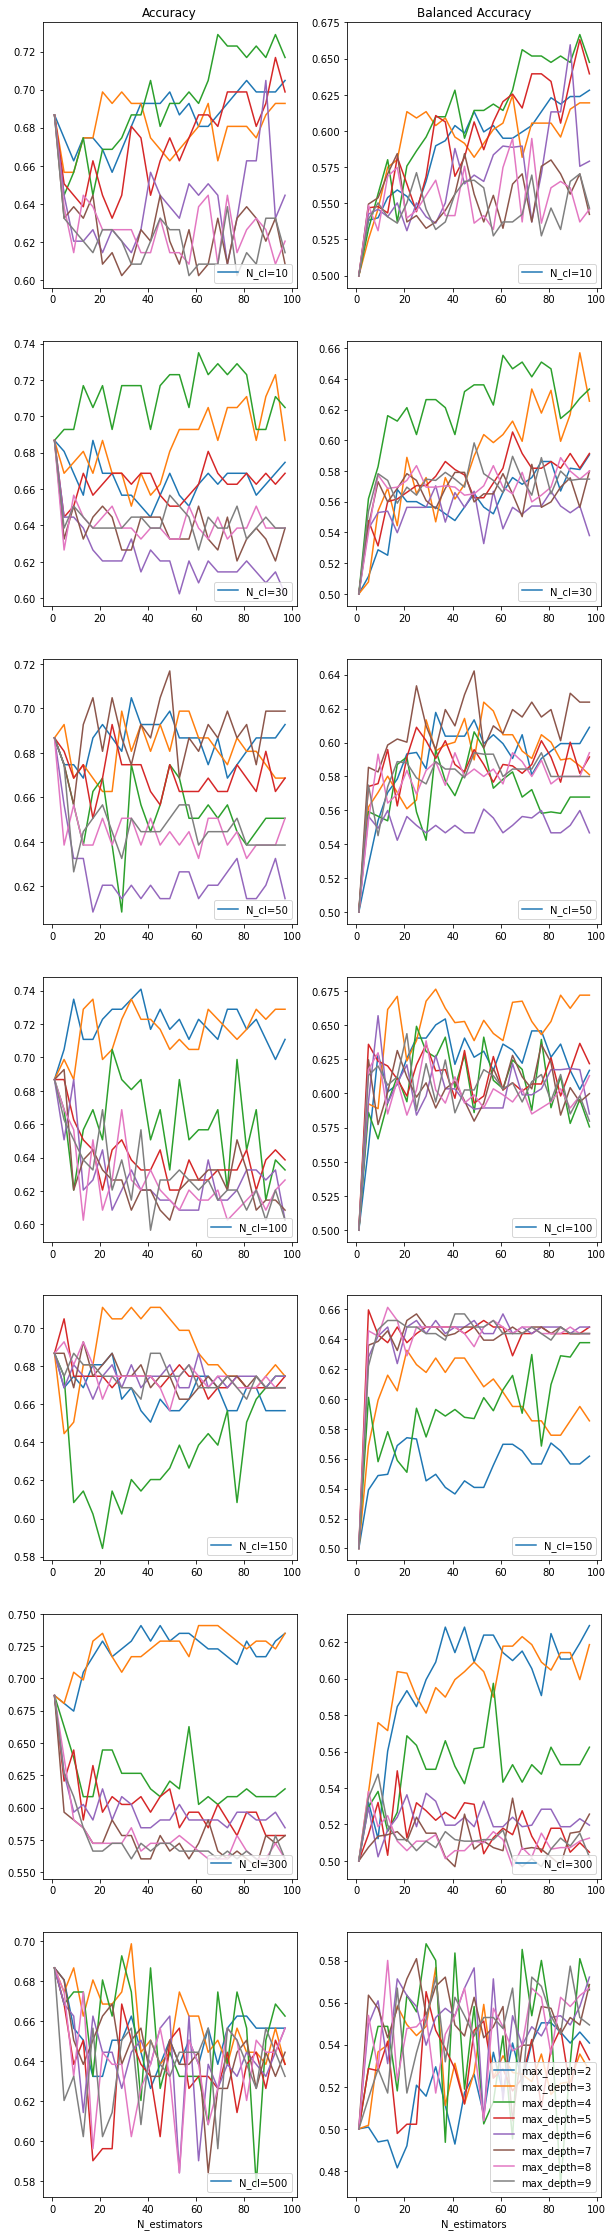

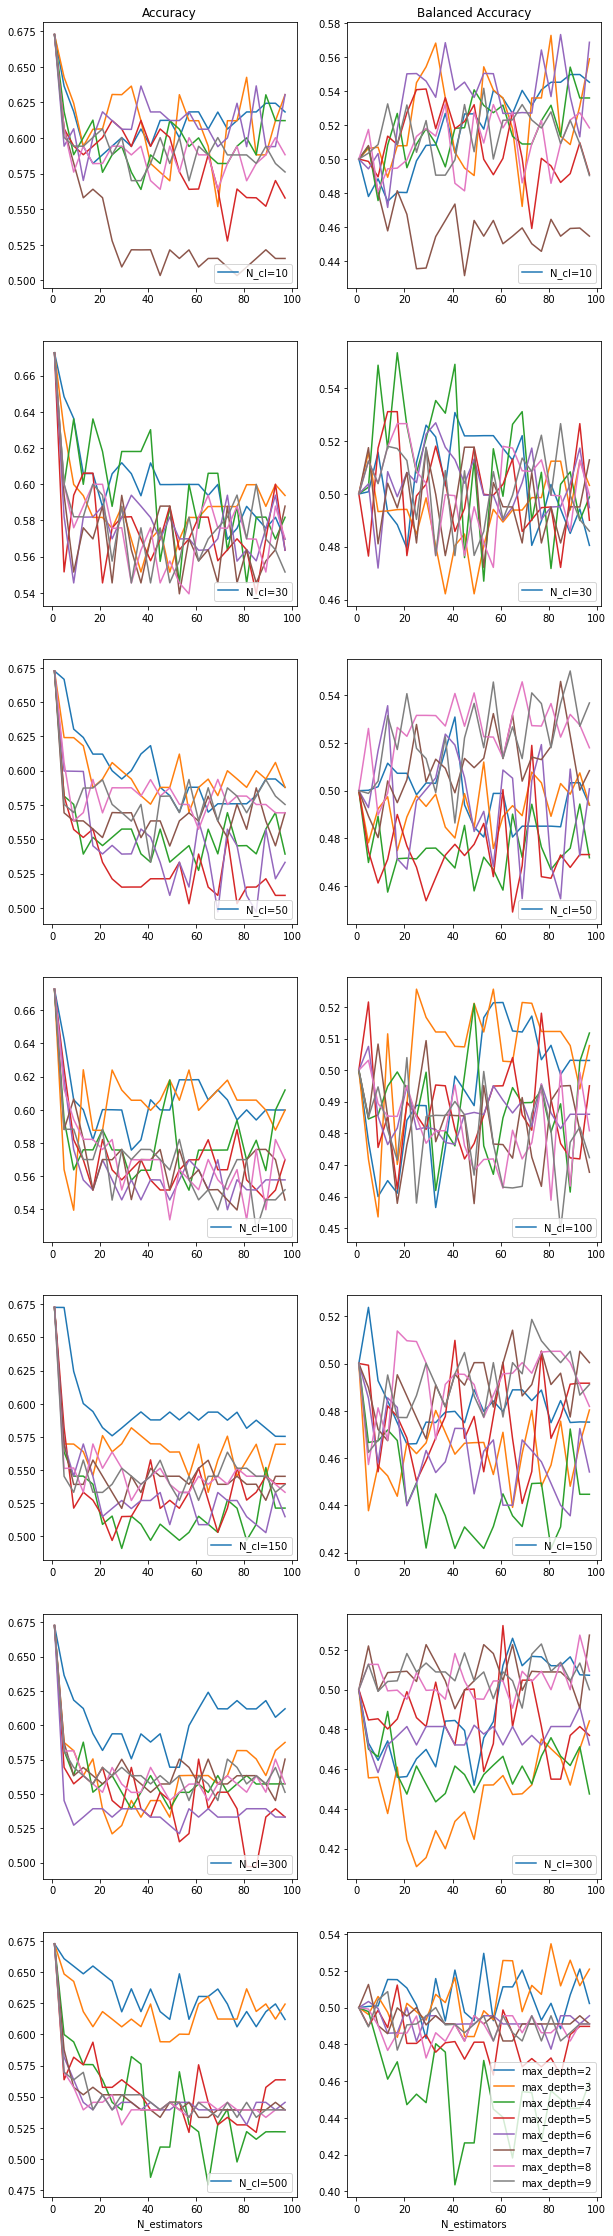

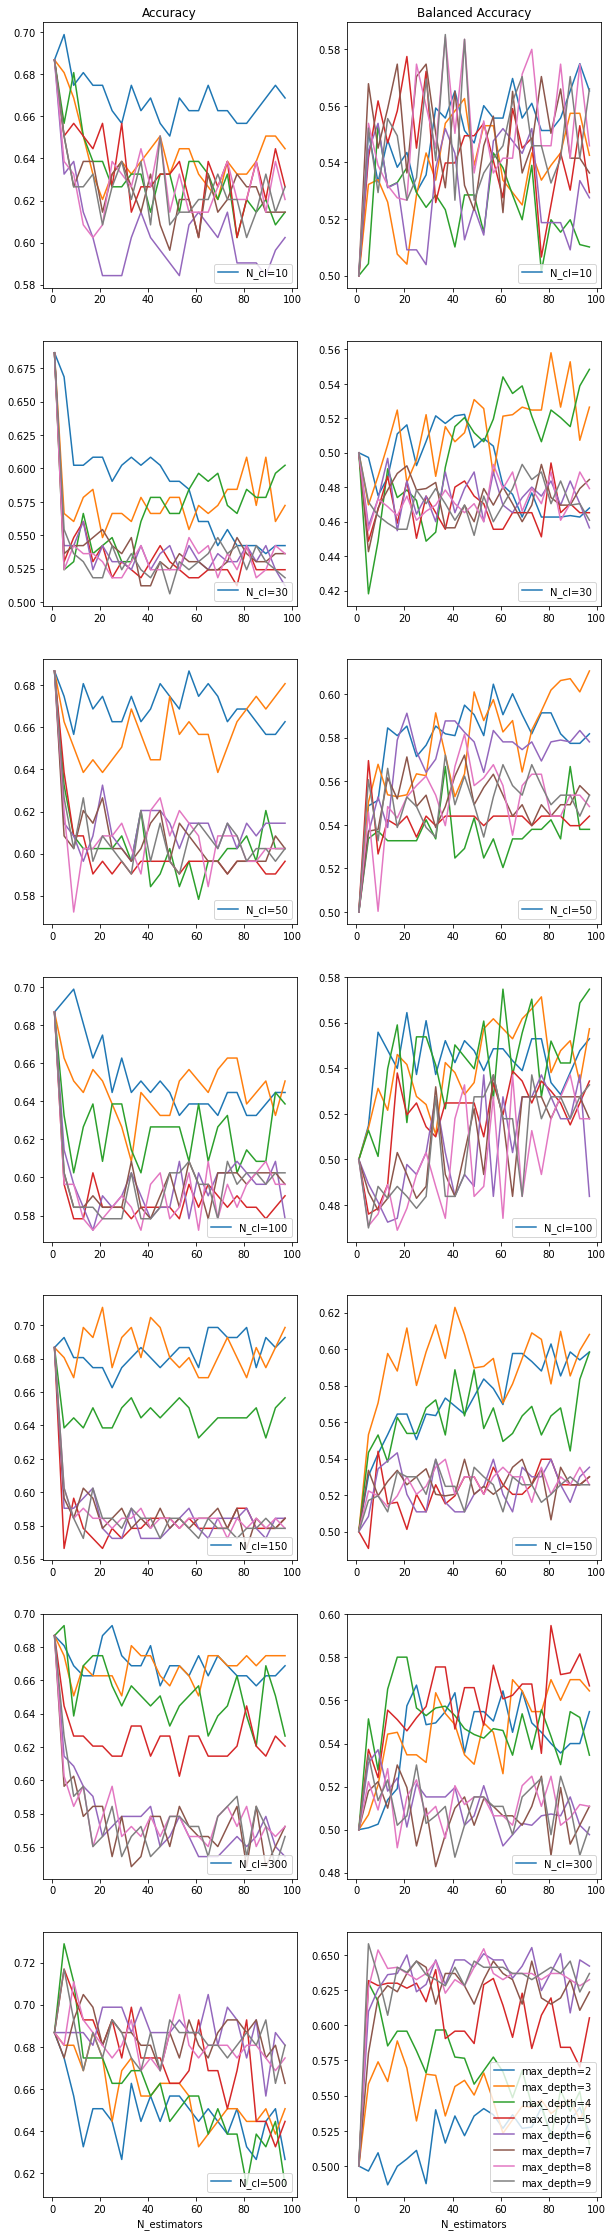

In [140]:
obj = 'cat'
N_cls = [10,30,50,100,150,300,500]
for d in ['SIFT','ORB','AKAZE']:
    des,des_name,des_max_value = descriptors[d],d,max_values[d]
    print(d)
    cat_set,labels = get_data(positive_folders=['cat_positive'],negative_folders = ['cat_negative'],
                          descriptor=des,max_feature_value=des_max_value)
    X_train,X_cv,y_train,y_cv =train_test_split(cat_set,labels,test_size=0.25,random_state=0)
    fig, ax = plt.subplots(7,2)
    cv_results = []
    for i,N_cl in enumerate(N_cls):
        print(N_cls)
        clasterizator = MiniBatchKMeans(n_clusters=N_cl, random_state=0, max_iter=300)
        points = np.array([j  for i in X_train for j in i])
        clasterizator.fit(points)
        X_train_marked = count(X_train,clasterizator,N_cl)
        X_cv_marked = count(X_cv,clasterizator,N_cl)
        param_grid = {
        'max_depth' : range(2,10),
        'n_estimators' : range(1,100,4)
    }
        scoring = {'Accuracy': make_scorer(accuracy_score),'Balanced':
                   make_scorer(balanced_accuracy_score)}
        clf = GridSearchCV(GradientBoostingClassifier(), param_grid,
                           return_train_score=True,scoring=scoring,refit='Balanced',cv=2)
        clf.fit(X_train_marked, y_train)
        results = pd.DataFrame(clf.cv_results_)

        d,n = clf.best_params_['max_depth'],clf.best_params_['n_estimators']
        clas = GradientBoostingClassifier(max_depth=d,n_estimators=n)
        clas.fit(X_train_marked,y_train)

        a = accuracy_score(y_cv,clas.predict(X_cv_marked))
        p = precision_score(y_cv,clas.predict(X_cv_marked))
        r = recall_score(y_cv,clas.predict(X_cv_marked))
        cv_results.append([N_cl,d,n,a,p,r])

        dump(clasterizator,obj+'_' + des_name + '_clasterizator_'+str(N_cl)+'.joblib')
        dump(clas,obj + '_' + des_name + "_classifier_"+str(N_cl)+'.joblib')

        grouped = results.groupby(by=["param_max_depth"])
        for key, group in grouped:
    #         group.plot(ax=ax[i,0], kind='line', x='param_n_estimators', y='mean_test_Accuracy',
    #                    label=key,title='Accuracy N_cl = '+str(N_cl),figsize=(15,10),legend='false')
    #         group.plot(ax=ax[i,1], kind='line', x='param_n_estimators', y='mean_test_Balanced', label=key,
    #                    title='Balanced Accuracy N_cl = '+str(N_cl),figsize=(15,10),legend='true')
            group.plot(ax=ax[i,0], kind='line', x='param_n_estimators', y='mean_test_Accuracy',
                           label=key,title='Accuracy'*(i==0),figsize=(10,40))
            ax[i,0].legend(['N_cl='+str(N_cl)],loc='lower right')
    #         plt.legend(loc='upper right')
            group.plot(ax=ax[i,1], kind='line', x='param_n_estimators', y='mean_test_Balanced', label=key,
                           title='Balanced Accuracy'*(i==0),figsize=(10,40))
            if i==6:
                ax[i,1].legend(['max_depth='+str(i) for i in range(2,10)],loc='lower right')
                ax[i,1].set_xlabel('N_estimators')
                ax[i,0].set_xlabel('N_estimators')
            else:
                ax[i,1].legend(['N_cl='+str(N_cl)],loc='lower right')
                ax[i,0].set_xlabel('')
                ax[i,1].set_xlabel('')

    plt.savefig(obj+'_'+des_name+'_learning_curves.png', dpi=500)

    cv_results_beautiful = pd.DataFrame(cv_results,columns=['N_cl','max_depth','n_estimators','accuracy','precision','recall'])
    cv_results_beautiful.to_csv(obj +'_'+des_name+'_cv_report',sep='\t')



In [370]:
# clasterizator = MiniBatchKMeans(n_clusters=N_cl, random_state=0, max_iter=300)
# points = np.array([j  for i in X_train for j in i])
# clasterizator.fit(points)
# X_train_marked = count(X_train,clasterizator,N_cl)

MiniBatchKMeans(max_iter=300, n_clusters=150, random_state=0)

SIFT
(45051, 128)
(139075, 128)
(103808, 128)
(110446, 128)
(94384, 128)
(14788, 128)
(132534, 128)
(102521, 128)
(111572, 128)
(49972, 128)
(18094, 128)
(36909, 128)
(22124, 128)
(29268, 128)
(61034, 128)
(50912, 128)
(5056, 128)
(11726, 128)
(62387, 128)
(151213, 128)
(7347, 128)
(102271, 128)
(4041, 128)
(84867, 128)
(59150, 128)
(14590, 128)
(67606, 128)
(285249, 128)
(8725, 128)
(13060, 128)
(21549, 128)
(45576, 128)
(5679, 128)
(25089, 128)
(17362, 128)
(5569, 128)
(1951, 128)
(213848, 128)
(21622, 128)
(68695, 128)
(273, 128)
(8635, 128)
(48980, 128)
(37927, 128)
(766, 128)
(4907, 128)
(223118, 128)
(2560, 128)
(3360, 128)
(20779, 128)
(2821, 128)
(11030, 128)
(222, 128)
(3636, 128)
(599, 128)
(1457, 128)
(12332, 128)
(51251, 128)
(1916, 128)
(11602, 128)
(16157, 128)
(195912, 128)
(5289, 128)
(1349, 128)
(87619, 128)
(31968, 128)
(291, 128)
(109, 128)
(2298, 128)
(216, 128)
(35438, 128)
(3382, 128)
(2888, 128)
(42839, 128)
(477, 128)
(13423, 128)
(1266, 128)
(278419, 128)
(3953

C:\Users\Serg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\Users\Serg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\Users\Serg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  cluster_centers = _init_centroids(


ORB
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(165, 32)
(500, 32)
(500, 32)
(500, 32)
(385, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(481, 32)
(500, 32)
(456, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(480, 32)
(500, 32)
(500, 32)
(500, 32)
(427, 32)
(401, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(461, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(493, 32)
(500, 

C:\Users\Serg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\Users\Serg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\Users\Serg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  cluster_centers = _init_centroids(


AKAZE
(20264, 61)
(67318, 61)
(51066, 61)
(53597, 61)
(58922, 61)
(8800, 61)
(63902, 61)
(57658, 61)
(59838, 61)
(29601, 61)
(14182, 61)
(13311, 61)
(10394, 61)
(13605, 61)
(34150, 61)
(27702, 61)
(3731, 61)
(6700, 61)
(33414, 61)
(50562, 61)
(5513, 61)
(47849, 61)
(2271, 61)
(53289, 61)
(35732, 61)
(11100, 61)
(33714, 61)
(118113, 61)
(4724, 61)
(6614, 61)
(9761, 61)
(25213, 61)
(2533, 61)
(10676, 61)
(13913, 61)
(3919, 61)
(2360, 61)
(64747, 61)
(11145, 61)
(32980, 61)
(46, 61)
(5350, 61)
(34704, 61)
(10160, 61)
(863, 61)
(7375, 61)
(86703, 61)
(1721, 61)
(1581, 61)
(8626, 61)
(2064, 61)
(460, 61)
(177, 61)
(3954, 61)
(245, 61)
(884, 61)
(519, 61)
(1013, 61)
(1665, 61)
(2893, 61)
(7497, 61)
(114316, 61)
(2720, 61)
(626, 61)
(47237, 61)
(25507, 61)
(209, 61)
(157, 61)
(46, 61)
(238, 61)
(1215, 61)
(3230, 61)
(1918, 61)
(123, 61)
(284, 61)
(6816, 61)
(643, 61)
(100079, 61)
(19164, 61)
(711, 61)
(116711, 61)
(28951, 61)
(16844, 61)
(57676, 61)
(55837, 61)
(7250, 61)
(75267, 61)
(65412, 

C:\Users\Serg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\Users\Serg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\Users\Serg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=500. Setting it to 3*k
  cluster_centers = _init_centroids(


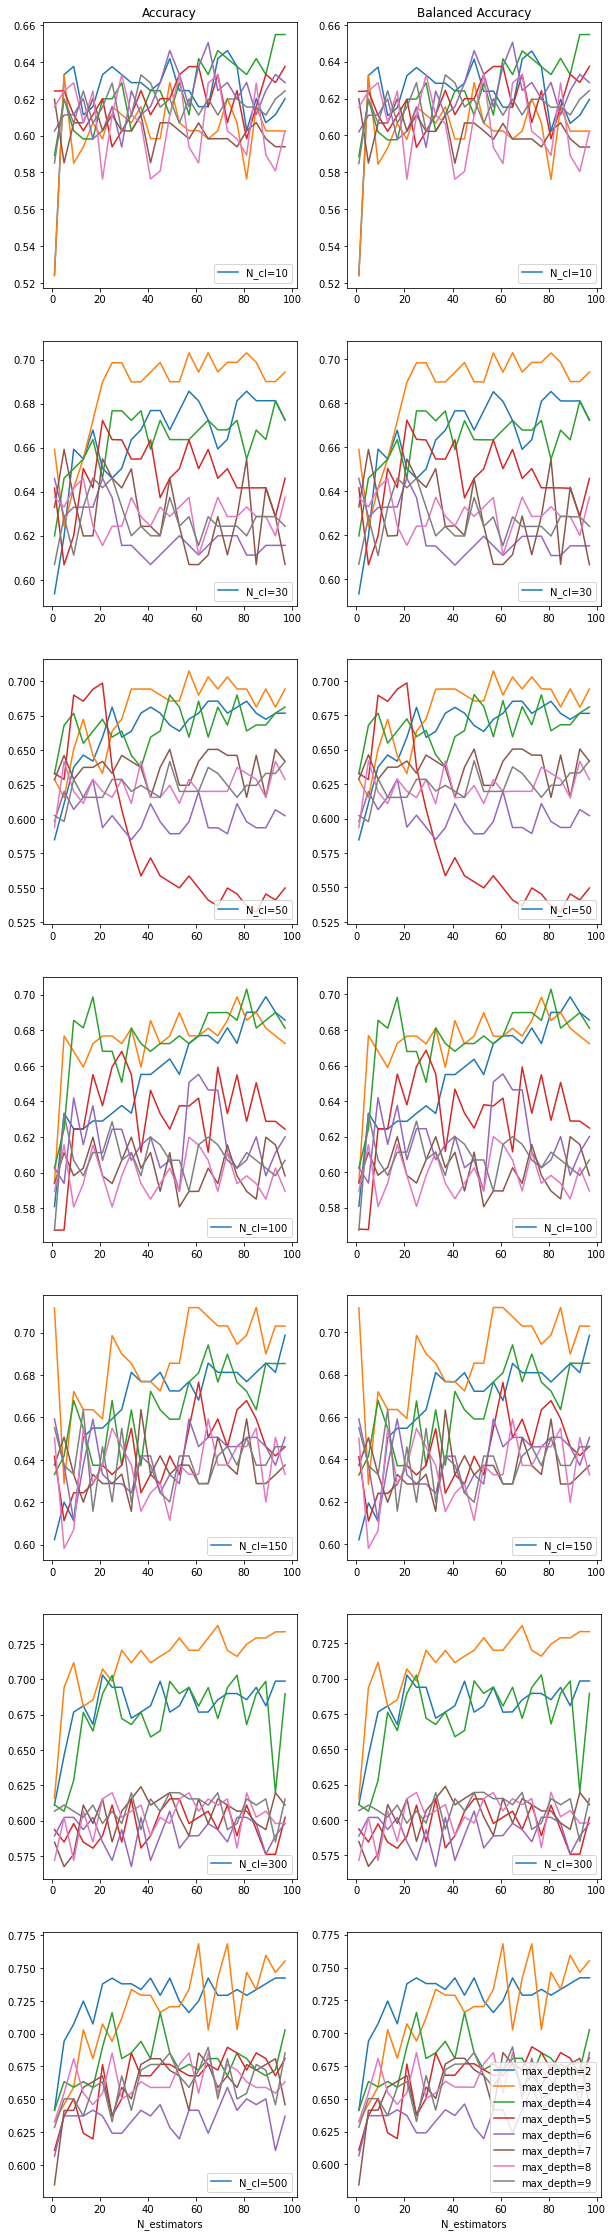

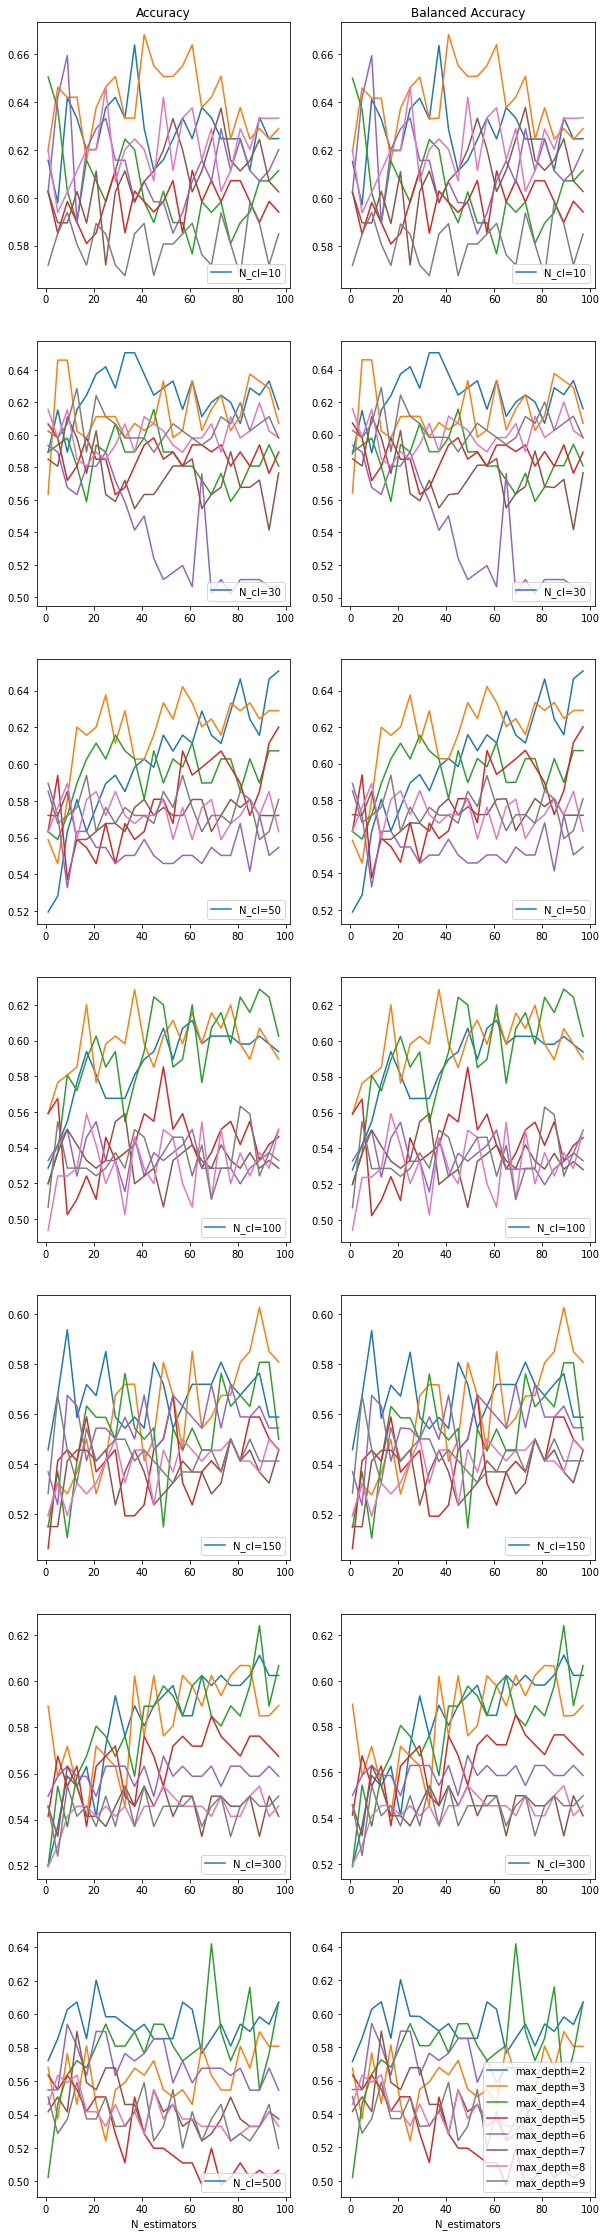

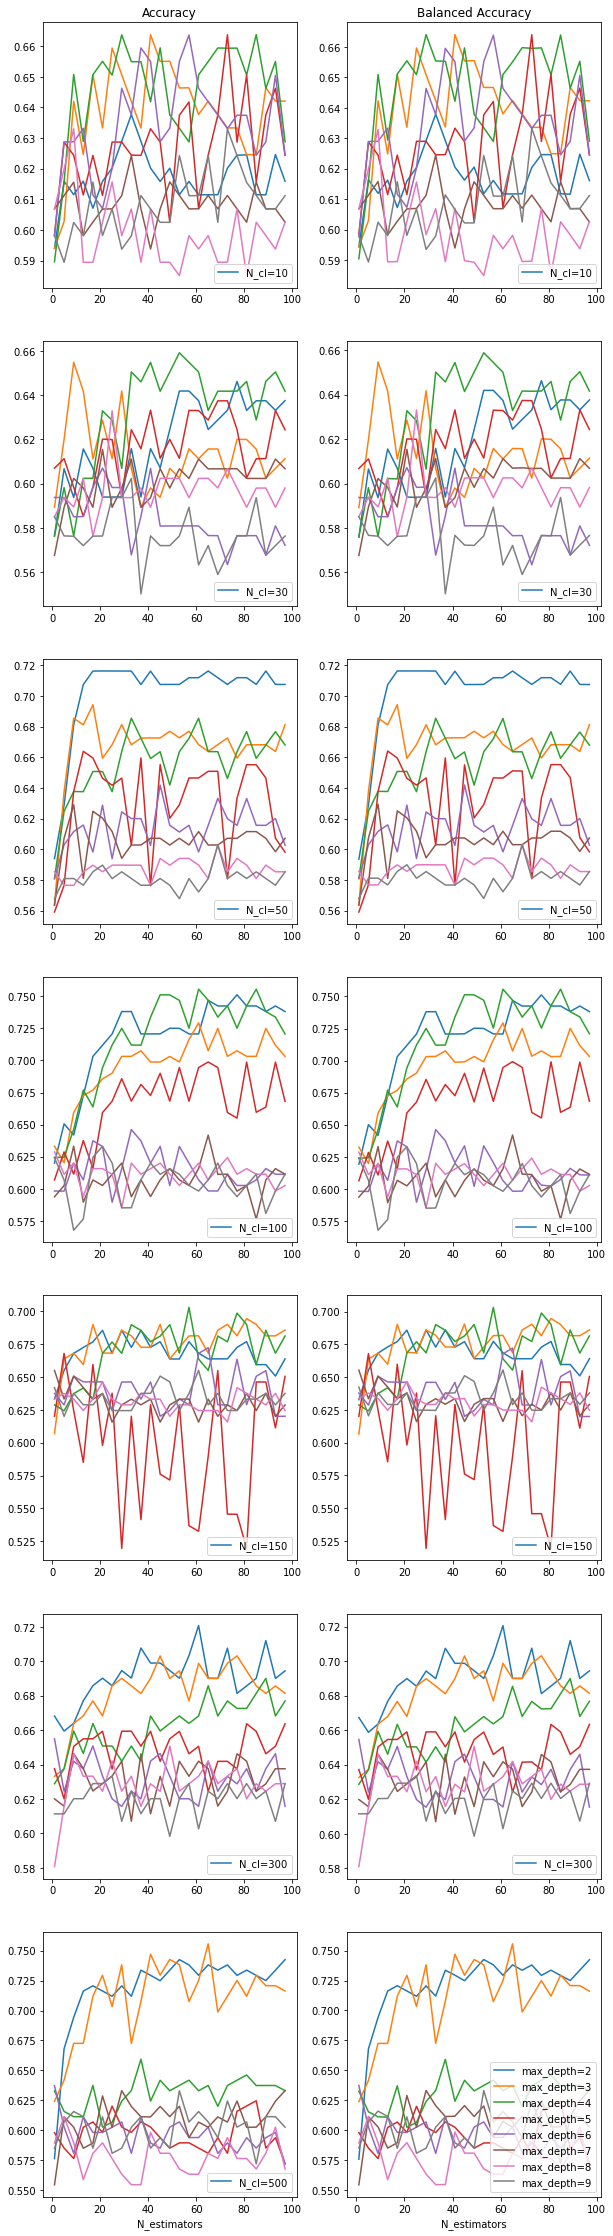

In [141]:
obj = 'gnome'
N_cls = [10,30,50,100,150,300,500]
for d in ['SIFT','ORB','AKAZE']:
    des,des_name,des_max_value = descriptors[d],d,max_values[d]
    print(d)
    cat_set,labels = get_data(positive_folders=['gnome'],negative_folders = ['not_gnome'],
                          descriptor=des,max_feature_value=des_max_value)
    X_train,X_cv,y_train,y_cv =train_test_split(cat_set,labels,test_size=0.25,random_state=0)
    fig, ax = plt.subplots(7,2)
    cv_results = []
    for i,N_cl in enumerate(N_cls):
        print(N_cls)
        clasterizator = MiniBatchKMeans(n_clusters=N_cl, random_state=0, max_iter=300)
        points = np.array([j  for i in X_train for j in i])
        clasterizator.fit(points)
        X_train_marked = count(X_train,clasterizator,N_cl)
        X_cv_marked = count(X_cv,clasterizator,N_cl)
        param_grid = {
        'max_depth' : range(2,10),
        'n_estimators' : range(1,100,4)
    }
        scoring = {'Accuracy': make_scorer(accuracy_score),'Balanced':
                   make_scorer(balanced_accuracy_score)}
        clf = GridSearchCV(GradientBoostingClassifier(), param_grid,
                           return_train_score=True,scoring=scoring,refit='Balanced',cv=2)
        clf.fit(X_train_marked, y_train)
        results = pd.DataFrame(clf.cv_results_)

        d,n = clf.best_params_['max_depth'],clf.best_params_['n_estimators']
        clas = GradientBoostingClassifier(max_depth=d,n_estimators=n)
        clas.fit(X_train_marked,y_train)

        a = accuracy_score(y_cv,clas.predict(X_cv_marked))
        p = precision_score(y_cv,clas.predict(X_cv_marked))
        r = recall_score(y_cv,clas.predict(X_cv_marked))
        cv_results.append([N_cl,d,n,a,p,r])

        dump(clasterizator,obj+'_' + des_name + '_clasterizator_'+str(N_cl)+'.joblib')
        dump(clas,obj + '_' + des_name + "_classifier_"+str(N_cl)+'.joblib')

        grouped = results.groupby(by=["param_max_depth"])
        for key, group in grouped:
    #         group.plot(ax=ax[i,0], kind='line', x='param_n_estimators', y='mean_test_Accuracy',
    #                    label=key,title='Accuracy N_cl = '+str(N_cl),figsize=(15,10),legend='false')
    #         group.plot(ax=ax[i,1], kind='line', x='param_n_estimators', y='mean_test_Balanced', label=key,
    #                    title='Balanced Accuracy N_cl = '+str(N_cl),figsize=(15,10),legend='true')
            group.plot(ax=ax[i,0], kind='line', x='param_n_estimators', y='mean_test_Accuracy',
                           label=key,title='Accuracy'*(i==0),figsize=(10,40))
            ax[i,0].legend(['N_cl='+str(N_cl)],loc='lower right')
    #         plt.legend(loc='upper right')
            group.plot(ax=ax[i,1], kind='line', x='param_n_estimators', y='mean_test_Balanced', label=key,
                           title='Balanced Accuracy'*(i==0),figsize=(10,40))
            if i==6:
                ax[i,1].legend(['max_depth='+str(i) for i in range(2,10)],loc='lower right')
                ax[i,1].set_xlabel('N_estimators')
                ax[i,0].set_xlabel('N_estimators')
            else:
                ax[i,1].legend(['N_cl='+str(N_cl)],loc='lower right')
                ax[i,0].set_xlabel('')
                ax[i,1].set_xlabel('')

    plt.savefig(obj+'_'+des_name+'_learning_curves.png', dpi=500)

    cv_results_beautiful = pd.DataFrame(cv_results,columns=['N_cl','max_depth','n_estimators','accuracy','precision','recall'])
    cv_results_beautiful.to_csv(obj +'_'+des_name+'_cv_report',sep='\t')



In [142]:
cv_results_beautiful

N_cl  max_depth  n_estimators  accuracy  precision    recall
0    10          3            41  0.649351   0.738095  0.659574
1    30          4            53  0.701299   0.785714  0.702128
2    50          2            17  0.610390   0.688889  0.659574
3   100          4            85  0.818182   0.902439  0.787234
4   150          4            57  0.740260   0.813953  0.744681
5   300          2            61  0.779221   0.857143  0.765957
6   500          3            65  0.714286   0.777778  0.744681

In [168]:
df = pd.pandas.read_csv('cat_SIFT_cv_report',sep='\t')
df

Unnamed: 0  N_cl  max_depth  n_estimators  accuracy  precision    recall
0           0    10          4            93  0.642857   0.697674  0.810811
1           1    30          3            93  0.696429   0.717391  0.891892
2           2    50          7            49  0.696429   0.738095  0.837838
3           3   100          3            33  0.732143   0.729167  0.945946
4           4   150          8            13  0.678571   0.756757  0.756757
5           5   300          2            97  0.785714   0.777778  0.945946
6           6   500          4            29  0.714286   0.744186  0.864865

100 кластерів та 300

In [169]:
df = pd.pandas.read_csv('cat_ORB_cv_report',sep='\t')
df

Unnamed: 0  N_cl  max_depth  n_estimators  accuracy  precision  recall
0           0    10          6            85  0.625000   0.702128   0.825
1           1    30          4            17  0.678571   0.761905   0.800
2           2    50          9            89  0.660714   0.756098   0.775
3           3   100          3            25  0.660714   0.723404   0.850
4           4   150          2             5  0.714286   0.714286   1.000
5           5   300          5            61  0.625000   0.711111   0.800
6           6   500          3            81  0.696429   0.744681   0.875

150

In [170]:
df = pd.pandas.read_csv('cat_AKAZE_cv_report',sep='\t')
df

Unnamed: 0  N_cl  max_depth  n_estimators  accuracy  precision    recall
0           0    10          9            37  0.696429   0.717391  0.891892
1           1    30          3            81  0.767857   0.772727  0.918919
2           2    50          3            97  0.660714   0.695652  0.864865
3           3   100          4            61  0.714286   0.714286  0.945946
4           4   150          3            41  0.678571   0.702128  0.891892
5           5   300          5            81  0.714286   0.733333  0.891892
6           6   500          9             5  0.642857   0.707317  0.783784

30,100

#MODELS TESTING

In [216]:
dirs_positive =['cat']
dirs_negative =['person','car','dog','flower','fruit','airplane','motorbike','crip','russian_doll','gnomes'] #'gnome',
results = []
# dirs_negative = ['person']
models = [
     {'name':'cat classifier','classifier':load('cat_SIFT_classifier_300.joblib'),
      'clasterizator':load('cat_SIFT_clasterizator_300.joblib'),'descriptor':'SIFT'},
    
    {'name':'cat classifier','classifier':load('cat_SIFT_classifier_100.joblib'),
      'clasterizator':load('cat_SIFT_clasterizator_100.joblib'),'descriptor':'SIFT'},
    
         {'name':'cat classifier','classifier':load('cat_AKAZE_classifier_30.joblib'),
      'clasterizator':load('cat_AKAZE_clasterizator_30.joblib'),'descriptor':'AKAZE'},
             {'name':'cat classifier','classifier':load('cat_AKAZE_classifier_100.joblib'),
      'clasterizator':load('cat_AKAZE_clasterizator_100.joblib'),'descriptor':'AKAZE'},
    
        {'name':'cat classifier','classifier':load('cat_ORB_classifier_150.joblib'),
     'clasterizator':load('cat_ORB_clasterizator_150.joblib'),'descriptor':'ORB'}
        ] 

for d in dirs_positive:
    for m in models:
        des,des_name,des_max_value = descriptors[m['descriptor']],m['descriptor'],max_values[m['descriptor']]
        data,y = get_data(positive_folders=[d],negative_folders = [],
                          descriptor=des,max_feature_value=des_max_value)
        N_cl = m['clasterizator'].n_clusters
        X = np.array(count(data,m['clasterizator'],N_cl))
        a = accuracy_score(y,m['classifier'].predict(X))
        print(d,a)
        N = len(y)
        results.append([d,N,m['descriptor'],m['name'],N_cl,a])
        
for d in dirs_negative:
    for m in models:
        des,des_name,des_max_value = descriptors[m['descriptor']],m['descriptor'],max_values[m['descriptor']]
        data,y = get_data(positive_folders=[],negative_folders = [d],
                          descriptor=des,max_feature_value=des_max_value)
        N_cl = m['clasterizator'].n_clusters
        X = np.array(count(data,m['clasterizator'],N_cl))
        a = accuracy_score(y,m['classifier'].predict(X)) 
        print(d,a)
        N = len(y)
        results.append([d,N,m['descriptor'],m['name'],N_cl,a])


(727, 128)
(353, 128)
(192, 128)
(284, 128)
(700, 128)
(449, 128)
(247, 128)
(306, 128)
(542, 128)
(337, 128)
(720, 128)
(140, 128)
(195, 128)
(163, 128)
(388, 128)
(62, 128)
(310, 128)
(409, 128)
(185, 128)
(567, 128)
(559, 128)
(1292, 128)
(2415, 128)
(314, 128)
(230, 128)
(327, 128)
(272, 128)
(1626, 128)
(296, 128)
(893, 128)
(662, 128)
(614, 128)
(98, 128)
(653, 128)
(3094, 128)
(216, 128)
(276, 128)
(158, 128)
(106, 128)
(268, 128)
(529, 128)
(380, 128)
(231, 128)
(730, 128)
(503, 128)
(153, 128)
(589, 128)
(119, 128)
(284, 128)
(143, 128)
(293, 128)
(101, 128)
(486, 128)
(263, 128)
(217, 128)
(62, 128)
(237, 128)
(343, 128)
(227, 128)
(2344, 128)
(446, 128)
(134, 128)
(47, 128)
(164, 128)
(372, 128)
(575, 128)
(277, 128)
(456, 128)
(541, 128)
(503, 128)
(1518, 128)
(124, 128)
(1462, 128)
(443, 128)
(146, 128)
(396, 128)
(462, 128)
(126, 128)
(504, 128)
(354, 128)
(251, 128)
(426, 128)
(151, 128)
(330, 128)
(781, 128)
(67, 128)
(499, 128)
(242, 128)
(811, 128)
(405, 128)
(220, 12

(821, 128)
(155, 128)
(230, 128)
(848, 128)
(390, 128)
(153, 128)
(224, 128)
(108, 128)
(149, 128)
(818, 128)
(940, 128)
(337, 128)
(170, 128)
(620, 128)
(551, 128)
(332, 128)
(277, 128)
(286, 128)
(340, 128)
(370, 128)
(678, 128)
(213, 128)
(158, 128)
(89, 128)
(896, 128)
(167, 128)
(197, 128)
(1136, 128)
(387, 128)
(771, 128)
(723, 128)
(167, 128)
(588, 128)
(226, 128)
(225, 128)
(122, 128)
(158, 128)
(177, 128)
(462, 128)
(1118, 128)
(122, 128)
(834, 128)
(283, 128)
(194, 128)
(528, 128)
(187, 128)
(209, 128)
(490, 128)
(259, 128)
(432, 128)
(588, 128)
(655, 128)
(39, 128)
(660, 128)
(1230, 128)
(639, 128)
(365, 128)
(163, 128)
(191, 128)
(433, 128)
(187, 128)
(487, 128)
(271, 128)
(497, 128)
(187, 128)
(71, 128)
(666, 128)
(448, 128)
(81, 128)
(503, 128)
(101, 128)
(130, 128)
(503, 128)
(1093, 128)
(667, 128)
(159, 128)
(68, 128)
(302, 128)
(1045, 128)
(108, 128)
(132, 128)
(211, 128)
(421, 128)
(119, 128)
(578, 128)
(668, 128)
(139, 128)
(207, 128)
(801, 128)
(404, 128)
(248, 128)

(273, 128)
(356, 128)
(322, 128)
(1721, 128)
(509, 128)
(201, 128)
(652, 128)
(305, 128)
(454, 128)
(485, 128)
(657, 128)
(649, 128)
(360, 128)
(554, 128)
(405, 128)
(497, 128)
(261, 128)
(217, 128)
(720, 128)
(287, 128)
(355, 128)
(597, 128)
(91, 128)
(137, 128)
(162, 128)
(858, 128)
(129, 128)
(785, 128)
(489, 128)
(203, 128)
(108, 128)
(203, 128)
(296, 128)
(509, 128)
(1092, 128)
(227, 128)
(90, 128)
(939, 128)
(67, 128)
(113, 128)
(169, 128)
(72, 128)
(415, 128)
(449, 128)
(119, 128)
(243, 128)
(613, 128)
(406, 128)
(408, 128)
(235, 128)
(217, 128)
(228, 128)
(225, 128)
(221, 128)
(201, 128)
(131, 128)
(154, 128)
(178, 128)
(369, 128)
(112, 128)
(204, 128)
(356, 128)
(162, 128)
(228, 128)
(265, 128)
(198, 128)
(433, 128)
(706, 128)
(841, 128)
(1118, 128)
(684, 128)
(1032, 128)
(394, 128)
(154, 128)
(589, 128)
(691, 128)
(73, 128)
(419, 128)
(238, 128)
(754, 128)
(809, 128)
(501, 128)
(157, 128)
(327, 128)
(191, 128)
(457, 128)
(290, 128)
(296, 128)
(127, 128)
(55, 128)
(294, 128)
(

(360, 61)
(17, 61)
(118, 61)
(126, 61)
(11, 61)
(54, 61)
(238, 61)
(288, 61)
(312, 61)
(35, 61)
(177, 61)
(196, 61)
(780, 61)
(144, 61)
(22, 61)
(56, 61)
(85, 61)
(101, 61)
(79, 61)
(132, 61)
(69, 61)
(85, 61)
(4, 61)
(91, 61)
(139, 61)
(34, 61)
(33, 61)
(743, 61)
(234, 61)
(202, 61)
(400, 61)
(284, 61)
(95, 61)
(289, 61)
(99, 61)
(2, 61)
(119, 61)
(142, 61)
(105, 61)
(114, 61)
(31, 61)
(103, 61)
(348, 61)
(91, 61)
(260, 61)
(52, 61)
(51, 61)
(16, 61)
(79, 61)
(187, 61)
(104, 61)
(659, 61)
(31, 61)
(234, 61)
(92, 61)
(237, 61)
(229, 61)
(122, 61)
(82, 61)
(117, 61)
(70, 61)
(51, 61)
(421, 61)
(64, 61)
(106, 61)
(93, 61)
(491, 61)
(170, 61)
(58, 61)
(183, 61)
(112, 61)
(119, 61)
(65, 61)
(184, 61)
(162, 61)
(178, 61)
(145, 61)
(116, 61)
(127, 61)
(132, 61)
(51, 61)
(233, 61)
(236, 61)
(146, 61)
(130, 61)
(23, 61)
(24, 61)
(29, 61)
(231, 61)
(51, 61)
(182, 61)
(76, 61)
(91, 61)
(3, 61)
(92, 61)
(99, 61)
(109, 61)
(237, 61)
(60, 61)
(66, 61)
(379, 61)
(6, 61)
(64, 61)
(41, 61)
(7, 61)
(15

(388, 61)
(189, 61)
(224, 61)
(285, 61)
(18, 61)
(27, 61)
(78, 61)
(40, 61)
(20, 61)
(208, 61)
(71, 61)
(21, 61)
(103, 61)
(65, 61)
(360, 61)
(17, 61)
(118, 61)
(126, 61)
(11, 61)
(54, 61)
(238, 61)
(288, 61)
(312, 61)
(35, 61)
(177, 61)
(196, 61)
(780, 61)
(144, 61)
(22, 61)
(56, 61)
(85, 61)
(101, 61)
(79, 61)
(132, 61)
(69, 61)
(85, 61)
(4, 61)
(91, 61)
(139, 61)
(34, 61)
(33, 61)
(743, 61)
(234, 61)
(202, 61)
(400, 61)
(284, 61)
(95, 61)
(289, 61)
(99, 61)
(2, 61)
(119, 61)
(142, 61)
(105, 61)
(114, 61)
(31, 61)
(103, 61)
(348, 61)
(91, 61)
(260, 61)
(52, 61)
(51, 61)
(16, 61)
(79, 61)
(187, 61)
(104, 61)
(659, 61)
(31, 61)
(234, 61)
(92, 61)
(237, 61)
(229, 61)
(122, 61)
(82, 61)
(117, 61)
(70, 61)
(51, 61)
(421, 61)
(64, 61)
(106, 61)
(93, 61)
(491, 61)
(170, 61)
(58, 61)
(183, 61)
(112, 61)
(119, 61)
(65, 61)
(184, 61)
(162, 61)
(178, 61)
(145, 61)
(116, 61)
(127, 61)
(132, 61)
(51, 61)
(233, 61)
(236, 61)
(146, 61)
(130, 61)
(23, 61)
(24, 61)
(29, 61)
(231, 61)
(51, 61)
(182, 6

(409, 32)
(500, 32)
(500, 32)
(424, 32)
(500, 32)
(361, 32)
(106, 32)
(500, 32)
(420, 32)
(485, 32)
(499, 32)
(449, 32)
(125, 32)
(137, 32)
(190, 32)
(452, 32)
(272, 32)
(321, 32)
(263, 32)
(449, 32)
(348, 32)
(324, 32)
(336, 32)
(241, 32)
(361, 32)
(408, 32)
(186, 32)
(113, 32)
(500, 32)
(448, 32)
(439, 32)
(51, 32)
(454, 32)
(476, 32)
(475, 32)
(500, 32)
(456, 32)
(481, 32)
(500, 32)
(131, 32)
(217, 32)
(255, 32)
(328, 32)
(102, 32)
(468, 32)
(378, 32)
(45, 32)
(405, 32)
(130, 32)
(500, 32)
(139, 32)
(448, 32)
(398, 32)
(88, 32)
(336, 32)
(417, 32)
(463, 32)
(500, 32)
(302, 32)
(447, 32)
(448, 32)
(500, 32)
(237, 32)
(174, 32)
(414, 32)
(346, 32)
(373, 32)
(402, 32)
(417, 32)
(388, 32)
(390, 32)
(27, 32)
(348, 32)
(454, 32)
(120, 32)
(318, 32)
(500, 32)
(493, 32)
(500, 32)
(500, 32)
(437, 32)
(312, 32)
(500, 32)
(425, 32)
(6, 32)
(479, 32)
(480, 32)
(355, 32)
(475, 32)
(260, 32)
(410, 32)
(500, 32)
(447, 32)
(495, 32)
(199, 32)
(341, 32)
(211, 32)
(404, 32)
(485, 32)
(384, 32)
(500, 

(123, 128)
(95, 128)
(98, 128)
(67, 128)
(173, 128)
(126, 128)
(172, 128)
(127, 128)
(163, 128)
(118, 128)
(221, 128)
(138, 128)
(147, 128)
(137, 128)
(92, 128)
(100, 128)
(92, 128)
(188, 128)
(47, 128)
(137, 128)
(103, 128)
(117, 128)
(101, 128)
(46, 128)
(73, 128)
(102, 128)
(80, 128)
(110, 128)
(63, 128)
(144, 128)
(142, 128)
(84, 128)
(77, 128)
(80, 128)
(118, 128)
(96, 128)
(115, 128)
(99, 128)
(171, 128)
(156, 128)
(218, 128)
(101, 128)
(127, 128)
(115, 128)
(102, 128)
(148, 128)
(134, 128)
(95, 128)
(201, 128)
(94, 128)
(81, 128)
(137, 128)
(134, 128)
(48, 128)
(153, 128)
(94, 128)
(89, 128)
(58, 128)
(97, 128)
(76, 128)
(186, 128)
(245, 128)
(246, 128)
(47, 128)
(109, 128)
(113, 128)
(85, 128)
(213, 128)
(127, 128)
(121, 128)
(93, 128)
(152, 128)
(101, 128)
(110, 128)
(87, 128)
(116, 128)
(114, 128)
(133, 128)
(166, 128)
(89, 128)
(131, 128)
(89, 128)
(69, 128)
(84, 128)
(148, 128)
(79, 128)
(180, 128)
(41, 128)
(235, 128)
(92, 128)
(118, 128)
(165, 128)
(76, 128)
(99, 128)
(93

(101, 128)
(104, 128)
(94, 128)
(99, 128)
(89, 128)
(97, 128)
(104, 128)
(120, 128)
(81, 128)
(148, 128)
(127, 128)
(128, 128)
(69, 128)
(97, 128)
(203, 128)
(144, 128)
(127, 128)
(130, 128)
(125, 128)
(125, 128)
(100, 128)
(94, 128)
(105, 128)
(123, 128)
(114, 128)
(110, 128)
(116, 128)
(110, 128)
(164, 128)
(146, 128)
(69, 128)
(90, 128)
(104, 128)
(56, 128)
(156, 128)
(99, 128)
(65, 128)
(115, 128)
(144, 128)
(101, 128)
(115, 128)
(80, 128)
(133, 128)
(120, 128)
(120, 128)
(104, 128)
(61, 128)
(126, 128)
(163, 128)
(74, 128)
(100, 128)
(123, 128)
(47, 128)
(88, 128)
(157, 128)
(67, 128)
(148, 128)
(304, 128)
(101, 128)
(67, 128)
(67, 128)
(100, 128)
(132, 128)
(84, 128)
(80, 128)
(187, 128)
(113, 128)
(62, 128)
(106, 128)
(89, 128)
(35, 128)
(143, 128)
(155, 128)
(134, 128)
(281, 128)
(140, 128)
(87, 128)
(87, 128)
(109, 128)
(163, 128)
(163, 128)
(60, 128)
(112, 128)
(144, 128)
(80, 128)
(123, 128)
(90, 128)
(77, 128)
(82, 128)
(172, 128)
(112, 128)
(79, 128)
(89, 128)
(83, 128)
(1

(121, 128)
(42, 128)
(106, 128)
(256, 128)
(114, 128)
person 0.40060851926977686
(53, 61)
(80, 61)
(29, 61)
(37, 61)
(38, 61)
(86, 61)
(75, 61)
(67, 61)
(43, 61)
(38, 61)
(86, 61)
(92, 61)
(83, 61)
(106, 61)
(66, 61)
(79, 61)
(88, 61)
(119, 61)
(68, 61)
(68, 61)
(51, 61)
(63, 61)
(107, 61)
(68, 61)
(105, 61)
(54, 61)
(43, 61)
(57, 61)
(93, 61)
(90, 61)
(88, 61)
(177, 61)
(72, 61)
(125, 61)
(79, 61)
(120, 61)
(55, 61)
(41, 61)
(91, 61)
(73, 61)
(82, 61)
(94, 61)
(85, 61)
(87, 61)
(71, 61)
(124, 61)
(86, 61)
(72, 61)
(63, 61)
(49, 61)
(59, 61)
(47, 61)
(48, 61)
(31, 61)
(96, 61)
(59, 61)
(74, 61)
(85, 61)
(98, 61)
(36, 61)
(87, 61)
(51, 61)
(53, 61)
(113, 61)
(46, 61)
(86, 61)
(106, 61)
(74, 61)
(71, 61)
(79, 61)
(96, 61)
(90, 61)
(91, 61)
(115, 61)
(42, 61)
(69, 61)
(85, 61)
(82, 61)
(92, 61)
(51, 61)
(70, 61)
(62, 61)
(34, 61)
(95, 61)
(69, 61)
(61, 61)
(74, 61)
(151, 61)
(82, 61)
(109, 61)
(66, 61)
(57, 61)
(79, 61)
(124, 61)
(40, 61)
(48, 61)
(79, 61)
(48, 61)
(44, 61)
(49, 61)
(40, 

(124, 61)
(84, 61)
(119, 61)
(76, 61)
(104, 61)
(51, 61)
(74, 61)
(66, 61)
(89, 61)
(113, 61)
(102, 61)
(65, 61)
(84, 61)
(78, 61)
(33, 61)
(65, 61)
(56, 61)
(55, 61)
(67, 61)
(145, 61)
(77, 61)
(59, 61)
(106, 61)
(75, 61)
(109, 61)
(66, 61)
(104, 61)
(20, 61)
(26, 61)
(74, 61)
(89, 61)
(54, 61)
(68, 61)
(95, 61)
(51, 61)
(63, 61)
(66, 61)
(85, 61)
(119, 61)
(39, 61)
(134, 61)
(94, 61)
(69, 61)
(65, 61)
(147, 61)
(109, 61)
(40, 61)
(39, 61)
(48, 61)
(79, 61)
(89, 61)
(58, 61)
(33, 61)
(98, 61)
(76, 61)
(58, 61)
(98, 61)
(67, 61)
(61, 61)
(38, 61)
(60, 61)
(66, 61)
(106, 61)
(44, 61)
(132, 61)
(66, 61)
(55, 61)
(51, 61)
(135, 61)
(150, 61)
(98, 61)
(78, 61)
(86, 61)
(68, 61)
(77, 61)
(96, 61)
(75, 61)
(46, 61)
(99, 61)
(63, 61)
(56, 61)
(14, 61)
(69, 61)
(96, 61)
(43, 61)
person 0.5294117647058824
(53, 61)
(80, 61)
(29, 61)
(37, 61)
(38, 61)
(86, 61)
(75, 61)
(67, 61)
(43, 61)
(38, 61)
(86, 61)
(92, 61)
(83, 61)
(106, 61)
(66, 61)
(79, 61)
(88, 61)
(119, 61)
(68, 61)
(68, 61)
(51, 61)
(

(74, 61)
(49, 61)
(53, 61)
(17, 61)
(39, 61)
(119, 61)
(56, 61)
(64, 61)
(61, 61)
(62, 61)
(59, 61)
(66, 61)
(126, 61)
(134, 61)
(62, 61)
(118, 61)
(108, 61)
(58, 61)
(64, 61)
(40, 61)
(31, 61)
(36, 61)
(59, 61)
(96, 61)
(64, 61)
(49, 61)
(50, 61)
(70, 61)
(66, 61)
(99, 61)
(82, 61)
(56, 61)
(41, 61)
(91, 61)
(45, 61)
(71, 61)
(75, 61)
(62, 61)
(40, 61)
(65, 61)
(79, 61)
(111, 61)
(54, 61)
(31, 61)
(80, 61)
(46, 61)
(81, 61)
(77, 61)
(43, 61)
(44, 61)
(71, 61)
(47, 61)
(63, 61)
(68, 61)
(121, 61)
(48, 61)
(59, 61)
(82, 61)
(45, 61)
(44, 61)
(66, 61)
(64, 61)
(52, 61)
(68, 61)
(60, 61)
(76, 61)
(75, 61)
(58, 61)
(87, 61)
(65, 61)
(87, 61)
(74, 61)
(46, 61)
(104, 61)
(68, 61)
(124, 61)
(84, 61)
(119, 61)
(76, 61)
(104, 61)
(51, 61)
(74, 61)
(66, 61)
(89, 61)
(113, 61)
(102, 61)
(65, 61)
(84, 61)
(78, 61)
(33, 61)
(65, 61)
(56, 61)
(55, 61)
(67, 61)
(145, 61)
(77, 61)
(59, 61)
(106, 61)
(75, 61)
(109, 61)
(66, 61)
(104, 61)
(20, 61)
(26, 61)
(74, 61)
(89, 61)
(54, 61)
(68, 61)
(95, 61)
(5

(163, 32)
(313, 32)
(247, 32)
(124, 32)
(199, 32)
(138, 32)
(259, 32)
(245, 32)
(335, 32)
(142, 32)
(164, 32)
(227, 32)
(166, 32)
(350, 32)
(333, 32)
(333, 32)
(164, 32)
(220, 32)
(207, 32)
(308, 32)
(408, 32)
(261, 32)
(158, 32)
(267, 32)
(426, 32)
(211, 32)
(216, 32)
(264, 32)
(340, 32)
(266, 32)
(433, 32)
(163, 32)
(170, 32)
(201, 32)
(101, 32)
(120, 32)
(207, 32)
(151, 32)
(433, 32)
(260, 32)
(431, 32)
(274, 32)
(321, 32)
(347, 32)
(338, 32)
(267, 32)
(341, 32)
(367, 32)
(180, 32)
(391, 32)
(169, 32)
(188, 32)
(165, 32)
(241, 32)
(188, 32)
(127, 32)
(66, 32)
(202, 32)
(177, 32)
(215, 32)
(259, 32)
(182, 32)
(130, 32)
(138, 32)
(123, 32)
(237, 32)
(157, 32)
(151, 32)
(124, 32)
(186, 32)
(365, 32)
(127, 32)
(226, 32)
(151, 32)
(212, 32)
(241, 32)
(224, 32)
(87, 32)
(210, 32)
(330, 32)
(85, 32)
(171, 32)
(185, 32)
(144, 32)
(203, 32)
(71, 32)
(162, 32)
(106, 32)
(122, 32)
(224, 32)
(126, 32)
(55, 32)
(120, 32)
(134, 32)
(113, 32)
(147, 32)
(320, 32)
(128, 32)
(187, 32)
(164, 32)
(233,

(88, 128)
(86, 128)
(84, 128)
(104, 128)
(91, 128)
(109, 128)
(123, 128)
(111, 128)
(107, 128)
(91, 128)
(101, 128)
(47, 128)
(100, 128)
(66, 128)
(95, 128)
(94, 128)
(99, 128)
(69, 128)
(87, 128)
(78, 128)
(82, 128)
(72, 128)
(87, 128)
(50, 128)
(84, 128)
(76, 128)
(58, 128)
(113, 128)
(104, 128)
(104, 128)
(77, 128)
(83, 128)
(88, 128)
(104, 128)
(120, 128)
(57, 128)
(95, 128)
(72, 128)
(114, 128)
(66, 128)
(88, 128)
(106, 128)
(83, 128)
(67, 128)
(64, 128)
(88, 128)
(121, 128)
(84, 128)
(77, 128)
(77, 128)
(55, 128)
(75, 128)
(83, 128)
(120, 128)
(71, 128)
(69, 128)
(91, 128)
(71, 128)
(91, 128)
(110, 128)
(113, 128)
(93, 128)
(74, 128)
(80, 128)
(65, 128)
(74, 128)
(65, 128)
(72, 128)
(88, 128)
(74, 128)
(130, 128)
(88, 128)
(88, 128)
(76, 128)
(80, 128)
(54, 128)
(72, 128)
(80, 128)
(90, 128)
(55, 128)
(64, 128)
(55, 128)
(60, 128)
(105, 128)
(77, 128)
(67, 128)
(62, 128)
(59, 128)
(46, 128)
(74, 128)
(89, 128)
(68, 128)
(102, 128)
(134, 128)
(68, 128)
(99, 128)
(71, 128)
(87, 128

(48, 128)
(76, 128)
(144, 128)
(35, 128)
(117, 128)
(106, 128)
(95, 128)
(119, 128)
(108, 128)
(83, 128)
(48, 128)
(108, 128)
(76, 128)
(111, 128)
(102, 128)
(61, 128)
(118, 128)
(76, 128)
(92, 128)
(89, 128)
(64, 128)
(120, 128)
(57, 128)
(105, 128)
(107, 128)
(95, 128)
(93, 128)
(104, 128)
(69, 128)
(93, 128)
(81, 128)
(126, 128)
(105, 128)
(129, 128)
(65, 128)
(75, 128)
(71, 128)
(66, 128)
(82, 128)
(115, 128)
(113, 128)
(83, 128)
(136, 128)
(89, 128)
(60, 128)
(122, 128)
(90, 128)
(62, 128)
(83, 128)
(112, 128)
(100, 128)
(101, 128)
(79, 128)
(108, 128)
(79, 128)
(70, 128)
(144, 128)
(64, 128)
(59, 128)
(59, 128)
(95, 128)
(67, 128)
(122, 128)
(76, 128)
(80, 128)
(83, 128)
(90, 128)
(96, 128)
(91, 128)
(66, 128)
(133, 128)
(70, 128)
(82, 128)
(103, 128)
(97, 128)
(79, 128)
(100, 128)
(67, 128)
(108, 128)
(105, 128)
(71, 128)
(105, 128)
(79, 128)
(80, 128)
(112, 128)
(70, 128)
(84, 128)
(72, 128)
(86, 128)
(95, 128)
(93, 128)
(82, 128)
(84, 128)
(89, 128)
(83, 128)
(88, 128)
(66, 12

(10, 61)
(9, 61)
(12, 61)
(8, 61)
(9, 61)
(12, 61)
(7, 61)
(9, 61)
(8, 61)
(14, 61)
(6, 61)
(12, 61)
(6, 61)
(5, 61)
(7, 61)
(7, 61)
(17, 61)
(14, 61)
(9, 61)
(23, 61)
(4, 61)
(4, 61)
(11, 61)
(6, 61)
(10, 61)
(4, 61)
(6, 61)
(9, 61)
(2, 61)
(9, 61)
(5, 61)
(9, 61)
(4, 61)
(8, 61)
(5, 61)
(5, 61)
(14, 61)
(14, 61)
(8, 61)
(3, 61)
(13, 61)
(5, 61)
(7, 61)
(8, 61)
(12, 61)
(5, 61)
(4, 61)
(11, 61)
(8, 61)
(7, 61)
(5, 61)
(10, 61)
(4, 61)
(6, 61)
(5, 61)
(11, 61)
(10, 61)
(5, 61)
(10, 61)
(11, 61)
(10, 61)
(1, 61)
(4, 61)
(8, 61)
(7, 61)
(10, 61)
(5, 61)
(14, 61)
(1, 61)
(14, 61)
(10, 61)
(10, 61)
(7, 61)
(6, 61)
(2, 61)
(12, 61)
(3, 61)
(9, 61)
(9, 61)
(3, 61)
(2, 61)
(11, 61)
(12, 61)
(7, 61)
(3, 61)
(10, 61)
(9, 61)
(11, 61)
(3, 61)
(13, 61)
(4, 61)
(1, 61)
(4, 61)
(9, 61)
(13, 61)
(10, 61)
(8, 61)
(11, 61)
(5, 61)
(10, 61)
(8, 61)
(13, 61)
(8, 61)
(14, 61)
(14, 61)
(14, 61)
(15, 61)
(10, 61)
(5, 61)
(17, 61)
(10, 61)
(21, 61)
(11, 61)
(2, 61)
(8, 61)
(9, 61)
(15, 61)
(9, 61)
(9, 61)
(

(5, 61)
(7, 61)
(7, 61)
(17, 61)
(14, 61)
(9, 61)
(23, 61)
(4, 61)
(4, 61)
(11, 61)
(6, 61)
(10, 61)
(4, 61)
(6, 61)
(9, 61)
(2, 61)
(9, 61)
(5, 61)
(9, 61)
(4, 61)
(8, 61)
(5, 61)
(5, 61)
(14, 61)
(14, 61)
(8, 61)
(3, 61)
(13, 61)
(5, 61)
(7, 61)
(8, 61)
(12, 61)
(5, 61)
(4, 61)
(11, 61)
(8, 61)
(7, 61)
(5, 61)
(10, 61)
(4, 61)
(6, 61)
(5, 61)
(11, 61)
(10, 61)
(5, 61)
(10, 61)
(11, 61)
(10, 61)
(1, 61)
(4, 61)
(8, 61)
(7, 61)
(10, 61)
(5, 61)
(14, 61)
(1, 61)
(14, 61)
(10, 61)
(10, 61)
(7, 61)
(6, 61)
(2, 61)
(12, 61)
(3, 61)
(9, 61)
(9, 61)
(3, 61)
(2, 61)
(11, 61)
(12, 61)
(7, 61)
(3, 61)
(10, 61)
(9, 61)
(11, 61)
(3, 61)
(13, 61)
(4, 61)
(1, 61)
(4, 61)
(9, 61)
(13, 61)
(10, 61)
(8, 61)
(11, 61)
(5, 61)
(10, 61)
(8, 61)
(13, 61)
(8, 61)
(14, 61)
(14, 61)
(14, 61)
(15, 61)
(10, 61)
(5, 61)
(17, 61)
(10, 61)
(21, 61)
(11, 61)
(2, 61)
(8, 61)
(9, 61)
(15, 61)
(9, 61)
(9, 61)
(20, 61)
(9, 61)
(12, 61)
(14, 61)
(10, 61)
(8, 61)
(13, 61)
(9, 61)
(10, 61)
(12, 61)
(12, 61)
(10, 61)
(11, 

(28, 32)
(44, 32)
(38, 32)
(10, 32)
(37, 32)
(6, 32)
(28, 32)
(16, 32)
(21, 32)
(23, 32)
(29, 32)
(22, 32)
(43, 32)
(29, 32)
(6, 32)
(62, 32)
(38, 32)
(22, 32)
(27, 32)
(22, 32)
(13, 32)
(19, 32)
(37, 32)
(30, 32)
(11, 32)
(30, 32)
(32, 32)
(40, 32)
(29, 32)
(29, 32)
(21, 32)
(72, 32)
(14, 32)
(50, 32)
(41, 32)
(52, 32)
(4, 32)
(18, 32)
(25, 32)
(12, 32)
(30, 32)
(13, 32)
(46, 32)
(42, 32)
(28, 32)
(52, 32)
(23, 32)
(13, 32)
(22, 32)
(44, 32)
(26, 32)
(38, 32)
(53, 32)
(21, 32)
(31, 32)
(33, 32)
(18, 32)
(14, 32)
(14, 32)
(23, 32)
(56, 32)
(39, 32)
(14, 32)
(22, 32)
(16, 32)
(2, 32)
(15, 32)
(42, 32)
(48, 32)
(24, 32)
(24, 32)
(36, 32)
(19, 32)
(25, 32)
(27, 32)
(70, 32)
(7, 32)
(31, 32)
(72, 32)
(49, 32)
(55, 32)
(50, 32)
(27, 32)
(11, 32)
(58, 32)
(12, 32)
(85, 32)
(31, 32)
(17, 32)
(15, 32)
(25, 32)
(61, 32)
(23, 32)
(26, 32)
(57, 32)
(41, 32)
(50, 32)
(33, 32)
(57, 32)
(38, 32)
(43, 32)
(36, 32)
(37, 32)
(33, 32)
(78, 32)
(40, 32)
(32, 32)
(35, 32)
(31, 32)
(55, 32)
(19, 32)
(56, 3

(231, 128)
(256, 128)
(388, 128)
(181, 128)
(313, 128)
(226, 128)
(194, 128)
(91, 128)
(480, 128)
(1040, 128)
(336, 128)
(190, 128)
(412, 128)
(633, 128)
(511, 128)
(204, 128)
(1054, 128)
(892, 128)
(702, 128)
(357, 128)
(690, 128)
(179, 128)
(716, 128)
(456, 128)
(565, 128)
(762, 128)
(361, 128)
(1190, 128)
(1477, 128)
(439, 128)
(182, 128)
(318, 128)
(472, 128)
(539, 128)
(2027, 128)
(280, 128)
(545, 128)
(1116, 128)
(253, 128)
(409, 128)
(239, 128)
(1947, 128)
(453, 128)
(336, 128)
(363, 128)
(138, 128)
(974, 128)
(155, 128)
(1600, 128)
(355, 128)
(887, 128)
(452, 128)
(333, 128)
(926, 128)
(870, 128)
(639, 128)
(310, 128)
(615, 128)
(263, 128)
(153, 128)
(814, 128)
(433, 128)
(280, 128)
(720, 128)
(272, 128)
(581, 128)
(548, 128)
(397, 128)
(808, 128)
(246, 128)
(698, 128)
(932, 128)
(369, 128)
(249, 128)
(332, 128)
(492, 128)
(523, 128)
(328, 128)
(266, 128)
(1264, 128)
(276, 128)
(102, 128)
(607, 128)
(408, 128)
(432, 128)
(524, 128)
(116, 128)
(1018, 128)
(138, 128)
(705, 128)
(

(253, 128)
(409, 128)
(239, 128)
(1947, 128)
(453, 128)
(336, 128)
(363, 128)
(138, 128)
(974, 128)
(155, 128)
(1600, 128)
(355, 128)
(887, 128)
(452, 128)
(333, 128)
(926, 128)
(870, 128)
(639, 128)
(310, 128)
(615, 128)
(263, 128)
(153, 128)
(814, 128)
(433, 128)
(280, 128)
(720, 128)
(272, 128)
(581, 128)
(548, 128)
(397, 128)
(808, 128)
(246, 128)
(698, 128)
(932, 128)
(369, 128)
(249, 128)
(332, 128)
(492, 128)
(523, 128)
(328, 128)
(266, 128)
(1264, 128)
(276, 128)
(102, 128)
(607, 128)
(408, 128)
(432, 128)
(524, 128)
(116, 128)
(1018, 128)
(138, 128)
(705, 128)
(310, 128)
(827, 128)
(697, 128)
(474, 128)
(1201, 128)
(492, 128)
(730, 128)
(472, 128)
(459, 128)
(263, 128)
(543, 128)
(570, 128)
(224, 128)
(153, 128)
(232, 128)
(478, 128)
(435, 128)
(289, 128)
(489, 128)
(465, 128)
(769, 128)
(111, 128)
(372, 128)
(161, 128)
(344, 128)
(762, 128)
(658, 128)
(708, 128)
(370, 128)
(224, 128)
(1531, 128)
(523, 128)
(1617, 128)
(293, 128)
(268, 128)
(379, 128)
(123, 128)
(194, 128)
(56

(417, 61)
(80, 61)
(232, 61)
(93, 61)
(79, 61)
(148, 61)
(42, 61)
(27, 61)
(222, 61)
(275, 61)
(294, 61)
(166, 61)
(142, 61)
(70, 61)
(50, 61)
(245, 61)
(100, 61)
(46, 61)
(391, 61)
(297, 61)
(416, 61)
(74, 61)
(157, 61)
(100, 61)
(643, 61)
(21, 61)
(122, 61)
(160, 61)
(24, 61)
(237, 61)
(677, 61)
(234, 61)
(142, 61)
(429, 61)
(10, 61)
(55, 61)
(52, 61)
(160, 61)
(21, 61)
(101, 61)
(81, 61)
(47, 61)
(124, 61)
(96, 61)
(372, 61)
(337, 61)
(715, 61)
(117, 61)
(149, 61)
(257, 61)
(52, 61)
(240, 61)
(147, 61)
(64, 61)
(258, 61)
(155, 61)
(125, 61)
(690, 61)
(85, 61)
(158, 61)
(150, 61)
(119, 61)
(147, 61)
(118, 61)
(113, 61)
(179, 61)
(382, 61)
(66, 61)
(35, 61)
(674, 61)
(278, 61)
(643, 61)
(85, 61)
(482, 61)
(386, 61)
(105, 61)
(105, 61)
(142, 61)
(876, 61)
(125, 61)
(268, 61)
(400, 61)
(27, 61)
(54, 61)
(160, 61)
(69, 61)
(99, 61)
(209, 61)
(92, 61)
(159, 61)
(30, 61)
(71, 61)
(134, 61)
(56, 61)
(127, 61)
(565, 61)
(210, 61)
(307, 61)
(84, 61)
(7, 61)
(228, 61)
(49, 61)
(71, 61)
(58, 61

(164, 61)
(185, 61)
(268, 61)
(169, 61)
(252, 61)
(15, 61)
(259, 61)
(288, 61)
(873, 61)
(254, 61)
(612, 61)
(110, 61)
(114, 61)
(249, 61)
(9, 61)
(138, 61)
(109, 61)
(145, 61)
(239, 61)
(137, 61)
(101, 61)
(280, 61)
(153, 61)
(195, 61)
(179, 61)
(665, 61)
(70, 61)
(250, 61)
(391, 61)
(162, 61)
(169, 61)
(32, 61)
(7, 61)
(156, 61)
(157, 61)
(298, 61)
(83, 61)
(39, 61)
(524, 61)
(67, 61)
(420, 61)
(66, 61)
(256, 61)
(178, 61)
(66, 61)
(26, 61)
(98, 61)
(153, 61)
(63, 61)
(435, 61)
(455, 61)
(99, 61)
(96, 61)
(20, 61)
(38, 61)
(58, 61)
(296, 61)
(191, 61)
(352, 61)
(67, 61)
(71, 61)
(207, 61)
(189, 61)
(157, 61)
(168, 61)
(218, 61)
(306, 61)
(214, 61)
(150, 61)
(202, 61)
(95, 61)
(130, 61)
(229, 61)
(265, 61)
(234, 61)
(196, 61)
(56, 61)
(36, 61)
(220, 61)
(221, 61)
(323, 61)
(165, 61)
(406, 61)
(266, 61)
(333, 61)
(561, 61)
(139, 61)
(69, 61)
(64, 61)
(63, 61)
(223, 61)
(346, 61)
(267, 61)
(216, 61)
(1240, 61)
(62, 61)
(71, 61)
(102, 61)
(108, 61)
(422, 61)
(84, 61)
(8, 61)
(223, 61)
(2

(460, 32)
(174, 32)
(480, 32)
(328, 32)
(443, 32)
(467, 32)
(396, 32)
(36, 32)
(278, 32)
(478, 32)
(486, 32)
(327, 32)
(500, 32)
(412, 32)
(21, 32)
(474, 32)
(364, 32)
(313, 32)
(449, 32)
(400, 32)
(500, 32)
(500, 32)
(277, 32)
(466, 32)
(370, 32)
(500, 32)
(377, 32)
(485, 32)
(444, 32)
(99, 32)
(30, 32)
(394, 32)
(500, 32)
(346, 32)
(445, 32)
(456, 32)
(452, 32)
(325, 32)
(172, 32)
(98, 32)
(500, 32)
(236, 32)
(312, 32)
(484, 32)
(462, 32)
(245, 32)
(359, 32)
(463, 32)
(491, 32)
(489, 32)
(351, 32)
(374, 32)
(436, 32)
(477, 32)
(466, 32)
(500, 32)
(413, 32)
(106, 32)
(500, 32)
(500, 32)
(486, 32)
(445, 32)
(498, 32)
(443, 32)
(441, 32)
(303, 32)
(453, 32)
(109, 32)
(496, 32)
(164, 32)
(252, 32)
(467, 32)
(484, 32)
(446, 32)
(487, 32)
(145, 32)
(480, 32)
(481, 32)
(328, 32)
(485, 32)
(495, 32)
(391, 32)
dog 0.010071942446043165
(553, 128)
(485, 128)
(2966, 128)
(63, 128)
(1923, 128)
(453, 128)
(169, 128)
(764, 128)
(252, 128)
(1430, 128)
(931, 128)
(575, 128)
(164, 128)
(1004, 128)
(14

(1989, 128)
(414, 128)
(579, 128)
(311, 128)
(538, 128)
(280, 128)
(811, 128)
(159, 128)
(1281, 128)
(307, 128)
(1673, 128)
(1230, 128)
(939, 128)
(175, 128)
(251, 128)
(34, 128)
(535, 128)
(2718, 128)
(535, 128)
(874, 128)
(626, 128)
(661, 128)
(1030, 128)
(320, 128)
(868, 128)
(932, 128)
(549, 128)
(490, 128)
(6264, 128)
(211, 128)
(282, 128)
(2663, 128)
(1735, 128)
(727, 128)
(814, 128)
(1075, 128)
(298, 128)
(766, 128)
(353, 128)
(1198, 128)
(1260, 128)
(358, 128)
(189, 128)
(580, 128)
(919, 128)
(542, 128)
(576, 128)
(933, 128)
(243, 128)
(1117, 128)
(381, 128)
(483, 128)
(260, 128)
(557, 128)
(548, 128)
(796, 128)
(1137, 128)
(2225, 128)
(1283, 128)
(80, 128)
(26, 128)
(1147, 128)
(428, 128)
(1765, 128)
(111, 128)
(384, 128)
(1503, 128)
(991, 128)
(270, 128)
(138, 128)
(1497, 128)
(520, 128)
(125, 128)
(731, 128)
(605, 128)
(138, 128)
(112, 128)
(117, 128)
(1904, 128)
(275, 128)
(61, 128)
(1086, 128)
(548, 128)
(850, 128)
(102, 128)
(46, 128)
(3462, 128)
(387, 128)
(3187, 128)
(1

(278, 128)
(458, 128)
(258, 128)
(137, 128)
(633, 128)
(2100, 128)
(167, 128)
(279, 128)
(1293, 128)
(117, 128)
(169, 128)
(461, 128)
(81, 128)
(793, 128)
(176, 128)
(570, 128)
(1301, 128)
(325, 128)
(276, 128)
(962, 128)
(918, 128)
(1990, 128)
(52, 128)
(848, 128)
(508, 128)
(958, 128)
(1250, 128)
(65, 128)
(103, 128)
(720, 128)
(59, 128)
(818, 128)
(285, 128)
(45, 128)
(46, 128)
(728, 128)
(93, 128)
(1212, 128)
(465, 128)
(426, 128)
(261, 128)
(536, 128)
(669, 128)
(777, 128)
(390, 128)
(398, 128)
(695, 128)
(905, 128)
(2204, 128)
(788, 128)
(1362, 128)
(666, 128)
(3878, 128)
(2072, 128)
(1070, 128)
(303, 128)
(1665, 128)
(1281, 128)
(778, 128)
(493, 128)
(2476, 128)
(171, 128)
(1416, 128)
(3032, 128)
(1501, 128)
(75, 128)
(63, 128)
(327, 128)
(723, 128)
(2608, 128)
(341, 128)
(3225, 128)
(92, 128)
(223, 128)
(960, 128)
(931, 128)
(621, 128)
(299, 128)
(204, 128)
(432, 128)
(262, 128)
(2680, 128)
(370, 128)
(92, 128)
(617, 128)
(302, 128)
(609, 128)
(120, 128)
(450, 128)
(1487, 128)


(169, 61)
(298, 61)
(192, 61)
(1, 61)
(204, 61)
(248, 61)
(385, 61)
(156, 61)
(669, 61)
(3873, 61)
(260, 61)
(42, 61)
(186, 61)
(701, 61)
(64, 61)
(333, 61)
(423, 61)
(376, 61)
(760, 61)
(270, 61)
(13, 61)
(75, 61)
(976, 61)
(1, 61)
(488, 61)
(2212, 61)
(427, 61)
(187, 61)
(242, 61)
(260, 61)
(105, 61)
(770, 61)
(8, 61)
(170, 61)
(231, 61)
(91, 61)
(40, 61)
(93, 61)
(451, 61)
(1038, 61)
(115, 61)
(55, 61)
(439, 61)
(35, 61)
(140, 61)
(131, 61)
(12, 61)
(240, 61)
(181, 61)
(718, 61)
(768, 61)
(271, 61)
(25, 61)
(613, 61)
(260, 61)
(894, 61)
(15, 61)
(1345, 61)
(457, 61)
(673, 61)
(733, 61)
(6, 61)
(21, 61)
(216, 61)
(118, 61)
(231, 61)
(211, 61)
(26, 61)
(21, 61)
(506, 61)
(1396, 61)
(161, 61)
(415, 61)
(250, 61)
(159, 61)
(264, 61)
(374, 61)
(185, 61)
(102, 61)
(87, 61)
(156, 61)
(1258, 61)
(544, 61)
(918, 61)
(327, 61)
(2558, 61)
(1610, 61)
(997, 61)
(223, 61)
(709, 61)
(1101, 61)
(494, 61)
(523, 61)
(1454, 61)
(7, 61)
(694, 61)
(1662, 61)
(705, 61)
(10, 61)
(1, 61)
(251, 61)
(393, 61

(3873, 61)
(260, 61)
(42, 61)
(186, 61)
(701, 61)
(64, 61)
(333, 61)
(423, 61)
(376, 61)
(760, 61)
(270, 61)
(13, 61)
(75, 61)
(976, 61)
(1, 61)
(488, 61)
(2212, 61)
(427, 61)
(187, 61)
(242, 61)
(260, 61)
(105, 61)
(770, 61)
(8, 61)
(170, 61)
(231, 61)
(91, 61)
(40, 61)
(93, 61)
(451, 61)
(1038, 61)
(115, 61)
(55, 61)
(439, 61)
(35, 61)
(140, 61)
(131, 61)
(12, 61)
(240, 61)
(181, 61)
(718, 61)
(768, 61)
(271, 61)
(25, 61)
(613, 61)
(260, 61)
(894, 61)
(15, 61)
(1345, 61)
(457, 61)
(673, 61)
(733, 61)
(6, 61)
(21, 61)
(216, 61)
(118, 61)
(231, 61)
(211, 61)
(26, 61)
(21, 61)
(506, 61)
(1396, 61)
(161, 61)
(415, 61)
(250, 61)
(159, 61)
(264, 61)
(374, 61)
(185, 61)
(102, 61)
(87, 61)
(156, 61)
(1258, 61)
(544, 61)
(918, 61)
(327, 61)
(2558, 61)
(1610, 61)
(997, 61)
(223, 61)
(709, 61)
(1101, 61)
(494, 61)
(523, 61)
(1454, 61)
(7, 61)
(694, 61)
(1662, 61)
(705, 61)
(10, 61)
(1, 61)
(251, 61)
(393, 61)
(1880, 61)
(374, 61)
(939, 61)
(112, 61)
(186, 61)
(1466, 61)
(570, 61)
(150, 61)
(105

(500, 32)
(500, 32)
(340, 32)
(459, 32)
(500, 32)
(265, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(476, 32)
(140, 32)
(342, 32)
(500, 32)
(69, 32)
(500, 32)
(500, 32)
(500, 32)
(411, 32)
(462, 32)
(430, 32)
(376, 32)
(500, 32)
(33, 32)
(452, 32)
(500, 32)
(397, 32)
(186, 32)
(352, 32)
(500, 32)
(500, 32)
(446, 32)
(287, 32)
(426, 32)
(110, 32)
(441, 32)
(394, 32)
(94, 32)
(477, 32)
(458, 32)
(500, 32)
(486, 32)
(500, 32)
(113, 32)
(500, 32)
(403, 32)
(500, 32)
(26, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(33, 32)
(63, 32)
(372, 32)
(260, 32)
(357, 32)
(479, 32)
(57, 32)
(64, 32)
(500, 32)
(7, 32)
(500, 32)
(406, 32)
(500, 32)
(491, 32)
(410, 32)
(433, 32)
(500, 32)
(435, 32)
(424, 32)
(236, 32)
(457, 32)
(500, 32)
(500, 32)
(500, 32)
(499, 32)
(500, 32)
(500, 32)
(500, 32)
(437, 32)
(499, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(37, 32)
(491, 32)
(500, 32)
(500, 32)
(39, 32)
(500, 32)
(461, 32)
(500, 32)
(500, 32)
(500, 32)
(155, 32)
(314, 32)
(500, 32)
(500, 32)
(354, 32)
(3

(20, 128)
(155, 128)
(136, 128)
(22, 128)
(23, 128)
(35, 128)
(36, 128)
(27, 128)
(53, 128)
(37, 128)
(21, 128)
(28, 128)
(21, 128)
(56, 128)
(59, 128)
(29, 128)
(32, 128)
(40, 128)
(34, 128)
(156, 128)
(35, 128)
(36, 128)
(23, 128)
(45, 128)
(78, 128)
(16, 128)
(43, 128)
(45, 128)
(18, 128)
(46, 128)
(36, 128)
(43, 128)
(34, 128)
(32, 128)
(25, 128)
(26, 128)
(20, 128)
(30, 128)
(45, 128)
(15, 128)
(33, 128)
(28, 128)
(11, 128)
(49, 128)
(40, 128)
(70, 128)
(30, 128)
(29, 128)
(75, 128)
(36, 128)
(48, 128)
(28, 128)
(36, 128)
(22, 128)
(28, 128)
(37, 128)
(12, 128)
(41, 128)
(31, 128)
(24, 128)
(56, 128)
(9, 128)
(21, 128)
(29, 128)
(17, 128)
(23, 128)
(138, 128)
(16, 128)
(26, 128)
(55, 128)
(35, 128)
(5, 128)
(37, 128)
(142, 128)
(30, 128)
(23, 128)
(177, 128)
(36, 128)
(41, 128)
(29, 128)
(35, 128)
(195, 128)
(27, 128)
(33, 128)
(31, 128)
(28, 128)
(19, 128)
(33, 128)
(28, 128)
(19, 128)
(36, 128)
(62, 128)
(43, 128)
(29, 128)
(12, 128)
(11, 128)
(49, 128)
(12, 128)
(30, 128)
(44, 

(9, 128)
(63, 128)
(31, 128)
(55, 128)
(10, 128)
(159, 128)
(8, 128)
(38, 128)
(29, 128)
(20, 128)
(104, 128)
(74, 128)
(19, 128)
(60, 128)
(27, 128)
(8, 128)
(6, 128)
(74, 128)
(7, 128)
(162, 128)
(42, 128)
(18, 128)
(17, 128)
(19, 128)
(11, 128)
(35, 128)
(23, 128)
(200, 128)
(5, 128)
(38, 128)
(30, 128)
(20, 128)
(41, 128)
(35, 128)
(37, 128)
(47, 128)
(37, 128)
(152, 128)
(9, 128)
(27, 128)
(20, 128)
(30, 128)
(33, 128)
(31, 128)
(47, 128)
(42, 128)
(55, 128)
(18, 128)
(33, 128)
(129, 128)
(24, 128)
(34, 128)
(40, 128)
(35, 128)
(26, 128)
(86, 128)
(45, 128)
(75, 128)
(20, 128)
(18, 128)
(22, 128)
(15, 128)
(110, 128)
(18, 128)
(16, 128)
(22, 128)
(52, 128)
(22, 128)
(21, 128)
(38, 128)
(11, 128)
(99, 128)
(7, 128)
(30, 128)
(21, 128)
(179, 128)
(32, 128)
(24, 128)
(31, 128)
(36, 128)
(39, 128)
(83, 128)
(18, 128)
(31, 128)
(22, 128)
(23, 128)
(33, 128)
(21, 128)
(105, 128)
(37, 128)
(23, 128)
(41, 128)
(23, 128)
(49, 128)
(20, 128)
(23, 128)
(23, 128)
(40, 128)
(33, 128)
(8, 128)


(1, 61)
(3, 61)
(5, 61)
(6, 61)
(3, 61)
(2, 61)
(1, 61)
(1, 61)
(4, 61)
(1, 61)
(7, 61)
(1, 61)
(2, 61)
(4, 61)
(3, 61)
(7, 61)
(3, 61)
(6, 61)
(10, 61)
(3, 61)
(1, 61)
(9, 61)
(2, 61)
(1, 61)
(2, 61)
(1, 61)
(1, 61)
(1, 61)
(3, 61)
(2, 61)
(3, 61)
(6, 61)
(2, 61)
(1, 61)
(1, 61)
(9, 61)
(1, 61)
(5, 61)
(1, 61)
(4, 61)
(2, 61)
(13, 61)
(1, 61)
(17, 61)
(2, 61)
(11, 61)
(2, 61)
(6, 61)
(1, 61)
(3, 61)
(2, 61)
(5, 61)
(1, 61)
(1, 61)
(16, 61)
(2, 61)
(5, 61)
(6, 61)
(4, 61)
(2, 61)
(2, 61)
(2, 61)
(1, 61)
(2, 61)
(9, 61)
(2, 61)
(2, 61)
(2, 61)
(1, 61)
(3, 61)
(2, 61)
(1, 61)
(2, 61)
(1, 61)
(2, 61)
(1, 61)
(2, 61)
(1, 61)
(2, 61)
(1, 61)
(1, 61)
(1, 61)
(4, 61)
(1, 61)
(1, 61)
(5, 61)
(2, 61)
(2, 61)
(1, 61)
(1, 61)
(1, 61)
(2, 61)
(4, 61)
(1, 61)
(6, 61)
(9, 61)
(2, 61)
(2, 61)
(1, 61)
(9, 61)
(7, 61)
(4, 61)
(1, 61)
(7, 61)
(1, 61)
(1, 61)
(1, 61)
(1, 61)
(1, 61)
(9, 61)
(7, 61)
(4, 61)
(2, 61)
(1, 61)
(2, 61)
(6, 61)
(5, 61)
(1, 61)
(8, 61)
(1, 61)
(2, 61)
(4, 61)
(3, 61)
(3, 61)
(1,

(74, 32)
(48, 32)
(4, 32)
(4, 32)
(58, 32)
(22, 32)
(10, 32)
(21, 32)
(75, 32)
(26, 32)
(1, 32)
(4, 32)
(7, 32)
(1, 32)
(15, 32)
(31, 32)
(6, 32)
(2, 32)
(1, 32)
(20, 32)
(18, 32)
(1, 32)
(5, 32)
(33, 32)
(42, 32)
(5, 32)
(24, 32)
(6, 32)
(4, 32)
(5, 32)
(20, 32)
(7, 32)
(3, 32)
(79, 32)
(2, 32)
(54, 32)
(10, 32)
(2, 32)
(13, 32)
(1, 32)
(3, 32)
(59, 32)
(45, 32)
(57, 32)
(1, 32)
(4, 32)
(2, 32)
(1, 32)
(24, 32)
(5, 32)
(55, 32)
(30, 32)
(1, 32)
(19, 32)
(9, 32)
(58, 32)
(20, 32)
(80, 32)
(20, 32)
(5, 32)
(6, 32)
(39, 32)
(39, 32)
(18, 32)
(9, 32)
(5, 32)
(31, 32)
(23, 32)
(47, 32)
(26, 32)
(1, 32)
(32, 32)
(1, 32)
(8, 32)
(1, 32)
(7, 32)
(10, 32)
(4, 32)
(3, 32)
(4, 32)
(1, 32)
(30, 32)
(7, 32)
(16, 32)
(25, 32)
(10, 32)
(18, 32)
(10, 32)
(41, 32)
(25, 32)
(26, 32)
(23, 32)
(6, 32)
(13, 32)
(63, 32)
(15, 32)
(10, 32)
(1, 32)
(8, 32)
(25, 32)
(56, 32)
(16, 32)
(7, 32)
(66, 32)
(4, 32)
(21, 32)
(11, 32)
(20, 32)
(2, 32)
(4, 32)
(14, 32)
(35, 32)
(18, 32)
(23, 32)
(12, 32)
(6, 32)
(27, 3

(309, 128)
(148, 128)
(217, 128)
(147, 128)
(155, 128)
(294, 128)
(249, 128)
(173, 128)
(78, 128)
(129, 128)
(95, 128)
(196, 128)
(196, 128)
(169, 128)
(210, 128)
(161, 128)
(171, 128)
(153, 128)
(115, 128)
(217, 128)
(461, 128)
(200, 128)
(148, 128)
(144, 128)
(194, 128)
(116, 128)
(186, 128)
(180, 128)
(197, 128)
(111, 128)
(215, 128)
(208, 128)
(177, 128)
(108, 128)
(156, 128)
(158, 128)
(191, 128)
(97, 128)
(68, 128)
(293, 128)
(245, 128)
(221, 128)
(236, 128)
(220, 128)
(121, 128)
(209, 128)
(149, 128)
(386, 128)
(90, 128)
(224, 128)
(331, 128)
(309, 128)
(310, 128)
(148, 128)
(149, 128)
(235, 128)
(159, 128)
(166, 128)
(148, 128)
(151, 128)
(145, 128)
(164, 128)
(137, 128)
(119, 128)
(134, 128)
(148, 128)
(117, 128)
(141, 128)
(159, 128)
(212, 128)
(153, 128)
(126, 128)
(256, 128)
(133, 128)
(219, 128)
(225, 128)
(117, 128)
(160, 128)
(220, 128)
(177, 128)
(136, 128)
(175, 128)
(164, 128)
(226, 128)
(263, 128)
(151, 128)
(253, 128)
(139, 128)
(179, 128)
(118, 128)
(296, 128)
(241

(217, 128)
(461, 128)
(200, 128)
(148, 128)
(144, 128)
(194, 128)
(116, 128)
(186, 128)
(180, 128)
(197, 128)
(111, 128)
(215, 128)
(208, 128)
(177, 128)
(108, 128)
(156, 128)
(158, 128)
(191, 128)
(97, 128)
(68, 128)
(293, 128)
(245, 128)
(221, 128)
(236, 128)
(220, 128)
(121, 128)
(209, 128)
(149, 128)
(386, 128)
(90, 128)
(224, 128)
(331, 128)
(309, 128)
(310, 128)
(148, 128)
(149, 128)
(235, 128)
(159, 128)
(166, 128)
(148, 128)
(151, 128)
(145, 128)
(164, 128)
(137, 128)
(119, 128)
(134, 128)
(148, 128)
(117, 128)
(141, 128)
(159, 128)
(212, 128)
(153, 128)
(126, 128)
(256, 128)
(133, 128)
(219, 128)
(225, 128)
(117, 128)
(160, 128)
(220, 128)
(177, 128)
(136, 128)
(175, 128)
(164, 128)
(226, 128)
(263, 128)
(151, 128)
(253, 128)
(139, 128)
(179, 128)
(118, 128)
(296, 128)
(241, 128)
(223, 128)
(224, 128)
(214, 128)
(156, 128)
(135, 128)
(185, 128)
(261, 128)
(148, 128)
(135, 128)
(70, 128)
(120, 128)
(110, 128)
(110, 128)
(137, 128)
(117, 128)
(119, 128)
(161, 128)
(127, 128)
(13

(34, 61)
(22, 61)
(35, 61)
(26, 61)
(19, 61)
(25, 61)
(38, 61)
(24, 61)
(23, 61)
(25, 61)
(32, 61)
(26, 61)
(35, 61)
(18, 61)
(33, 61)
(27, 61)
(10, 61)
(25, 61)
(36, 61)
(44, 61)
(18, 61)
(23, 61)
(18, 61)
(9, 61)
(18, 61)
(15, 61)
(26, 61)
(17, 61)
(9, 61)
(17, 61)
(14, 61)
(13, 61)
(19, 61)
(10, 61)
(44, 61)
(20, 61)
(18, 61)
(31, 61)
(11, 61)
(2, 61)
(11, 61)
(81, 61)
(26, 61)
(5, 61)
(29, 61)
(20, 61)
(40, 61)
(45, 61)
(22, 61)
(2, 61)
(17, 61)
(27, 61)
(27, 61)
(23, 61)
(19, 61)
(47, 61)
(49, 61)
(46, 61)
(26, 61)
(26, 61)
(28, 61)
(46, 61)
(51, 61)
(28, 61)
(45, 61)
(20, 61)
(46, 61)
(41, 61)
(33, 61)
(16, 61)
(14, 61)
(10, 61)
(79, 61)
(74, 61)
(22, 61)
(36, 61)
(46, 61)
(29, 61)
(20, 61)
(38, 61)
(47, 61)
(44, 61)
(46, 61)
(36, 61)
(28, 61)
(47, 61)
(31, 61)
(38, 61)
(23, 61)
(28, 61)
(35, 61)
(24, 61)
(27, 61)
(28, 61)
(50, 61)
(30, 61)
(35, 61)
(18, 61)
(32, 61)
(37, 61)
(34, 61)
(38, 61)
(34, 61)
(29, 61)
(21, 61)
(29, 61)
(12, 61)
(37, 61)
(27, 61)
(18, 61)
(20, 61)
(30, 6

(15, 61)
(71, 61)
(38, 61)
(30, 61)
(44, 61)
(26, 61)
(23, 61)
(173, 61)
airplane 0.5828651685393258
(244, 32)
(203, 32)
(141, 32)
(215, 32)
(165, 32)
(145, 32)
(190, 32)
(251, 32)
(287, 32)
(120, 32)
(246, 32)
(154, 32)
(48, 32)
(15, 32)
(212, 32)
(274, 32)
(274, 32)
(80, 32)
(137, 32)
(347, 32)
(195, 32)
(142, 32)
(272, 32)
(278, 32)
(216, 32)
(247, 32)
(147, 32)
(205, 32)
(138, 32)
(254, 32)
(142, 32)
(177, 32)
(217, 32)
(167, 32)
(224, 32)
(108, 32)
(171, 32)
(133, 32)
(221, 32)
(255, 32)
(120, 32)
(82, 32)
(134, 32)
(87, 32)
(136, 32)
(296, 32)
(202, 32)
(176, 32)
(257, 32)
(132, 32)
(230, 32)
(201, 32)
(141, 32)
(136, 32)
(127, 32)
(12, 32)
(6, 32)
(41, 32)
(141, 32)
(115, 32)
(122, 32)
(56, 32)
(39, 32)
(18, 32)
(31, 32)
(273, 32)
(15, 32)
(10, 32)
(20, 32)
(88, 32)
(139, 32)
(119, 32)
(48, 32)
(99, 32)
(91, 32)
(70, 32)
(101, 32)
(8, 32)
(2, 32)
(291, 32)
(209, 32)
(82, 32)
(128, 32)
(30, 32)
(133, 32)
(63, 32)
(322, 32)
(192, 32)
(86, 32)
(57, 32)
(236, 32)
(97, 32)
(38, 32)
(

(217, 128)
(212, 128)
(176, 128)
(200, 128)
(193, 128)
(218, 128)
(129, 128)
(251, 128)
(216, 128)
(258, 128)
(253, 128)
(208, 128)
(173, 128)
(172, 128)
(320, 128)
(247, 128)
(231, 128)
(237, 128)
(142, 128)
(175, 128)
(210, 128)
(221, 128)
(268, 128)
(221, 128)
(199, 128)
(244, 128)
(146, 128)
(211, 128)
(245, 128)
(234, 128)
(267, 128)
(229, 128)
(225, 128)
(253, 128)
(231, 128)
(197, 128)
(176, 128)
(216, 128)
(217, 128)
(327, 128)
(266, 128)
(301, 128)
(288, 128)
(224, 128)
(201, 128)
(305, 128)
(236, 128)
(354, 128)
(233, 128)
(254, 128)
(238, 128)
(200, 128)
(194, 128)
(275, 128)
(285, 128)
(207, 128)
(201, 128)
(245, 128)
(307, 128)
(272, 128)
(280, 128)
(279, 128)
(190, 128)
(245, 128)
(313, 128)
(196, 128)
(248, 128)
(299, 128)
(183, 128)
(227, 128)
(276, 128)
(216, 128)
(343, 128)
(227, 128)
(210, 128)
(313, 128)
(288, 128)
(221, 128)
(210, 128)
(287, 128)
(213, 128)
(205, 128)
(200, 128)
(193, 128)
(242, 128)
(167, 128)
(144, 128)
(189, 128)
(255, 128)
(204, 128)
(191, 128)

(200, 128)
(245, 128)
(183, 128)
(210, 128)
(169, 128)
(317, 128)
(323, 128)
(153, 128)
(165, 128)
(312, 128)
(316, 128)
(254, 128)
(240, 128)
(235, 128)
(304, 128)
(214, 128)
(219, 128)
(248, 128)
(215, 128)
(348, 128)
(195, 128)
(211, 128)
(194, 128)
(160, 128)
(162, 128)
(250, 128)
(251, 128)
(222, 128)
(212, 128)
(202, 128)
(214, 128)
(258, 128)
(228, 128)
(189, 128)
(217, 128)
(212, 128)
(176, 128)
(200, 128)
(193, 128)
(218, 128)
(129, 128)
(251, 128)
(216, 128)
(258, 128)
(253, 128)
(208, 128)
(173, 128)
(172, 128)
(320, 128)
(247, 128)
(231, 128)
(237, 128)
(142, 128)
(175, 128)
(210, 128)
(221, 128)
(268, 128)
(221, 128)
(199, 128)
(244, 128)
(146, 128)
(211, 128)
(245, 128)
(234, 128)
(267, 128)
(229, 128)
(225, 128)
(253, 128)
(231, 128)
(197, 128)
(176, 128)
(216, 128)
(217, 128)
(327, 128)
(266, 128)
(301, 128)
(288, 128)
(224, 128)
(201, 128)
(305, 128)
(236, 128)
(354, 128)
(233, 128)
(254, 128)
(238, 128)
(200, 128)
(194, 128)
(275, 128)
(285, 128)
(207, 128)
(201, 128)

(85, 61)
(72, 61)
(70, 61)
(52, 61)
(37, 61)
(60, 61)
(47, 61)
(96, 61)
(39, 61)
(92, 61)
(82, 61)
(68, 61)
(41, 61)
(70, 61)
(58, 61)
(105, 61)
(90, 61)
(27, 61)
(71, 61)
(121, 61)
(109, 61)
(68, 61)
(72, 61)
(70, 61)
(128, 61)
(61, 61)
(68, 61)
(64, 61)
(32, 61)
(103, 61)
(92, 61)
(82, 61)
(80, 61)
(71, 61)
(74, 61)
(66, 61)
(56, 61)
(66, 61)
(39, 61)
(47, 61)
(31, 61)
(47, 61)
(73, 61)
(68, 61)
(47, 61)
(49, 61)
(34, 61)
(55, 61)
(53, 61)
(54, 61)
(7, 61)
(45, 61)
(57, 61)
(77, 61)
(83, 61)
(66, 61)
(65, 61)
(65, 61)
(88, 61)
(96, 61)
(76, 61)
(79, 61)
(44, 61)
(71, 61)
(46, 61)
(77, 61)
(75, 61)
(29, 61)
(109, 61)
(108, 61)
(34, 61)
(65, 61)
(83, 61)
(88, 61)
(87, 61)
(75, 61)
(74, 61)
(106, 61)
(69, 61)
(49, 61)
(41, 61)
(46, 61)
(83, 61)
(57, 61)
(106, 61)
(90, 61)
(65, 61)
(32, 61)
(54, 61)
(80, 61)
(111, 61)
(133, 61)
(42, 61)
(89, 61)
(89, 61)
(76, 61)
(46, 61)
(91, 61)
(106, 61)
(62, 61)
(51, 61)
(55, 61)
(105, 61)
(60, 61)
(61, 61)
(71, 61)
(64, 61)
(68, 61)
(124, 61)
(73, 6

(88, 61)
(84, 61)
(36, 61)
(92, 61)
(98, 61)
(58, 61)
(59, 61)
(85, 61)
(51, 61)
(47, 61)
(92, 61)
(59, 61)
(102, 61)
(83, 61)
(50, 61)
(44, 61)
(77, 61)
(90, 61)
(109, 61)
(79, 61)
(92, 61)
(42, 61)
(130, 61)
(97, 61)
(67, 61)
(92, 61)
(86, 61)
(97, 61)
(70, 61)
(130, 61)
(69, 61)
(65, 61)
(92, 61)
(78, 61)
(103, 61)
(73, 61)
(75, 61)
(67, 61)
(88, 61)
(91, 61)
(67, 61)
(77, 61)
(125, 61)
(45, 61)
(76, 61)
(61, 61)
(88, 61)
(70, 61)
(63, 61)
(115, 61)
(140, 61)
(97, 61)
(86, 61)
(121, 61)
(84, 61)
(90, 61)
(85, 61)
(114, 61)
(63, 61)
(103, 61)
(46, 61)
(82, 61)
(102, 61)
(70, 61)
(93, 61)
(97, 61)
(64, 61)
(40, 61)
(65, 61)
(73, 61)
(79, 61)
(96, 61)
(64, 61)
(76, 61)
(89, 61)
(126, 61)
(55, 61)
(43, 61)
(43, 61)
(87, 61)
(81, 61)
(82, 61)
(108, 61)
(101, 61)
(113, 61)
(135, 61)
(92, 61)
(86, 61)
(87, 61)
(64, 61)
(113, 61)
(68, 61)
(51, 61)
(94, 61)
(57, 61)
(48, 61)
(67, 61)
(105, 61)
(72, 61)
(54, 61)
(48, 61)
(64, 61)
(38, 61)
(27, 61)
(43, 61)
(56, 61)
(32, 61)
(53, 61)
(71, 61)


(262, 32)
(232, 32)
(239, 32)
(266, 32)
(233, 32)
(235, 32)
(226, 32)
(133, 32)
(222, 32)
(268, 32)
(214, 32)
(251, 32)
(270, 32)
(257, 32)
(220, 32)
(317, 32)
(204, 32)
(263, 32)
(283, 32)
(238, 32)
(304, 32)
(294, 32)
(269, 32)
(314, 32)
(180, 32)
(237, 32)
(276, 32)
(243, 32)
(221, 32)
(263, 32)
(228, 32)
(287, 32)
(190, 32)
(241, 32)
(278, 32)
(243, 32)
(229, 32)
(246, 32)
(225, 32)
(183, 32)
(250, 32)
(239, 32)
(292, 32)
(144, 32)
(249, 32)
(230, 32)
(297, 32)
(294, 32)
(244, 32)
(242, 32)
(252, 32)
(303, 32)
(243, 32)
(229, 32)
(50, 32)
(130, 32)
(290, 32)
(208, 32)
(197, 32)
(179, 32)
(216, 32)
(224, 32)
(299, 32)
(194, 32)
(273, 32)
(239, 32)
(241, 32)
(246, 32)
(239, 32)
(235, 32)
(224, 32)
(203, 32)
(245, 32)
(254, 32)
(236, 32)
(211, 32)
(241, 32)
(256, 32)
(269, 32)
(207, 32)
(179, 32)
(180, 32)
(225, 32)
(228, 32)
(250, 32)
(274, 32)
(246, 32)
(222, 32)
(246, 32)
(225, 32)
(185, 32)
(229, 32)
(216, 32)
(228, 32)
(186, 32)
(183, 32)
(235, 32)
(242, 32)
(268, 32)
(230, 32)
(

(6300, 61)
(1071, 61)
(1535, 61)
(1406, 61)
(249, 61)
(2547, 61)
(1308, 61)
(950, 61)
(770, 61)
(157, 61)
(280, 61)
(1034, 61)
(944, 61)
(496, 61)
(664, 61)
(231, 61)
(192, 61)
(204, 61)
(753, 61)
(424, 61)
(244, 61)
(820, 61)
(303, 61)
(401, 61)
(305, 61)
(1071, 61)
(500, 61)
(763, 61)
(352, 61)
(960, 61)
(321, 61)
(1197, 61)
(402, 61)
(1103, 61)
(749, 61)
(548, 61)
(1200, 61)
(399, 61)
(360, 61)
(389, 61)
(1120, 61)
(424, 61)
(387, 61)
(665, 61)
(149, 61)
(577, 61)
(480, 61)
(1317, 61)
(363, 61)
(887, 61)
russian_doll 0.3
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(413, 32)
(396, 32)
(500, 32)
(394, 32)
(426, 32)
(385, 32)
(405, 32)
(435, 32)
(426, 32)
(416, 32)
(436, 32)
(406, 32)
(405, 32)
(500, 32)
(431, 32)
(449, 32)
(395, 32)
(411, 32)
(482, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(430, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(418, 32)
(422, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(412, 32)


In [217]:
test_set_results2 = pd.DataFrame(results,columns=['dataset','size','descriptor','model','N_cl','accuracy'])
test_set_results2

dataset  size descriptor           model  N_cl  accuracy
0            cat   885       SIFT  cat classifier   300  0.781921
1            cat   885       SIFT  cat classifier   100  0.621469
2            cat   883      AKAZE  cat classifier    30  0.628539
3            cat   883      AKAZE  cat classifier   100  0.653454
4            cat   884        ORB  cat classifier   150  0.997738
5         person   986       SIFT  cat classifier   300  0.329615
6         person   986       SIFT  cat classifier   100  0.400609
7         person   986      AKAZE  cat classifier    30  0.529412
8         person   986      AKAZE  cat classifier   100  0.568966
9         person   986        ORB  cat classifier   150  0.009128
10           car   968       SIFT  cat classifier   300  0.560950
11           car   968       SIFT  cat classifier   100  0.555785
12           car   964      AKAZE  cat classifier    30  0.827801
13           car   964      AKAZE  cat classifier   100  0.494813
14           car   967        ORB  cat classifier   150  0.017580
15           dog   702       SIFT  cat classifier   300  0.273504
16           dog   702       SIFT  cat classifier   100  0.383191
17           dog   695      AKAZE  cat classifier    30  0.312230
18           dog   695      AKAZE  cat classifier   100  0.309353
19           dog   695        ORB  cat classifier   150  0.010072
20        flower   843       SIFT  cat classifier   300  0.374852
21        flower   843       SIFT  cat classifier   100  0.419929
22        flower   831      AKAZE  cat classifier    30  0.462094
23        flower   831      AKAZE  cat classifier   100  0.403129
24        flower   834        ORB  cat classifier   150  0.008393
25         fruit  1000       SIFT  cat classifier   300  0.793000
26         fruit  1000       SIFT  cat classifier   100  0.898000
27         fruit   486      AKAZE  cat classifier    30  0.890947
28         fruit   486      AKAZE  cat classifier   100  0.578189
29         fruit   853        ORB  cat classifier   150  0.007034
30      airplane   727       SIFT  cat classifier   300  0.308116
31      airplane   727       SIFT  cat classifier   100  0.294360
32      airplane   712      AKAZE  cat classifier    30  0.561798
33      airplane   712      AKAZE  cat classifier   100  0.582865
34      airplane   704        ORB  cat classifier   150  0.018466
35     motorbike   788       SIFT  cat classifier   300  0.577411
36     motorbike   788       SIFT  cat classifier   100  0.543147
37     motorbike   788      AKAZE  cat classifier    30  0.684010
38     motorbike   788      AKAZE  cat classifier   100  0.620558
39     motorbike   788        ORB  cat classifier   150  0.001269
40          crip    12       SIFT  cat classifier   300  0.166667
41          crip    12       SIFT  cat classifier   100  0.166667
42          crip    12      AKAZE  cat classifier    30  0.166667
43          crip    12      AKAZE  cat classifier   100  0.166667
44          crip    12        ORB  cat classifier   150  0.000000
45  russian_doll    80       SIFT  cat classifier   300  0.400000
46  russian_doll    80       SIFT  cat classifier   100  0.350000
47  russian_doll    80      AKAZE  cat classifier    30  0.275000
48  russian_doll    80      AKAZE  cat classifier   100  0.300000
49  russian_doll    80        ORB  cat classifier   150  0.000000
50        gnomes    75       SIFT  cat classifier   300  0.506667
51        gnomes    75       SIFT  cat classifier   100  0.733333
52        gnomes    75      AKAZE  cat classifier    30  0.226667
53        gnomes    75      AKAZE  cat classifier   100  0.240000
54        gnomes    75        ORB  cat classifier   150  0.000000

In [218]:
dirs_positive =['gnomes']
dirs_negative =['person','car','dog','flower','fruit','airplane','motorbike','crip','russian_doll','cat'] #'gnome',
# results = []
# dirs_negative = ['person']
models = [
     {'name':'Is it Balin?','classifier':load('gnome_SIFT_classifier_300.joblib'),
      'clasterizator':load('gnome_SIFT_clasterizator_300.joblib'),'descriptor':'SIFT'},
    
    {'name':'Is it Balin?','classifier':load('gnome_ORB_classifier_300.joblib'),
      'clasterizator':load('gnome_ORB_clasterizator_300.joblib'),'descriptor':'ORB'},
    
         {'name':'Is it Balin?','classifier':load('gnome_AKAZE_classifier_100.joblib'),
      'clasterizator':load('gnome_AKAZE_clasterizator_100.joblib'),'descriptor':'AKAZE'}
        ] 

for d in dirs_positive:
    for m in models:
        des,des_name,des_max_value = descriptors[m['descriptor']],m['descriptor'],max_values[m['descriptor']]
        data,y = get_data(positive_folders=[d],negative_folders = [],
                          descriptor=des,max_feature_value=des_max_value)
        N_cl = m['clasterizator'].n_clusters
        X = np.array(count(data,m['clasterizator'],N_cl))
        a = accuracy_score(y,m['classifier'].predict(X))
        print(d,a)
        N = len(y)
        results.append([d,N,m['descriptor'],m['name'],N_cl,a])
        
for d in dirs_negative:
    for m in models:
        des,des_name,des_max_value = descriptors[m['descriptor']],m['descriptor'],max_values[m['descriptor']]
        data,y = get_data(positive_folders=[],negative_folders = [d],
                          descriptor=des,max_feature_value=des_max_value)
        N_cl = m['clasterizator'].n_clusters
        X = np.array(count(data,m['clasterizator'],N_cl))
        a = accuracy_score(y,m['classifier'].predict(X)) 
        print(d,a)
        N = len(y)
        results.append([d,N,m['descriptor'],m['name'],N_cl,a])


(3716, 128)
(640, 128)
(977, 128)
(667, 128)
(539, 128)
(6914, 128)
(4452, 128)
(9075, 128)
(1402, 128)
(1683, 128)
(1394, 128)
(2306, 128)
(2778, 128)
(469, 128)
(2408, 128)
(693, 128)
(7397, 128)
(4329, 128)
(852, 128)
(199, 128)
(738, 128)
(1547, 128)
(2475, 128)
(445, 128)
(1448, 128)
(705, 128)
(12780, 128)
(267, 128)
(5541, 128)
(1088, 128)
(692, 128)
(123, 128)
(680, 128)
(1499, 128)
(543, 128)
(800, 128)
(5477, 128)
(6174, 128)
(3650, 128)
(3757, 128)
(1528, 128)
(173, 128)
(908, 128)
(786, 128)
(3204, 128)
(3184, 128)
(5186, 128)
(3507, 128)
(3718, 128)
(2484, 128)
(55009, 128)
(3643, 128)
(2967, 128)
(543, 128)
(1398, 128)
(2432, 128)
(632, 128)
(744, 128)
(2115, 128)
(600, 128)
(3968, 128)
(2353, 128)
(7951, 128)
(1490, 128)
(14262, 128)
(1656, 128)
(543, 128)
(2391, 128)
(221, 128)
(808, 128)
(3311, 128)
(648, 128)
(443, 128)
(2405, 128)
(46810, 128)
gnomes 0.3466666666666667
(500, 32)
(425, 32)
(500, 32)
(418, 32)
(426, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)

(98, 128)
(366, 128)
(107, 128)
(110, 128)
(229, 128)
(178, 128)
(57, 128)
(69, 128)
(97, 128)
(152, 128)
(133, 128)
(139, 128)
(106, 128)
(147, 128)
(79, 128)
(96, 128)
(87, 128)
(161, 128)
(111, 128)
(67, 128)
(98, 128)
(118, 128)
(139, 128)
(81, 128)
(135, 128)
(102, 128)
(99, 128)
(129, 128)
(91, 128)
(61, 128)
(81, 128)
(104, 128)
(78, 128)
(110, 128)
(38, 128)
(81, 128)
(88, 128)
(72, 128)
(94, 128)
(117, 128)
(110, 128)
(70, 128)
(77, 128)
(137, 128)
(172, 128)
(151, 128)
(84, 128)
(76, 128)
(171, 128)
(111, 128)
(113, 128)
(101, 128)
(90, 128)
(150, 128)
(160, 128)
(76, 128)
(200, 128)
(99, 128)
(116, 128)
(144, 128)
(168, 128)
(74, 128)
(85, 128)
(98, 128)
(237, 128)
(142, 128)
(130, 128)
(139, 128)
(93, 128)
(100, 128)
(121, 128)
(218, 128)
(46, 128)
(106, 128)
(96, 128)
(133, 128)
(107, 128)
(120, 128)
(121, 128)
(71, 128)
(58, 128)
(198, 128)
(94, 128)
(49, 128)
(144, 128)
(209, 128)
(269, 128)
(169, 128)
(164, 128)
(287, 128)
(123, 128)
(92, 128)
(237, 128)
(173, 128)
(86,

(194, 32)
(209, 32)
(180, 32)
(392, 32)
(93, 32)
(236, 32)
(327, 32)
(234, 32)
(178, 32)
(235, 32)
(193, 32)
(171, 32)
(179, 32)
(157, 32)
(123, 32)
(404, 32)
(287, 32)
(236, 32)
(148, 32)
(192, 32)
(84, 32)
(213, 32)
(404, 32)
(333, 32)
(206, 32)
(195, 32)
(216, 32)
(456, 32)
(223, 32)
(273, 32)
(172, 32)
(115, 32)
(126, 32)
(232, 32)
(263, 32)
(79, 32)
(173, 32)
(241, 32)
(340, 32)
(157, 32)
(24, 32)
(236, 32)
(278, 32)
(99, 32)
(110, 32)
(177, 32)
(247, 32)
(190, 32)
(113, 32)
(183, 32)
(299, 32)
(301, 32)
(190, 32)
(156, 32)
(176, 32)
(229, 32)
(256, 32)
(384, 32)
(104, 32)
(225, 32)
(156, 32)
(170, 32)
(300, 32)
(221, 32)
(151, 32)
(284, 32)
(288, 32)
(141, 32)
(235, 32)
(208, 32)
(116, 32)
(287, 32)
(111, 32)
(161, 32)
(46, 32)
(122, 32)
(153, 32)
(391, 32)
(347, 32)
(458, 32)
(86, 32)
(345, 32)
(173, 32)
(76, 32)
(189, 32)
(216, 32)
(243, 32)
(270, 32)
(206, 32)
(186, 32)
(190, 32)
(196, 32)
(193, 32)
(185, 32)
(256, 32)
(264, 32)
(290, 32)
(186, 32)
(125, 32)
(109, 32)
(145, 32

(83, 61)
(44, 61)
(48, 61)
(66, 61)
(82, 61)
(91, 61)
(90, 61)
(69, 61)
(14, 61)
(78, 61)
(47, 61)
(126, 61)
(120, 61)
(88, 61)
(51, 61)
(78, 61)
(41, 61)
(64, 61)
(121, 61)
(29, 61)
(88, 61)
(107, 61)
(50, 61)
(63, 61)
(81, 61)
(47, 61)
(34, 61)
(99, 61)
(64, 61)
(73, 61)
(49, 61)
(26, 61)
(80, 61)
(84, 61)
(77, 61)
(55, 61)
(58, 61)
(58, 61)
(94, 61)
(84, 61)
(44, 61)
(54, 61)
(80, 61)
(51, 61)
(46, 61)
(89, 61)
(75, 61)
(101, 61)
(74, 61)
(63, 61)
(38, 61)
(103, 61)
(66, 61)
(81, 61)
(120, 61)
(54, 61)
(49, 61)
(89, 61)
(46, 61)
(98, 61)
(53, 61)
(133, 61)
(76, 61)
(94, 61)
(119, 61)
(42, 61)
(59, 61)
(68, 61)
(134, 61)
(104, 61)
(61, 61)
(160, 61)
(105, 61)
(111, 61)
(136, 61)
(33, 61)
(60, 61)
(87, 61)
(47, 61)
(154, 61)
(140, 61)
(114, 61)
(84, 61)
(75, 61)
(104, 61)
(34, 61)
(17, 61)
(83, 61)
(152, 61)
(75, 61)
(66, 61)
(56, 61)
(92, 61)
(37, 61)
(108, 61)
(72, 61)
(77, 61)
(108, 61)
(74, 61)
(43, 61)
(59, 61)
(43, 61)
(87, 61)
(114, 61)
(75, 61)
(96, 61)
(116, 61)
(48, 61)
(62,

(81, 128)
(111, 128)
(78, 128)
(105, 128)
(86, 128)
(91, 128)
(63, 128)
(75, 128)
(86, 128)
(84, 128)
(100, 128)
(72, 128)
(75, 128)
(75, 128)
(101, 128)
(94, 128)
(111, 128)
(106, 128)
(115, 128)
(105, 128)
(73, 128)
(128, 128)
(92, 128)
(86, 128)
(130, 128)
(99, 128)
(112, 128)
(77, 128)
(118, 128)
(90, 128)
(100, 128)
(123, 128)
(108, 128)
(98, 128)
(89, 128)
(110, 128)
(128, 128)
(123, 128)
(110, 128)
(117, 128)
(94, 128)
(103, 128)
(58, 128)
(107, 128)
(69, 128)
(63, 128)
(113, 128)
(135, 128)
(93, 128)
(111, 128)
(100, 128)
(119, 128)
(119, 128)
(77, 128)
(72, 128)
(100, 128)
(88, 128)
(98, 128)
(112, 128)
(97, 128)
(119, 128)
(123, 128)
(95, 128)
(78, 128)
(96, 128)
(88, 128)
(93, 128)
(74, 128)
(105, 128)
(94, 128)
(127, 128)
(111, 128)
(103, 128)
(111, 128)
(79, 128)
(100, 128)
(116, 128)
(102, 128)
(145, 128)
(110, 128)
(81, 128)
(129, 128)
(85, 128)
(117, 128)
(104, 128)
(75, 128)
(83, 128)
(101, 128)
(85, 128)
(103, 128)
(115, 128)
(75, 128)
(101, 128)
(115, 128)
(76, 128)


car 0.9710743801652892
(86, 32)
(38, 32)
(49, 32)
(42, 32)
(31, 32)
(46, 32)
(36, 32)
(69, 32)
(61, 32)
(71, 32)
(56, 32)
(34, 32)
(53, 32)
(56, 32)
(34, 32)
(58, 32)
(36, 32)
(37, 32)
(35, 32)
(42, 32)
(34, 32)
(52, 32)
(40, 32)
(51, 32)
(11, 32)
(39, 32)
(40, 32)
(62, 32)
(81, 32)
(49, 32)
(27, 32)
(60, 32)
(44, 32)
(91, 32)
(55, 32)
(44, 32)
(52, 32)
(23, 32)
(61, 32)
(38, 32)
(52, 32)
(27, 32)
(87, 32)
(21, 32)
(42, 32)
(37, 32)
(68, 32)
(53, 32)
(53, 32)
(29, 32)
(43, 32)
(57, 32)
(36, 32)
(54, 32)
(35, 32)
(56, 32)
(35, 32)
(28, 32)
(27, 32)
(27, 32)
(22, 32)
(32, 32)
(58, 32)
(27, 32)
(26, 32)
(23, 32)
(49, 32)
(48, 32)
(69, 32)
(41, 32)
(36, 32)
(66, 32)
(40, 32)
(32, 32)
(39, 32)
(23, 32)
(35, 32)
(94, 32)
(71, 32)
(52, 32)
(42, 32)
(25, 32)
(61, 32)
(68, 32)
(51, 32)
(39, 32)
(33, 32)
(68, 32)
(33, 32)
(28, 32)
(18, 32)
(39, 32)
(46, 32)
(37, 32)
(44, 32)
(36, 32)
(35, 32)
(62, 32)
(38, 32)
(50, 32)
(28, 32)
(61, 32)
(43, 32)
(31, 32)
(53, 32)
(42, 32)
(64, 32)
(38, 32)
(41, 

car 0.9669079627714581
(10, 61)
(14, 61)
(12, 61)
(8, 61)
(12, 61)
(18, 61)
(16, 61)
(12, 61)
(17, 61)
(17, 61)
(10, 61)
(9, 61)
(13, 61)
(11, 61)
(10, 61)
(13, 61)
(9, 61)
(10, 61)
(12, 61)
(7, 61)
(14, 61)
(9, 61)
(15, 61)
(14, 61)
(6, 61)
(11, 61)
(19, 61)
(12, 61)
(19, 61)
(13, 61)
(11, 61)
(11, 61)
(8, 61)
(17, 61)
(13, 61)
(10, 61)
(11, 61)
(5, 61)
(12, 61)
(17, 61)
(12, 61)
(9, 61)
(28, 61)
(7, 61)
(12, 61)
(14, 61)
(11, 61)
(17, 61)
(15, 61)
(7, 61)
(12, 61)
(14, 61)
(6, 61)
(12, 61)
(9, 61)
(19, 61)
(5, 61)
(7, 61)
(8, 61)
(8, 61)
(5, 61)
(11, 61)
(18, 61)
(5, 61)
(6, 61)
(6, 61)
(12, 61)
(7, 61)
(13, 61)
(7, 61)
(10, 61)
(16, 61)
(8, 61)
(7, 61)
(11, 61)
(8, 61)
(8, 61)
(14, 61)
(13, 61)
(16, 61)
(12, 61)
(10, 61)
(14, 61)
(13, 61)
(14, 61)
(12, 61)
(12, 61)
(15, 61)
(11, 61)
(10, 61)
(6, 61)
(13, 61)
(12, 61)
(9, 61)
(8, 61)
(9, 61)
(9, 61)
(23, 61)
(8, 61)
(14, 61)
(14, 61)
(12, 61)
(14, 61)
(10, 61)
(19, 61)
(9, 61)
(13, 61)
(11, 61)
(12, 61)
(14, 61)
(2, 61)
(5, 61)
(9, 6

car 0.9325726141078838
(136, 128)
(191, 128)
(1406, 128)
(349, 128)
(391, 128)
(562, 128)
(786, 128)
(682, 128)
(237, 128)
(716, 128)
(84, 128)
(413, 128)
(216, 128)
(189, 128)
(399, 128)
(337, 128)
(410, 128)
(512, 128)
(131, 128)
(331, 128)
(342, 128)
(577, 128)
(2148, 128)
(712, 128)
(50, 128)
(852, 128)
(388, 128)
(46, 128)
(286, 128)
(347, 128)
(376, 128)
(1244, 128)
(95, 128)
(342, 128)
(127, 128)
(413, 128)
(284, 128)
(404, 128)
(1317, 128)
(365, 128)
(632, 128)
(163, 128)
(472, 128)
(183, 128)
(617, 128)
(530, 128)
(596, 128)
(306, 128)
(389, 128)
(1036, 128)
(431, 128)
(321, 128)
(1182, 128)
(402, 128)
(36, 128)
(245, 128)
(578, 128)
(681, 128)
(278, 128)
(555, 128)
(222, 128)
(804, 128)
(506, 128)
(590, 128)
(133, 128)
(987, 128)
(817, 128)
(839, 128)
(613, 128)
(219, 128)
(298, 128)
(202, 128)
(237, 128)
(1291, 128)
(233, 128)
(471, 128)
(215, 128)
(1546, 128)
(47, 128)
(550, 128)
(1523, 128)
(658, 128)
(165, 128)
(241, 128)
(1147, 128)
(445, 128)
(802, 128)
(592, 128)
(920,

(464, 32)
(491, 32)
(464, 32)
(498, 32)
(301, 32)
(249, 32)
(415, 32)
(403, 32)
(408, 32)
(453, 32)
(31, 32)
(499, 32)
(433, 32)
(416, 32)
(500, 32)
(500, 32)
(499, 32)
(289, 32)
(186, 32)
(499, 32)
(363, 32)
(500, 32)
(317, 32)
(489, 32)
(418, 32)
(476, 32)
(494, 32)
(258, 32)
(383, 32)
(446, 32)
(471, 32)
(425, 32)
(457, 32)
(420, 32)
(500, 32)
(476, 32)
(422, 32)
(249, 32)
(289, 32)
(428, 32)
(388, 32)
(336, 32)
(333, 32)
(193, 32)
(453, 32)
(426, 32)
(94, 32)
(285, 32)
(376, 32)
(481, 32)
(468, 32)
(483, 32)
(342, 32)
(422, 32)
(414, 32)
(463, 32)
(405, 32)
(500, 32)
(464, 32)
(453, 32)
(213, 32)
(485, 32)
(163, 32)
(117, 32)
(226, 32)
(250, 32)
(488, 32)
(472, 32)
(439, 32)
(495, 32)
(442, 32)
(434, 32)
(275, 32)
(467, 32)
(500, 32)
(445, 32)
(500, 32)
(408, 32)
(474, 32)
(114, 32)
(480, 32)
(431, 32)
(500, 32)
(192, 32)
(442, 32)
(432, 32)
(432, 32)
(436, 32)
(498, 32)
(421, 32)
(426, 32)
(457, 32)
(168, 32)
(465, 32)
(103, 32)
(481, 32)
(332, 32)
(413, 32)
(483, 32)
(444, 32)
(4

(164, 61)
(45, 61)
(267, 61)
(79, 61)
(185, 61)
(106, 61)
(59, 61)
(132, 61)
(109, 61)
(62, 61)
(221, 61)
(17, 61)
(121, 61)
(51, 61)
(30, 61)
(12, 61)
(161, 61)
(364, 61)
(76, 61)
(15, 61)
(101, 61)
(224, 61)
(158, 61)
(159, 61)
(519, 61)
(209, 61)
(330, 61)
(140, 61)
(264, 61)
(101, 61)
(203, 61)
(107, 61)
(222, 61)
(418, 61)
(104, 61)
(551, 61)
(474, 61)
(71, 61)
(21, 61)
(135, 61)
(216, 61)
(88, 61)
(556, 61)
(26, 61)
(392, 61)
(390, 61)
(85, 61)
(130, 61)
(234, 61)
(501, 61)
(172, 61)
(145, 61)
(90, 61)
(17, 61)
(380, 61)
(124, 61)
(373, 61)
(86, 61)
(254, 61)
(171, 61)
(142, 61)
(128, 61)
(198, 61)
(197, 61)
(42, 61)
(284, 61)
(42, 61)
(49, 61)
(262, 61)
(97, 61)
(108, 61)
(156, 61)
(129, 61)
(210, 61)
(208, 61)
(92, 61)
(78, 61)
(40, 61)
(261, 61)
(223, 61)
(187, 61)
(109, 61)
(112, 61)
(135, 61)
(263, 61)
(118, 61)
(108, 61)
(441, 61)
(63, 61)
(75, 61)
(336, 61)
(89, 61)
(110, 61)
(317, 61)
(10, 61)
(324, 61)
(28, 61)
(300, 61)
(115, 61)
(135, 61)
(225, 61)
(135, 61)
(516, 61)


(1700, 128)
(2841, 128)
(206, 128)
(429, 128)
(1457, 128)
(49, 128)
(1348, 128)
(188, 128)
(521, 128)
(48, 128)
(1508, 128)
(108, 128)
(5965, 128)
(141, 128)
(2636, 128)
(252, 128)
(1227, 128)
(329, 128)
(698, 128)
(222, 128)
(573, 128)
(1581, 128)
(51, 128)
(517, 128)
(752, 128)
(233, 128)
(456, 128)
(9, 128)
(124, 128)
(707, 128)
(6672, 128)
(689, 128)
(622, 128)
(1393, 128)
(744, 128)
(781, 128)
(1323, 128)
(202, 128)
(641, 128)
(529, 128)
(3000, 128)
(38, 128)
(2907, 128)
(180, 128)
(3333, 128)
(838, 128)
(226, 128)
(181, 128)
(349, 128)
(616, 128)
(1468, 128)
(684, 128)
(114, 128)
(740, 128)
(3902, 128)
(1031, 128)
(362, 128)
(2326, 128)
(221, 128)
(5613, 128)
(312, 128)
(46, 128)
(417, 128)
(8847, 128)
(314, 128)
(592, 128)
(424, 128)
(3251, 128)
(481, 128)
(1527, 128)
(517, 128)
(359, 128)
(161, 128)
(726, 128)
(772, 128)
(666, 128)
(274, 128)
(924, 128)
(2536, 128)
(1032, 128)
(3159, 128)
(84, 128)
(223, 128)
(3672, 128)
(195, 128)
(443, 128)
(1005, 128)
(336, 128)
(133, 128)
(

(500, 32)
(372, 32)
(500, 32)
(492, 32)
(500, 32)
(500, 32)
(500, 32)
(387, 32)
(500, 32)
(456, 32)
(384, 32)
(165, 32)
(442, 32)
(500, 32)
(328, 32)
(490, 32)
(34, 32)
(376, 32)
(500, 32)
(138, 32)
(108, 32)
(500, 32)
(1, 32)
(500, 32)
(500, 32)
(257, 32)
(280, 32)
(401, 32)
(443, 32)
(500, 32)
(249, 32)
(6, 32)
(173, 32)
(395, 32)
(123, 32)
(500, 32)
(427, 32)
(253, 32)
(500, 32)
(183, 32)
(11, 32)
(500, 32)
(484, 32)
(500, 32)
(213, 32)
(500, 32)
(485, 32)
(500, 32)
(14, 32)
(482, 32)
(500, 32)
(484, 32)
(394, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(448, 32)
(500, 32)
(500, 32)
(472, 32)
(500, 32)
(500, 32)
(500, 32)
(438, 32)
(500, 32)
(494, 32)
(500, 32)
(461, 32)
(466, 32)
(443, 32)
(500, 32)
(272, 32)
(500, 32)
(470, 32)
(412, 32)
(471, 32)
(500, 32)
(349, 32)
(237, 32)
(492, 32)
(246, 32)
(500, 32)
(469, 32)
(500, 32)
(500, 32)
(495, 32)
(430, 32)
(500, 32)
(25, 32)
(500, 32)
(358, 32)
(500, 32)
(28, 32)
(469, 32)
(435, 32)
(500, 32)
(294, 32)
(500, 32)
(499, 32)
(500, 32)

(12977, 61)
(73, 61)
(399, 61)
(329, 61)
(627, 61)
(1032, 61)
(952, 61)
(139, 61)
(495, 61)
(196, 61)
(120, 61)
(23, 61)
(182, 61)
(900, 61)
(24, 61)
(304, 61)
(14, 61)
(336, 61)
(2693, 61)
(28, 61)
(17, 61)
(711, 61)
(1, 61)
(181, 61)
(211, 61)
(25, 61)
(75, 61)
(145, 61)
(143, 61)
(1101, 61)
(47, 61)
(2, 61)
(23, 61)
(144, 61)
(29, 61)
(715, 61)
(248, 61)
(88, 61)
(505, 61)
(14, 61)
(2, 61)
(200, 61)
(313, 61)
(410, 61)
(45, 61)
(1920, 61)
(624, 61)
(2630, 61)
(1, 61)
(166, 61)
(479, 61)
(604, 61)
(124, 61)
(193, 61)
(1744, 61)
(732, 61)
(1047, 61)
(190, 61)
(385, 61)
(646, 61)
(195, 61)
(603, 61)
(778, 61)
(316, 61)
(218, 61)
(1061, 61)
(301, 61)
(936, 61)
(330, 61)
(245, 61)
(314, 61)
(375, 61)
(87, 61)
(1195, 61)
(313, 61)
(199, 61)
(303, 61)
(1830, 61)
(154, 61)
(29, 61)
(386, 61)
(21, 61)
(596, 61)
(354, 61)
(1109, 61)
(1344, 61)
(139, 61)
(85, 61)
(693, 61)
(2, 61)
(406, 61)
(75, 61)
(476, 61)
(5, 61)
(809, 61)
(76, 61)
(2346, 61)
(52, 61)
(874, 61)
(253, 61)
(920, 61)
(161, 61

(35, 128)
(29, 128)
(31, 128)
(80, 128)
(47, 128)
(62, 128)
(113, 128)
(109, 128)
(24, 128)
(28, 128)
(23, 128)
(34, 128)
(56, 128)
(41, 128)
(37, 128)
(117, 128)
(7, 128)
(20, 128)
(89, 128)
(20, 128)
(34, 128)
(22, 128)
(29, 128)
(31, 128)
(28, 128)
(23, 128)
(11, 128)
(89, 128)
(58, 128)
(21, 128)
(100, 128)
(61, 128)
(26, 128)
(26, 128)
(23, 128)
(37, 128)
(40, 128)
(23, 128)
(23, 128)
(27, 128)
(23, 128)
(18, 128)
(35, 128)
(8, 128)
(57, 128)
(24, 128)
(31, 128)
(48, 128)
(15, 128)
(79, 128)
(65, 128)
(61, 128)
(44, 128)
(16, 128)
(42, 128)
(33, 128)
(30, 128)
(36, 128)
(23, 128)
(15, 128)
(89, 128)
(17, 128)
(26, 128)
(55, 128)
(14, 128)
(10, 128)
(33, 128)
(25, 128)
(17, 128)
(34, 128)
(29, 128)
(40, 128)
(15, 128)
(22, 128)
(9, 128)
(57, 128)
(25, 128)
(29, 128)
(41, 128)
(128, 128)
(52, 128)
(84, 128)
(31, 128)
(29, 128)
(39, 128)
(17, 128)
(55, 128)
(24, 128)
(61, 128)
(34, 128)
(16, 128)
(77, 128)
(34, 128)
(35, 128)
(25, 128)
(25, 128)
(10, 128)
(19, 128)
(24, 128)
(6, 128)

(5, 32)
(45, 32)
(82, 32)
(34, 32)
(18, 32)
(1, 32)
(4, 32)
(3, 32)
(16, 32)
(14, 32)
(71, 32)
(51, 32)
(5, 32)
(3, 32)
(5, 32)
(1, 32)
(31, 32)
(10, 32)
(57, 32)
(17, 32)
(15, 32)
(1, 32)
(36, 32)
(67, 32)
(10, 32)
(30, 32)
(5, 32)
(23, 32)
(53, 32)
(5, 32)
(1, 32)
(17, 32)
(2, 32)
(2, 32)
(12, 32)
(4, 32)
(2, 32)
(9, 32)
(32, 32)
(20, 32)
(12, 32)
(3, 32)
(3, 32)
(3, 32)
(31, 32)
(56, 32)
(24, 32)
(6, 32)
(12, 32)
(9, 32)
(5, 32)
(1, 32)
(1, 32)
(17, 32)
(14, 32)
(9, 32)
(3, 32)
(12, 32)
(32, 32)
(43, 32)
(40, 32)
(13, 32)
(13, 32)
(14, 32)
(14, 32)
(4, 32)
(20, 32)
(4, 32)
(29, 32)
(21, 32)
(2, 32)
(2, 32)
(22, 32)
(2, 32)
(19, 32)
(42, 32)
(36, 32)
(4, 32)
(20, 32)
(27, 32)
(14, 32)
(7, 32)
(11, 32)
(2, 32)
(38, 32)
(15, 32)
(30, 32)
(3, 32)
(19, 32)
(12, 32)
(7, 32)
(5, 32)
(3, 32)
(10, 32)
(1, 32)
(59, 32)
(21, 32)
(35, 32)
(10, 32)
(36, 32)
(14, 32)
(16, 32)
(8, 32)
(73, 32)
(2, 32)
(17, 32)
(11, 32)
(8, 32)
(2, 32)
(12, 32)
(3, 32)
(14, 32)
(1, 32)
(1, 32)
(2, 32)
(58, 32)
(17,

(3, 61)
(4, 61)
(3, 61)
(3, 61)
(1, 61)
(1, 61)
(2, 61)
(1, 61)
(2, 61)
(5, 61)
(2, 61)
(3, 61)
(2, 61)
(2, 61)
(2, 61)
(1, 61)
(4, 61)
(1, 61)
(1, 61)
(3, 61)
(2, 61)
(8, 61)
(1, 61)
(3, 61)
(4, 61)
(4, 61)
(2, 61)
(5, 61)
(2, 61)
(1, 61)
(5, 61)
(2, 61)
(13, 61)
(4, 61)
(2, 61)
(3, 61)
(4, 61)
(4, 61)
(8, 61)
(5, 61)
(2, 61)
(1, 61)
(2, 61)
(2, 61)
(1, 61)
(1, 61)
(2, 61)
(1, 61)
(1, 61)
(1, 61)
(1, 61)
(3, 61)
(1, 61)
(1, 61)
(1, 61)
(1, 61)
(1, 61)
(3, 61)
(5, 61)
(6, 61)
(3, 61)
(2, 61)
(1, 61)
(1, 61)
(4, 61)
(1, 61)
(7, 61)
(1, 61)
(2, 61)
(4, 61)
(3, 61)
(7, 61)
(3, 61)
(6, 61)
(10, 61)
(3, 61)
(1, 61)
(9, 61)
(2, 61)
(1, 61)
(2, 61)
(1, 61)
(1, 61)
(1, 61)
(3, 61)
(2, 61)
(3, 61)
(6, 61)
(2, 61)
(1, 61)
(1, 61)
(9, 61)
(1, 61)
(5, 61)
(1, 61)
(4, 61)
(2, 61)
(13, 61)
(1, 61)
(17, 61)
(2, 61)
(11, 61)
(2, 61)
(6, 61)
(1, 61)
(3, 61)
(2, 61)
(5, 61)
(1, 61)
(1, 61)
(16, 61)
(2, 61)
(5, 61)
(6, 61)
(4, 61)
(2, 61)
(2, 61)
(2, 61)
(1, 61)
(2, 61)
(9, 61)
(2, 61)
(2, 61)
(2, 61)
(1

(110, 128)
(106, 128)
(113, 128)
(140, 128)
(131, 128)
(106, 128)
(65, 128)
(90, 128)
(129, 128)
(122, 128)
(111, 128)
(117, 128)
(220, 128)
(181, 128)
(172, 128)
(187, 128)
(127, 128)
(264, 128)
(178, 128)
(129, 128)
(153, 128)
(158, 128)
(133, 128)
(250, 128)
(287, 128)
(221, 128)
(97, 128)
(103, 128)
(221, 128)
(417, 128)
(189, 128)
(212, 128)
(190, 128)
(142, 128)
(130, 128)
(149, 128)
(142, 128)
(124, 128)
(149, 128)
(164, 128)
(115, 128)
(132, 128)
(168, 128)
(121, 128)
(127, 128)
(82, 128)
(136, 128)
(208, 128)
(85, 128)
(111, 128)
(99, 128)
(153, 128)
(122, 128)
(119, 128)
(103, 128)
(106, 128)
(146, 128)
(113, 128)
(107, 128)
(145, 128)
(140, 128)
(100, 128)
(126, 128)
(115, 128)
(172, 128)
(317, 128)
(194, 128)
(242, 128)
(241, 128)
(254, 128)
(148, 128)
(141, 128)
(143, 128)
(137, 128)
(120, 128)
(150, 128)
(142, 128)
(147, 128)
(136, 128)
(110, 128)
(184, 128)
(148, 128)
(124, 128)
(159, 128)
(165, 128)
(107, 128)
(130, 128)
(156, 128)
(134, 128)
(382, 128)
(122, 128)
(177,

(116, 32)
(51, 32)
(275, 32)
(164, 32)
(176, 32)
(26, 32)
(255, 32)
(162, 32)
(148, 32)
(149, 32)
(115, 32)
(76, 32)
(406, 32)
airplane 0.9403409090909091
(51, 61)
(67, 61)
(50, 61)
(70, 61)
(43, 61)
(44, 61)
(31, 61)
(78, 61)
(139, 61)
(39, 61)
(64, 61)
(48, 61)
(12, 61)
(4, 61)
(41, 61)
(89, 61)
(89, 61)
(40, 61)
(59, 61)
(90, 61)
(50, 61)
(24, 61)
(81, 61)
(104, 61)
(77, 61)
(48, 61)
(36, 61)
(62, 61)
(33, 61)
(76, 61)
(39, 61)
(38, 61)
(21, 61)
(35, 61)
(56, 61)
(23, 61)
(39, 61)
(38, 61)
(92, 61)
(83, 61)
(46, 61)
(35, 61)
(39, 61)
(30, 61)
(37, 61)
(98, 61)
(61, 61)
(69, 61)
(100, 61)
(78, 61)
(63, 61)
(26, 61)
(24, 61)
(20, 61)
(14, 61)
(3, 61)
(3, 61)
(13, 61)
(29, 61)
(28, 61)
(26, 61)
(23, 61)
(31, 61)
(8, 61)
(13, 61)
(63, 61)
(1, 61)
(11, 61)
(4, 61)
(25, 61)
(38, 61)
(40, 61)
(12, 61)
(19, 61)
(31, 61)
(19, 61)
(15, 61)
(10, 61)
(1, 61)
(88, 61)
(53, 61)
(16, 61)
(18, 61)
(7, 61)
(34, 61)
(36, 61)
(70, 61)
(22, 61)
(48, 61)
(15, 61)
(33, 61)
(17, 61)
(10, 61)
(14, 61)
(12,

(201, 128)
(305, 128)
(236, 128)
(354, 128)
(233, 128)
(254, 128)
(238, 128)
(200, 128)
(194, 128)
(275, 128)
(285, 128)
(207, 128)
(201, 128)
(245, 128)
(307, 128)
(272, 128)
(280, 128)
(279, 128)
(190, 128)
(245, 128)
(313, 128)
(196, 128)
(248, 128)
(299, 128)
(183, 128)
(227, 128)
(276, 128)
(216, 128)
(343, 128)
(227, 128)
(210, 128)
(313, 128)
(288, 128)
(221, 128)
(210, 128)
(287, 128)
(213, 128)
(205, 128)
(200, 128)
(193, 128)
(242, 128)
(167, 128)
(144, 128)
(189, 128)
(255, 128)
(204, 128)
(191, 128)
(271, 128)
(159, 128)
(351, 128)
(273, 128)
(248, 128)
(344, 128)
(266, 128)
(279, 128)
(222, 128)
(177, 128)
(197, 128)
(427, 128)
(228, 128)
(296, 128)
(326, 128)
(264, 128)
(246, 128)
(199, 128)
(281, 128)
(298, 128)
(272, 128)
(187, 128)
(213, 128)
(201, 128)
(208, 128)
(304, 128)
(322, 128)
(302, 128)
(202, 128)
(270, 128)
(211, 128)
(229, 128)
(272, 128)
(342, 128)
(259, 128)
(264, 128)
(224, 128)
(293, 128)
(258, 128)
(242, 128)
(296, 128)
(276, 128)
(304, 128)
(285, 128)

(299, 32)
(235, 32)
(168, 32)
(215, 32)
(292, 32)
(258, 32)
(247, 32)
(256, 32)
(224, 32)
(263, 32)
(314, 32)
(236, 32)
(250, 32)
(308, 32)
(227, 32)
(254, 32)
(299, 32)
(270, 32)
(257, 32)
(200, 32)
(245, 32)
(318, 32)
(306, 32)
(291, 32)
(177, 32)
(284, 32)
(268, 32)
(235, 32)
(231, 32)
(221, 32)
(259, 32)
(85, 32)
(144, 32)
(201, 32)
(307, 32)
(229, 32)
(133, 32)
(246, 32)
(81, 32)
(250, 32)
(246, 32)
(280, 32)
(309, 32)
(203, 32)
(222, 32)
(137, 32)
(218, 32)
(212, 32)
(300, 32)
(262, 32)
(275, 32)
(291, 32)
(294, 32)
(277, 32)
(204, 32)
(316, 32)
(295, 32)
(265, 32)
(252, 32)
(247, 32)
(199, 32)
(182, 32)
(279, 32)
(231, 32)
(279, 32)
(240, 32)
(211, 32)
(175, 32)
(254, 32)
(273, 32)
(299, 32)
(278, 32)
(288, 32)
(162, 32)
(296, 32)
(270, 32)
(246, 32)
(278, 32)
(250, 32)
(258, 32)
(243, 32)
(329, 32)
(242, 32)
(239, 32)
(296, 32)
(247, 32)
(311, 32)
(223, 32)
(242, 32)
(259, 32)
(257, 32)
(283, 32)
(277, 32)
(257, 32)
(294, 32)
(162, 32)
(281, 32)
(288, 32)
(252, 32)
(247, 32)
(2

(36, 61)
(92, 61)
(98, 61)
(58, 61)
(59, 61)
(85, 61)
(51, 61)
(47, 61)
(92, 61)
(59, 61)
(102, 61)
(83, 61)
(50, 61)
(44, 61)
(77, 61)
(90, 61)
(109, 61)
(79, 61)
(92, 61)
(42, 61)
(130, 61)
(97, 61)
(67, 61)
(92, 61)
(86, 61)
(97, 61)
(70, 61)
(130, 61)
(69, 61)
(65, 61)
(92, 61)
(78, 61)
(103, 61)
(73, 61)
(75, 61)
(67, 61)
(88, 61)
(91, 61)
(67, 61)
(77, 61)
(125, 61)
(45, 61)
(76, 61)
(61, 61)
(88, 61)
(70, 61)
(63, 61)
(115, 61)
(140, 61)
(97, 61)
(86, 61)
(121, 61)
(84, 61)
(90, 61)
(85, 61)
(114, 61)
(63, 61)
(103, 61)
(46, 61)
(82, 61)
(102, 61)
(70, 61)
(93, 61)
(97, 61)
(64, 61)
(40, 61)
(65, 61)
(73, 61)
(79, 61)
(96, 61)
(64, 61)
(76, 61)
(89, 61)
(126, 61)
(55, 61)
(43, 61)
(43, 61)
(87, 61)
(81, 61)
(82, 61)
(108, 61)
(101, 61)
(113, 61)
(135, 61)
(92, 61)
(86, 61)
(87, 61)
(64, 61)
(113, 61)
(68, 61)
(51, 61)
(94, 61)
(57, 61)
(48, 61)
(67, 61)
(105, 61)
(72, 61)
(54, 61)
(48, 61)
(64, 61)
(38, 61)
(27, 61)
(43, 61)
(56, 61)
(32, 61)
(53, 61)
(71, 61)
(91, 61)
(64, 61)


(306, 128)
(542, 128)
(337, 128)
(720, 128)
(140, 128)
(195, 128)
(163, 128)
(388, 128)
(62, 128)
(310, 128)
(409, 128)
(185, 128)
(567, 128)
(559, 128)
(1292, 128)
(2415, 128)
(314, 128)
(230, 128)
(327, 128)
(272, 128)
(1626, 128)
(296, 128)
(893, 128)
(662, 128)
(614, 128)
(98, 128)
(653, 128)
(3094, 128)
(216, 128)
(276, 128)
(158, 128)
(106, 128)
(268, 128)
(529, 128)
(380, 128)
(231, 128)
(730, 128)
(503, 128)
(153, 128)
(589, 128)
(119, 128)
(284, 128)
(143, 128)
(293, 128)
(101, 128)
(486, 128)
(263, 128)
(217, 128)
(62, 128)
(237, 128)
(343, 128)
(227, 128)
(2344, 128)
(446, 128)
(134, 128)
(47, 128)
(164, 128)
(372, 128)
(575, 128)
(277, 128)
(456, 128)
(541, 128)
(503, 128)
(1518, 128)
(124, 128)
(1462, 128)
(443, 128)
(146, 128)
(396, 128)
(462, 128)
(126, 128)
(504, 128)
(354, 128)
(251, 128)
(426, 128)
(151, 128)
(330, 128)
(781, 128)
(67, 128)
(499, 128)
(242, 128)
(811, 128)
(405, 128)
(220, 128)
(105, 128)
(774, 128)
(259, 128)
(670, 128)
(539, 128)
(495, 128)
(389, 12

(337, 128)
(170, 128)
(620, 128)
(551, 128)
(332, 128)
(277, 128)
(286, 128)
(340, 128)
(370, 128)
(678, 128)
(213, 128)
(158, 128)
(89, 128)
(896, 128)
(167, 128)
(197, 128)
(1136, 128)
(387, 128)
(771, 128)
(723, 128)
(167, 128)
(588, 128)
(226, 128)
(225, 128)
(122, 128)
(158, 128)
(177, 128)
(462, 128)
(1118, 128)
(122, 128)
(834, 128)
(283, 128)
(194, 128)
(528, 128)
(187, 128)
(209, 128)
(490, 128)
(259, 128)
(432, 128)
(588, 128)
(655, 128)
(39, 128)
(660, 128)
(1230, 128)
(639, 128)
(365, 128)
(163, 128)
(191, 128)
(433, 128)
(187, 128)
(487, 128)
(271, 128)
(497, 128)
(187, 128)
(71, 128)
(666, 128)
(448, 128)
(81, 128)
(503, 128)
(101, 128)
(130, 128)
(503, 128)
(1093, 128)
(667, 128)
(159, 128)
(68, 128)
(302, 128)
(1045, 128)
(108, 128)
(132, 128)
(211, 128)
(421, 128)
(119, 128)
(578, 128)
(668, 128)
(139, 128)
(207, 128)
(801, 128)
(404, 128)
(248, 128)
(327, 128)
(1170, 128)
(1345, 128)
(480, 128)
(616, 128)
(189, 128)
(204, 128)
(117, 128)
(792, 128)
(46, 128)
(335, 128

(127, 32)
(476, 32)
(455, 32)
(247, 32)
(444, 32)
(81, 32)
(196, 32)
(500, 32)
(74, 32)
(486, 32)
(215, 32)
(449, 32)
(493, 32)
(492, 32)
(409, 32)
(500, 32)
(123, 32)
(499, 32)
(443, 32)
(500, 32)
(350, 32)
(357, 32)
(351, 32)
(454, 32)
(494, 32)
(164, 32)
(500, 32)
(366, 32)
(316, 32)
(297, 32)
(368, 32)
(500, 32)
(428, 32)
(453, 32)
(17, 32)
(418, 32)
(171, 32)
(377, 32)
(479, 32)
(363, 32)
(379, 32)
(122, 32)
(500, 32)
(500, 32)
(492, 32)
(500, 32)
(96, 32)
(489, 32)
(500, 32)
(37, 32)
(398, 32)
(486, 32)
(259, 32)
(500, 32)
(122, 32)
(375, 32)
(469, 32)
(440, 32)
(119, 32)
(319, 32)
(404, 32)
(279, 32)
(486, 32)
(494, 32)
(425, 32)
(346, 32)
(500, 32)
(500, 32)
(500, 32)
(390, 32)
(404, 32)
(431, 32)
(425, 32)
(479, 32)
(437, 32)
(58, 32)
(136, 32)
(443, 32)
(282, 32)
(349, 32)
(500, 32)
(470, 32)
(500, 32)
(500, 32)
(277, 32)
(482, 32)
(413, 32)
(429, 32)
(224, 32)
(157, 32)
(471, 32)
(436, 32)
(500, 32)
(252, 32)
(500, 32)
(202, 32)
(285, 32)
(232, 32)
(258, 32)
(323, 32)
(500, 

(194, 61)
(316, 61)
(410, 61)
(71, 61)
(332, 61)
(273, 61)
(34, 61)
(229, 61)
(155, 61)
(22, 61)
(79, 61)
(114, 61)
(139, 61)
(284, 61)
(65, 61)
(50, 61)
(118, 61)
(96, 61)
(166, 61)
(103, 61)
(107, 61)
(20, 61)
(47, 61)
(203, 61)
(129, 61)
(17, 61)
(181, 61)
(26, 61)
(43, 61)
(235, 61)
(15, 61)
(284, 61)
(19, 61)
(293, 61)
(298, 61)
(433, 61)
(141, 61)
(257, 61)
(24, 61)
(203, 61)
(181, 61)
(360, 61)
(99, 61)
(50, 61)
(109, 61)
(194, 61)
(93, 61)
(34, 61)
(469, 61)
(66, 61)
(65, 61)
(24, 61)
(74, 61)
(458, 61)
(116, 61)
(170, 61)
(4, 61)
(118, 61)
(29, 61)
(63, 61)
(116, 61)
(84, 61)
(59, 61)
(22, 61)
(229, 61)
(474, 61)
(189, 61)
(250, 61)
(55, 61)
(158, 61)
(299, 61)
(6, 61)
(87, 61)
(369, 61)
(46, 61)
(385, 61)
(19, 61)
(135, 61)
(178, 61)
(171, 61)
(18, 61)
(52, 61)
(112, 61)
(52, 61)
(180, 61)
(295, 61)
(133, 61)
(51, 61)
(299, 61)
(380, 61)
(251, 61)
(121, 61)
(148, 61)
(144, 61)
(205, 61)
(286, 61)
(103, 61)
(33, 61)
(30, 61)
(207, 61)
(55, 61)
(44, 61)
(422, 61)
(272, 61)
(405

In [222]:
dirs_positive =['crip']
dirs_negative =['person','car','dog','flower','fruit','airplane','motorbike','cat','russian_doll','gnomes'] #'gnome',
# results = []
# dirs_negative = ['person']
models = [
     {'name':'dolly?','classifier':load('SIFT_classifier_132.joblib'),
      'clasterizator':load('SIFT_clusterizator_132.joblib'),'descriptor':'SIFT'},
    
    {'name':'dolly?','classifier':load('ORB_classifier_172.joblib'),
      'clasterizator':load('ORB_clusterizator_172.joblib'),'descriptor':'ORB'},
    
         {'name':'dolly?','classifier':load('AKAZE_classifier_97.joblib'),
      'clasterizator':load('AKAZE_clusterizator_97.joblib'),'descriptor':'AKAZE'}
        ] 

for d in dirs_positive:
    for m in models:
        des,des_name,des_max_value = descriptors[m['descriptor']],m['descriptor'],max_values[m['descriptor']]
        data,y = get_data(positive_folders=[d],negative_folders = [],
                          descriptor=des,max_feature_value=des_max_value)
        N_cl = m['clasterizator'].n_clusters
        X = np.array(count(data,m['clasterizator'],N_cl))
        a = accuracy_score(y,m['classifier'].predict(X))
        print(d,a)
        N = len(y)
        results.append([d,N,m['descriptor'],m['name'],N_cl,a])
        
for d in dirs_negative:
    for m in models:
        des,des_name,des_max_value = descriptors[m['descriptor']],m['descriptor'],max_values[m['descriptor']]
        data,y = get_data(positive_folders=[],negative_folders = [d],
                          descriptor=des,max_feature_value=des_max_value)
        N_cl = m['clasterizator'].n_clusters
        X = np.array(count(data,m['clasterizator'],N_cl))
        a = accuracy_score(y,m['classifier'].predict(X)) 
        print(d,a)
        N = len(y)
        results.append([d,N,m['descriptor'],m['name'],N_cl,a])


(497, 128)
(2864, 128)
(733, 128)
(1823, 128)
(941, 128)
(597, 128)
(674, 128)
(255, 128)
(691, 128)
(747, 128)
(690, 128)
(2365, 128)
crip 0.9166666666666666
(490, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(492, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
crip 0.8333333333333334
(153, 61)
(1895, 61)
(744, 61)
(1200, 61)
(882, 61)
(514, 61)
(178, 61)
(105, 61)
(671, 61)
(563, 61)
(509, 61)
(733, 61)
crip 1.0
(79, 128)
(103, 128)
(55, 128)
(136, 128)
(70, 128)
(153, 128)
(101, 128)
(112, 128)
(141, 128)
(102, 128)
(105, 128)
(94, 128)
(125, 128)
(153, 128)
(118, 128)
(206, 128)
(120, 128)
(330, 128)
(134, 128)
(103, 128)
(82, 128)
(124, 128)
(98, 128)
(103, 128)
(200, 128)
(78, 128)
(67, 128)
(96, 128)
(114, 128)
(111, 128)
(146, 128)
(184, 128)
(160, 128)
(182, 128)
(107, 128)
(204, 128)
(95, 128)
(63, 128)
(144, 128)
(104, 128)
(247, 128)
(127, 128)
(128, 128)
(165, 128)
(127, 128)
(152, 128)
(88, 128)
(92, 128)
(106, 128)
(116, 128)
(68, 128)
(42, 128)
(75, 128)

(75, 128)
(88, 128)
(167, 128)
(126, 128)
(107, 128)
(55, 128)
(85, 128)
(97, 128)
(95, 128)
(118, 128)
(75, 128)
(86, 128)
(78, 128)
(83, 128)
(116, 128)
(70, 128)
(84, 128)
(99, 128)
(118, 128)
(169, 128)
(115, 128)
(106, 128)
(97, 128)
(87, 128)
(110, 128)
(126, 128)
(66, 128)
(107, 128)
(128, 128)
(55, 128)
(102, 128)
(91, 128)
(106, 128)
(120, 128)
(74, 128)
(161, 128)
(90, 128)
(81, 128)
(95, 128)
(114, 128)
(45, 128)
(94, 128)
(112, 128)
(76, 128)
(71, 128)
(152, 128)
(99, 128)
(87, 128)
(104, 128)
(129, 128)
(110, 128)
(116, 128)
(84, 128)
(85, 128)
(85, 128)
(143, 128)
(103, 128)
(127, 128)
(59, 128)
(65, 128)
(81, 128)
(115, 128)
(69, 128)
(60, 128)
(46, 128)
(91, 128)
(90, 128)
(103, 128)
(113, 128)
(61, 128)
(100, 128)
(144, 128)
(122, 128)
(109, 128)
(105, 128)
(91, 128)
(43, 128)
(89, 128)
(73, 128)
(141, 128)
(117, 128)
(81, 128)
(110, 128)
(92, 128)
(86, 128)
(90, 128)
(131, 128)
(71, 128)
(55, 128)
(145, 128)
(68, 128)
(78, 128)
(118, 128)
(71, 128)
(189, 128)
(86, 128

(168, 32)
(297, 32)
(261, 32)
(80, 32)
(397, 32)
(226, 32)
(145, 32)
(398, 32)
(214, 32)
(145, 32)
(118, 32)
(119, 32)
(413, 32)
(335, 32)
(274, 32)
(217, 32)
(147, 32)
(225, 32)
(183, 32)
(352, 32)
(61, 32)
(189, 32)
(225, 32)
(222, 32)
(206, 32)
(161, 32)
(258, 32)
(145, 32)
(79, 32)
(266, 32)
(232, 32)
(136, 32)
(318, 32)
(415, 32)
(408, 32)
(245, 32)
(340, 32)
(341, 32)
(259, 32)
(217, 32)
(259, 32)
(408, 32)
(150, 32)
(278, 32)
(382, 32)
(247, 32)
(199, 32)
(150, 32)
(434, 32)
(449, 32)
(445, 32)
(115, 32)
(70, 32)
(110, 32)
(321, 32)
(116, 32)
(159, 32)
(358, 32)
(281, 32)
(203, 32)
(116, 32)
(268, 32)
(143, 32)
(354, 32)
(410, 32)
(260, 32)
(417, 32)
(170, 32)
(284, 32)
(265, 32)
(86, 32)
(98, 32)
(320, 32)
(397, 32)
(214, 32)
(191, 32)
(149, 32)
(243, 32)
(83, 32)
(69, 32)
(96, 32)
(128, 32)
(153, 32)
(390, 32)
(197, 32)
(142, 32)
(409, 32)
(196, 32)
(93, 32)
(118, 32)
(373, 32)
(258, 32)
(366, 32)
(182, 32)
(425, 32)
(163, 32)
(313, 32)
(247, 32)
(124, 32)
(199, 32)
(138, 32)


(64, 61)
(46, 61)
(66, 61)
(51, 61)
(62, 61)
(67, 61)
(50, 61)
(16, 61)
(73, 61)
(89, 61)
(58, 61)
(40, 61)
(62, 61)
(84, 61)
(97, 61)
(94, 61)
(61, 61)
(74, 61)
(42, 61)
(123, 61)
(95, 61)
(58, 61)
(55, 61)
(52, 61)
(115, 61)
(104, 61)
(41, 61)
(92, 61)
(79, 61)
(122, 61)
(57, 61)
(94, 61)
(83, 61)
(108, 61)
(50, 61)
(85, 61)
(89, 61)
(54, 61)
(56, 61)
(72, 61)
(97, 61)
(57, 61)
(95, 61)
(71, 61)
(41, 61)
(86, 61)
(49, 61)
(107, 61)
(61, 61)
(60, 61)
(86, 61)
(131, 61)
(155, 61)
(74, 61)
(69, 61)
(137, 61)
(102, 61)
(24, 61)
(41, 61)
(69, 61)
(60, 61)
(66, 61)
(93, 61)
(51, 61)
(119, 61)
(24, 61)
(44, 61)
(73, 61)
(86, 61)
(74, 61)
(49, 61)
(72, 61)
(86, 61)
(66, 61)
(65, 61)
(65, 61)
(52, 61)
(88, 61)
(42, 61)
(37, 61)
(69, 61)
(31, 61)
(95, 61)
(58, 61)
(73, 61)
(25, 61)
(50, 61)
(62, 61)
(31, 61)
(43, 61)
(73, 61)
(52, 61)
(86, 61)
(65, 61)
(83, 61)
(86, 61)
(80, 61)
(78, 61)
(38, 61)
(107, 61)
(92, 61)
(90, 61)
(93, 61)
(66, 61)
(84, 61)
(70, 61)
(49, 61)
(95, 61)
(79, 61)
(28, 61

(92, 128)
(89, 128)
(64, 128)
(120, 128)
(57, 128)
(105, 128)
(107, 128)
(95, 128)
(93, 128)
(104, 128)
(69, 128)
(93, 128)
(81, 128)
(126, 128)
(105, 128)
(129, 128)
(65, 128)
(75, 128)
(71, 128)
(66, 128)
(82, 128)
(115, 128)
(113, 128)
(83, 128)
(136, 128)
(89, 128)
(60, 128)
(122, 128)
(90, 128)
(62, 128)
(83, 128)
(112, 128)
(100, 128)
(101, 128)
(79, 128)
(108, 128)
(79, 128)
(70, 128)
(144, 128)
(64, 128)
(59, 128)
(59, 128)
(95, 128)
(67, 128)
(122, 128)
(76, 128)
(80, 128)
(83, 128)
(90, 128)
(96, 128)
(91, 128)
(66, 128)
(133, 128)
(70, 128)
(82, 128)
(103, 128)
(97, 128)
(79, 128)
(100, 128)
(67, 128)
(108, 128)
(105, 128)
(71, 128)
(105, 128)
(79, 128)
(80, 128)
(112, 128)
(70, 128)
(84, 128)
(72, 128)
(86, 128)
(95, 128)
(93, 128)
(82, 128)
(84, 128)
(89, 128)
(83, 128)
(88, 128)
(66, 128)
(80, 128)
(79, 128)
(84, 128)
(60, 128)
(83, 128)
(87, 128)
(78, 128)
(99, 128)
(84, 128)
(94, 128)
(108, 128)
(97, 128)
(59, 128)
(135, 128)
(115, 128)
(116, 128)
(94, 128)
(67, 128)
(8

(27, 32)
(20, 32)
(34, 32)
(27, 32)
(16, 32)
(28, 32)
(44, 32)
(38, 32)
(10, 32)
(37, 32)
(6, 32)
(28, 32)
(16, 32)
(21, 32)
(23, 32)
(29, 32)
(22, 32)
(43, 32)
(29, 32)
(6, 32)
(62, 32)
(38, 32)
(22, 32)
(27, 32)
(22, 32)
(13, 32)
(19, 32)
(37, 32)
(30, 32)
(11, 32)
(30, 32)
(32, 32)
(40, 32)
(29, 32)
(29, 32)
(21, 32)
(72, 32)
(14, 32)
(50, 32)
(41, 32)
(52, 32)
(4, 32)
(18, 32)
(25, 32)
(12, 32)
(30, 32)
(13, 32)
(46, 32)
(42, 32)
(28, 32)
(52, 32)
(23, 32)
(13, 32)
(22, 32)
(44, 32)
(26, 32)
(38, 32)
(53, 32)
(21, 32)
(31, 32)
(33, 32)
(18, 32)
(14, 32)
(14, 32)
(23, 32)
(56, 32)
(39, 32)
(14, 32)
(22, 32)
(16, 32)
(2, 32)
(15, 32)
(42, 32)
(48, 32)
(24, 32)
(24, 32)
(36, 32)
(19, 32)
(25, 32)
(27, 32)
(70, 32)
(7, 32)
(31, 32)
(72, 32)
(49, 32)
(55, 32)
(50, 32)
(27, 32)
(11, 32)
(58, 32)
(12, 32)
(85, 32)
(31, 32)
(17, 32)
(15, 32)
(25, 32)
(61, 32)
(23, 32)
(26, 32)
(57, 32)
(41, 32)
(50, 32)
(33, 32)
(57, 32)
(38, 32)
(43, 32)
(36, 32)
(37, 32)
(33, 32)
(78, 32)
(40, 32)
(32, 3

(14, 61)
(9, 61)
(23, 61)
(4, 61)
(4, 61)
(11, 61)
(6, 61)
(10, 61)
(4, 61)
(6, 61)
(9, 61)
(2, 61)
(9, 61)
(5, 61)
(9, 61)
(4, 61)
(8, 61)
(5, 61)
(5, 61)
(14, 61)
(14, 61)
(8, 61)
(3, 61)
(13, 61)
(5, 61)
(7, 61)
(8, 61)
(12, 61)
(5, 61)
(4, 61)
(11, 61)
(8, 61)
(7, 61)
(5, 61)
(10, 61)
(4, 61)
(6, 61)
(5, 61)
(11, 61)
(10, 61)
(5, 61)
(10, 61)
(11, 61)
(10, 61)
(1, 61)
(4, 61)
(8, 61)
(7, 61)
(10, 61)
(5, 61)
(14, 61)
(1, 61)
(14, 61)
(10, 61)
(10, 61)
(7, 61)
(6, 61)
(2, 61)
(12, 61)
(3, 61)
(9, 61)
(9, 61)
(3, 61)
(2, 61)
(11, 61)
(12, 61)
(7, 61)
(3, 61)
(10, 61)
(9, 61)
(11, 61)
(3, 61)
(13, 61)
(4, 61)
(1, 61)
(4, 61)
(9, 61)
(13, 61)
(10, 61)
(8, 61)
(11, 61)
(5, 61)
(10, 61)
(8, 61)
(13, 61)
(8, 61)
(14, 61)
(14, 61)
(14, 61)
(15, 61)
(10, 61)
(5, 61)
(17, 61)
(10, 61)
(21, 61)
(11, 61)
(2, 61)
(8, 61)
(9, 61)
(15, 61)
(9, 61)
(9, 61)
(20, 61)
(9, 61)
(12, 61)
(14, 61)
(10, 61)
(8, 61)
(13, 61)
(9, 61)
(10, 61)
(12, 61)
(12, 61)
(10, 61)
(11, 61)
(14, 61)
(9, 61)
(12, 61)
(5,

(179, 128)
(716, 128)
(456, 128)
(565, 128)
(762, 128)
(361, 128)
(1190, 128)
(1477, 128)
(439, 128)
(182, 128)
(318, 128)
(472, 128)
(539, 128)
(2027, 128)
(280, 128)
(545, 128)
(1116, 128)
(253, 128)
(409, 128)
(239, 128)
(1947, 128)
(453, 128)
(336, 128)
(363, 128)
(138, 128)
(974, 128)
(155, 128)
(1600, 128)
(355, 128)
(887, 128)
(452, 128)
(333, 128)
(926, 128)
(870, 128)
(639, 128)
(310, 128)
(615, 128)
(263, 128)
(153, 128)
(814, 128)
(433, 128)
(280, 128)
(720, 128)
(272, 128)
(581, 128)
(548, 128)
(397, 128)
(808, 128)
(246, 128)
(698, 128)
(932, 128)
(369, 128)
(249, 128)
(332, 128)
(492, 128)
(523, 128)
(328, 128)
(266, 128)
(1264, 128)
(276, 128)
(102, 128)
(607, 128)
(408, 128)
(432, 128)
(524, 128)
(116, 128)
(1018, 128)
(138, 128)
(705, 128)
(310, 128)
(827, 128)
(697, 128)
(474, 128)
(1201, 128)
(492, 128)
(730, 128)
(472, 128)
(459, 128)
(263, 128)
(543, 128)
(570, 128)
(224, 128)
(153, 128)
(232, 128)
(478, 128)
(435, 128)
(289, 128)
(489, 128)
(465, 128)
(769, 128)
(

(455, 32)
(494, 32)
(189, 32)
(345, 32)
(345, 32)
(471, 32)
(360, 32)
(322, 32)
(437, 32)
(500, 32)
(3, 32)
(496, 32)
(245, 32)
(495, 32)
(500, 32)
(485, 32)
(481, 32)
(367, 32)
(458, 32)
(500, 32)
(346, 32)
(479, 32)
(317, 32)
(326, 32)
(455, 32)
(127, 32)
(134, 32)
(500, 32)
(499, 32)
(500, 32)
(491, 32)
(479, 32)
(307, 32)
(337, 32)
(480, 32)
(367, 32)
(182, 32)
(500, 32)
(500, 32)
(500, 32)
(285, 32)
(449, 32)
(399, 32)
(500, 32)
(198, 32)
(444, 32)
(434, 32)
(194, 32)
(481, 32)
(500, 32)
(423, 32)
(398, 32)
(500, 32)
(48, 32)
(346, 32)
(339, 32)
(441, 32)
(116, 32)
(402, 32)
(373, 32)
(319, 32)
(351, 32)
(284, 32)
(500, 32)
(487, 32)
(500, 32)
(406, 32)
(469, 32)
(452, 32)
(267, 32)
(448, 32)
(432, 32)
(370, 32)
(500, 32)
(483, 32)
(409, 32)
(500, 32)
(382, 32)
(460, 32)
(441, 32)
(405, 32)
(444, 32)
(395, 32)
(398, 32)
(494, 32)
(473, 32)
(329, 32)
(98, 32)
(500, 32)
(500, 32)
(500, 32)
(392, 32)
(500, 32)
(493, 32)
(407, 32)
(366, 32)
(402, 32)
(500, 32)
(409, 32)
(495, 32)
(500

(139, 61)
(495, 61)
(226, 61)
(49, 61)
(156, 61)
(117, 61)
(43, 61)
(138, 61)
(130, 61)
(308, 61)
(168, 61)
(313, 61)
(62, 61)
(125, 61)
(109, 61)
(93, 61)
(233, 61)
(166, 61)
(537, 61)
(295, 61)
(95, 61)
(310, 61)
(35, 61)
(19, 61)
(216, 61)
(167, 61)
(161, 61)
(97, 61)
(225, 61)
(326, 61)
(60, 61)
(112, 61)
(114, 61)
(358, 61)
(51, 61)
(161, 61)
(164, 61)
(185, 61)
(268, 61)
(169, 61)
(252, 61)
(15, 61)
(259, 61)
(288, 61)
(873, 61)
(254, 61)
(612, 61)
(110, 61)
(114, 61)
(249, 61)
(9, 61)
(138, 61)
(109, 61)
(145, 61)
(239, 61)
(137, 61)
(101, 61)
(280, 61)
(153, 61)
(195, 61)
(179, 61)
(665, 61)
(70, 61)
(250, 61)
(391, 61)
(162, 61)
(169, 61)
(32, 61)
(7, 61)
(156, 61)
(157, 61)
(298, 61)
(83, 61)
(39, 61)
(524, 61)
(67, 61)
(420, 61)
(66, 61)
(256, 61)
(178, 61)
(66, 61)
(26, 61)
(98, 61)
(153, 61)
(63, 61)
(435, 61)
(455, 61)
(99, 61)
(96, 61)
(20, 61)
(38, 61)
(58, 61)
(296, 61)
(191, 61)
(352, 61)
(67, 61)
(71, 61)
(207, 61)
(189, 61)
(157, 61)
(168, 61)
(218, 61)
(306, 61)
(2

(454, 128)
(302, 128)
(251, 128)
(168, 128)
(2086, 128)
(596, 128)
(216, 128)
(104, 128)
(225, 128)
(485, 128)
(919, 128)
(33, 128)
(849, 128)
(386, 128)
(1807, 128)
(329, 128)
(1270, 128)
(4847, 128)
(719, 128)
(208, 128)
(552, 128)
(12, 128)
(916, 128)
(305, 128)
(491, 128)
(272, 128)
(463, 128)
(1609, 128)
(675, 128)
(184, 128)
(151, 128)
(1869, 128)
(41, 128)
(958, 128)
(2845, 128)
(332, 128)
(702, 128)
(261, 128)
(893, 128)
(268, 128)
(997, 128)
(69, 128)
(422, 128)
(278, 128)
(458, 128)
(258, 128)
(137, 128)
(633, 128)
(2100, 128)
(167, 128)
(279, 128)
(1293, 128)
(117, 128)
(169, 128)
(461, 128)
(81, 128)
(793, 128)
(176, 128)
(570, 128)
(1301, 128)
(325, 128)
(276, 128)
(962, 128)
(918, 128)
(1990, 128)
(52, 128)
(848, 128)
(508, 128)
(958, 128)
(1250, 128)
(65, 128)
(103, 128)
(720, 128)
(59, 128)
(818, 128)
(285, 128)
(45, 128)
(46, 128)
(728, 128)
(93, 128)
(1212, 128)
(465, 128)
(426, 128)
(261, 128)
(536, 128)
(669, 128)
(777, 128)
(390, 128)
(398, 128)
(695, 128)
(905, 12

(95, 32)
(500, 32)
(500, 32)
(378, 32)
(500, 32)
(500, 32)
(9, 32)
(500, 32)
(466, 32)
(500, 32)
(101, 32)
(500, 32)
(168, 32)
(500, 32)
(41, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(437, 32)
(500, 32)
(500, 32)
(425, 32)
(190, 32)
(404, 32)
(500, 32)
(427, 32)
(50, 32)
(440, 32)
(74, 32)
(14, 32)
(500, 32)
(328, 32)
(434, 32)
(500, 32)
(282, 32)
(495, 32)
(487, 32)
(500, 32)
(500, 32)
(259, 32)
(9, 32)
(500, 32)
(470, 32)
(414, 32)
(9, 32)
(321, 32)
(500, 32)
(494, 32)
(412, 32)
(500, 32)
(500, 32)
(500, 32)
(340, 32)
(459, 32)
(500, 32)
(265, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(476, 32)
(140, 32)
(342, 32)
(500, 32)
(69, 32)
(500, 32)
(500, 32)
(500, 32)
(411, 32)
(462, 32)
(430, 32)
(376, 32)
(500, 32)
(33, 32)
(452, 32)
(500, 32)
(397, 32)
(186, 32)
(352, 32)
(500, 32)
(500, 32)
(446, 32)
(287, 32)
(426, 32)
(110, 32)
(441, 32)
(394, 32)
(94, 32)
(477, 32)
(458, 32)
(500, 32)
(486, 32)
(500, 32)
(113, 32)
(500, 32)
(403, 32)
(500, 32)
(26, 32)
(500, 32)
(500, 32)
(500,

(2588, 61)
(142, 61)
(400, 61)
(422, 61)
(7, 61)
(945, 61)
(126, 61)
(458, 61)
(15, 61)
(401, 61)
(33, 61)
(3484, 61)
(15, 61)
(1650, 61)
(1350, 61)
(365, 61)
(199, 61)
(243, 61)
(386, 61)
(535, 61)
(106, 61)
(65, 61)
(80, 61)
(967, 61)
(313, 61)
(9, 61)
(102, 61)
(15, 61)
(9, 61)
(622, 61)
(62, 61)
(267, 61)
(463, 61)
(30, 61)
(256, 61)
(135, 61)
(1118, 61)
(518, 61)
(35, 61)
(3, 61)
(169, 61)
(298, 61)
(192, 61)
(1, 61)
(204, 61)
(248, 61)
(385, 61)
(156, 61)
(669, 61)
(3873, 61)
(260, 61)
(42, 61)
(186, 61)
(701, 61)
(64, 61)
(333, 61)
(423, 61)
(376, 61)
(760, 61)
(270, 61)
(13, 61)
(75, 61)
(976, 61)
(1, 61)
(488, 61)
(2212, 61)
(427, 61)
(187, 61)
(242, 61)
(260, 61)
(105, 61)
(770, 61)
(8, 61)
(170, 61)
(231, 61)
(91, 61)
(40, 61)
(93, 61)
(451, 61)
(1038, 61)
(115, 61)
(55, 61)
(439, 61)
(35, 61)
(140, 61)
(131, 61)
(12, 61)
(240, 61)
(181, 61)
(718, 61)
(768, 61)
(271, 61)
(25, 61)
(613, 61)
(260, 61)
(894, 61)
(15, 61)
(1345, 61)
(457, 61)
(673, 61)
(733, 61)
(6, 61)
(21, 61)

(18, 128)
(28, 128)
(25, 128)
(18, 128)
(67, 128)
(147, 128)
(37, 128)
(17, 128)
(67, 128)
(42, 128)
(10, 128)
(30, 128)
(50, 128)
(47, 128)
(16, 128)
(36, 128)
(16, 128)
(25, 128)
(57, 128)
(23, 128)
(44, 128)
(81, 128)
(25, 128)
(23, 128)
(93, 128)
(7, 128)
(28, 128)
(27, 128)
(29, 128)
(33, 128)
(63, 128)
(22, 128)
(38, 128)
(25, 128)
(44, 128)
(24, 128)
(99, 128)
(30, 128)
(51, 128)
(34, 128)
(92, 128)
(13, 128)
(26, 128)
(10, 128)
(139, 128)
(26, 128)
(177, 128)
(38, 128)
(20, 128)
(155, 128)
(136, 128)
(22, 128)
(23, 128)
(35, 128)
(36, 128)
(27, 128)
(53, 128)
(37, 128)
(21, 128)
(28, 128)
(21, 128)
(56, 128)
(59, 128)
(29, 128)
(32, 128)
(40, 128)
(34, 128)
(156, 128)
(35, 128)
(36, 128)
(23, 128)
(45, 128)
(78, 128)
(16, 128)
(43, 128)
(45, 128)
(18, 128)
(46, 128)
(36, 128)
(43, 128)
(34, 128)
(32, 128)
(25, 128)
(26, 128)
(20, 128)
(30, 128)
(45, 128)
(15, 128)
(33, 128)
(28, 128)
(11, 128)
(49, 128)
(40, 128)
(70, 128)
(30, 128)
(29, 128)
(75, 128)
(36, 128)
(48, 128)
(28, 

(3, 32)
(4, 32)
(24, 32)
(52, 32)
(11, 32)
(4, 32)
(31, 32)
(33, 32)
(3, 32)
(5, 32)
(21, 32)
(2, 32)
(2, 32)
(19, 32)
(11, 32)
(5, 32)
(24, 32)
(57, 32)
(1, 32)
(28, 32)
(28, 32)
(7, 32)
(1, 32)
(34, 32)
(6, 32)
(1, 32)
(12, 32)
(1, 32)
(14, 32)
(18, 32)
(5, 32)
(1, 32)
(7, 32)
(7, 32)
(25, 32)
(1, 32)
(11, 32)
(1, 32)
(21, 32)
(19, 32)
(36, 32)
(8, 32)
(4, 32)
(29, 32)
(2, 32)
(28, 32)
(5, 32)
(1, 32)
(8, 32)
(4, 32)
(3, 32)
(2, 32)
(16, 32)
(24, 32)
(23, 32)
(5, 32)
(1, 32)
(4, 32)
(9, 32)
(33, 32)
(25, 32)
(20, 32)
(9, 32)
(2, 32)
(5, 32)
(33, 32)
(3, 32)
(3, 32)
(81, 32)
(48, 32)
(7, 32)
(7, 32)
(75, 32)
(8, 32)
(4, 32)
(8, 32)
(1, 32)
(1, 32)
(33, 32)
(28, 32)
(3, 32)
(3, 32)
(54, 32)
(56, 32)
(6, 32)
(4, 32)
(10, 32)
(10, 32)
(13, 32)
(3, 32)
(41, 32)
(17, 32)
(45, 32)
(12, 32)
(13, 32)
(13, 32)
(16, 32)
(4, 32)
(17, 32)
(1, 32)
(4, 32)
(6, 32)
(16, 32)
(52, 32)
(9, 32)
(1, 32)
(31, 32)
(12, 32)
(2, 32)
(55, 32)
(33, 32)
(78, 32)
(3, 32)
(47, 32)
(16, 32)
(35, 32)
(35, 32)
(28, 

(164, 128)
(113, 128)
(175, 128)
(110, 128)
(163, 128)
(141, 128)
(249, 128)
(141, 128)
(180, 128)
(127, 128)
(160, 128)
(180, 128)
(301, 128)
(214, 128)
(91, 128)
(161, 128)
(209, 128)
(180, 128)
(247, 128)
(125, 128)
(133, 128)
(441, 128)
(374, 128)
(177, 128)
(275, 128)
(183, 128)
(278, 128)
(278, 128)
(207, 128)
(293, 128)
(253, 128)
(180, 128)
(126, 128)
(356, 128)
(255, 128)
(161, 128)
(217, 128)
(157, 128)
(267, 128)
(287, 128)
(98, 128)
(230, 128)
(267, 128)
(202, 128)
(98, 128)
(243, 128)
(147, 128)
(208, 128)
(168, 128)
(213, 128)
(303, 128)
(176, 128)
(200, 128)
(142, 128)
(163, 128)
(289, 128)
(213, 128)
(263, 128)
(318, 128)
(224, 128)
(248, 128)
(172, 128)
(239, 128)
(89, 128)
(173, 128)
(231, 128)
(220, 128)
(220, 128)
(205, 128)
(104, 128)
(96, 128)
(282, 128)
(370, 128)
(148, 128)
(264, 128)
(245, 128)
(140, 128)
(190, 128)
(380, 128)
(220, 128)
(190, 128)
(179, 128)
(333, 128)
(237, 128)
(111, 128)
(48, 128)
(163, 128)
(206, 128)
(285, 128)
(95, 128)
(288, 128)
(198, 

(28, 32)
(27, 32)
(166, 32)
(94, 32)
(258, 32)
(186, 32)
(72, 32)
(88, 32)
(205, 32)
(43, 32)
(161, 32)
(196, 32)
(47, 32)
(271, 32)
(231, 32)
(271, 32)
(188, 32)
(248, 32)
(270, 32)
(102, 32)
(45, 32)
(7, 32)
(107, 32)
(50, 32)
(159, 32)
(7, 32)
(159, 32)
(222, 32)
(231, 32)
(174, 32)
(59, 32)
(42, 32)
(168, 32)
(9, 32)
(191, 32)
(24, 32)
(158, 32)
(97, 32)
(103, 32)
(196, 32)
(156, 32)
(181, 32)
(236, 32)
(172, 32)
(215, 32)
(25, 32)
(123, 32)
(149, 32)
(199, 32)
(238, 32)
(23, 32)
(141, 32)
(119, 32)
(260, 32)
(40, 32)
(129, 32)
(42, 32)
(90, 32)
(144, 32)
(192, 32)
(157, 32)
(3, 32)
(289, 32)
(325, 32)
(120, 32)
(19, 32)
(390, 32)
(253, 32)
(204, 32)
(221, 32)
(156, 32)
(140, 32)
(194, 32)
(173, 32)
(208, 32)
(105, 32)
(281, 32)
(218, 32)
(222, 32)
(211, 32)
(236, 32)
(133, 32)
(20, 32)
(199, 32)
(195, 32)
(125, 32)
(143, 32)
(92, 32)
(181, 32)
(221, 32)
(215, 32)
(159, 32)
(190, 32)
(214, 32)
(254, 32)
(229, 32)
(136, 32)
(62, 32)
(159, 32)
(131, 32)
(222, 32)
(92, 32)
(191, 32)
(

(23, 61)
(23, 61)
(18, 61)
(29, 61)
(28, 61)
(38, 61)
(21, 61)
(35, 61)
(37, 61)
(27, 61)
(9, 61)
(32, 61)
(32, 61)
(25, 61)
(32, 61)
(61, 61)
(33, 61)
(32, 61)
(33, 61)
(38, 61)
(10, 61)
(33, 61)
(38, 61)
(37, 61)
(38, 61)
(20, 61)
(32, 61)
(69, 61)
(43, 61)
(21, 61)
(5, 61)
(28, 61)
(16, 61)
(3, 61)
(37, 61)
(21, 61)
(21, 61)
(26, 61)
(30, 61)
(36, 61)
(27, 61)
(34, 61)
(4, 61)
(5, 61)
(41, 61)
(2, 61)
(72, 61)
(4, 61)
(4, 61)
(2, 61)
(27, 61)
(76, 61)
(13, 61)
(3, 61)
(17, 61)
(16, 61)
(14, 61)
(26, 61)
(9, 61)
(6, 61)
(3, 61)
(15, 61)
(16, 61)
(39, 61)
(17, 61)
(33, 61)
(1, 61)
(61, 61)
(8, 61)
(2, 61)
(23, 61)
(40, 61)
(8, 61)
(9, 61)
(9, 61)
(12, 61)
(20, 61)
(9, 61)
(50, 61)
(1, 61)
(18, 61)
(44, 61)
(51, 61)
(60, 61)
(41, 61)
(37, 61)
(63, 61)
(27, 61)
(42, 61)
(6, 61)
(28, 61)
(4, 61)
(40, 61)
(18, 61)
(11, 61)
(33, 61)
(19, 61)
(15, 61)
(28, 61)
(45, 61)
(35, 61)
(33, 61)
(7, 61)
(70, 61)
(3, 61)
(41, 61)
(55, 61)
(21, 61)
(58, 61)
(52, 61)
(15, 61)
(35, 61)
(23, 61)
(38, 61)

(245, 128)
(188, 128)
(227, 128)
(183, 128)
(157, 128)
(139, 128)
(170, 128)
(198, 128)
(177, 128)
(155, 128)
(128, 128)
(129, 128)
(159, 128)
(155, 128)
(197, 128)
(240, 128)
(193, 128)
(202, 128)
(222, 128)
(203, 128)
(182, 128)
(239, 128)
(217, 128)
(215, 128)
(215, 128)
(229, 128)
(256, 128)
(241, 128)
(240, 128)
(177, 128)
(178, 128)
(204, 128)
(223, 128)
(202, 128)
(296, 128)
(164, 128)
(159, 128)
(197, 128)
(170, 128)
(157, 128)
(177, 128)
(178, 128)
(130, 128)
(187, 128)
(175, 128)
(158, 128)
(215, 128)
(178, 128)
(168, 128)
(211, 128)
(167, 128)
(198, 128)
(190, 128)
(210, 128)
(173, 128)
(151, 128)
(148, 128)
(139, 128)
(154, 128)
(169, 128)
(169, 128)
(266, 128)
(211, 128)
(218, 128)
(244, 128)
(219, 128)
(228, 128)
(231, 128)
(260, 128)
(230, 128)
(237, 128)
(246, 128)
(183, 128)
(147, 128)
(196, 128)
(173, 128)
(219, 128)
(301, 128)
(263, 128)
(217, 128)
(174, 128)
(197, 128)
(164, 128)
(277, 128)
(353, 128)
(355, 128)
(251, 128)
(220, 128)
(333, 128)
(283, 128)
(204, 128)

(164, 32)
(229, 32)
(169, 32)
(180, 32)
(185, 32)
(207, 32)
(243, 32)
(206, 32)
(225, 32)
(243, 32)
(256, 32)
(221, 32)
(201, 32)
(302, 32)
(241, 32)
(206, 32)
(234, 32)
(229, 32)
(241, 32)
(182, 32)
(231, 32)
(223, 32)
(238, 32)
(257, 32)
(226, 32)
(184, 32)
(234, 32)
(227, 32)
(228, 32)
(299, 32)
(198, 32)
(146, 32)
(254, 32)
(267, 32)
(268, 32)
(208, 32)
(228, 32)
(247, 32)
(173, 32)
(212, 32)
(275, 32)
(239, 32)
(198, 32)
(318, 32)
(257, 32)
(237, 32)
(204, 32)
(196, 32)
(274, 32)
(231, 32)
(226, 32)
(221, 32)
(181, 32)
(245, 32)
(233, 32)
(261, 32)
(164, 32)
(265, 32)
(299, 32)
(201, 32)
(248, 32)
(227, 32)
(298, 32)
(262, 32)
(235, 32)
(225, 32)
(240, 32)
(221, 32)
(316, 32)
(199, 32)
(223, 32)
(241, 32)
(181, 32)
(238, 32)
(236, 32)
(241, 32)
(134, 32)
(202, 32)
(216, 32)
(240, 32)
(239, 32)
(236, 32)
(225, 32)
(207, 32)
(244, 32)
(244, 32)
(199, 32)
(213, 32)
(229, 32)
(252, 32)
(231, 32)
(220, 32)
(118, 32)
(273, 32)
(263, 32)
(238, 32)
(219, 32)
(234, 32)
(297, 32)
(170, 32)


(45, 61)
(87, 61)
(54, 61)
(64, 61)
(55, 61)
(34, 61)
(115, 61)
(54, 61)
(50, 61)
(48, 61)
(95, 61)
(76, 61)
(81, 61)
(98, 61)
(35, 61)
(65, 61)
(102, 61)
(61, 61)
(83, 61)
(73, 61)
(72, 61)
(78, 61)
(32, 61)
(126, 61)
(41, 61)
(80, 61)
(41, 61)
(48, 61)
(61, 61)
(54, 61)
(60, 61)
(88, 61)
(87, 61)
(84, 61)
(93, 61)
(87, 61)
(100, 61)
(51, 61)
(99, 61)
(68, 61)
(92, 61)
(74, 61)
(121, 61)
(95, 61)
(116, 61)
(95, 61)
(61, 61)
(54, 61)
(55, 61)
(44, 61)
(84, 61)
(100, 61)
(59, 61)
(49, 61)
(61, 61)
(84, 61)
(96, 61)
(93, 61)
(115, 61)
(46, 61)
(139, 61)
(74, 61)
(62, 61)
(54, 61)
(60, 61)
(70, 61)
(175, 61)
(5, 61)
(93, 61)
(69, 61)
(36, 61)
(70, 61)
(91, 61)
(59, 61)
(80, 61)
(22, 61)
(84, 61)
(82, 61)
(67, 61)
(60, 61)
(85, 61)
(55, 61)
(95, 61)
(60, 61)
(65, 61)
(46, 61)
(93, 61)
(100, 61)
(103, 61)
(135, 61)
(90, 61)
(77, 61)
(80, 61)
(67, 61)
(55, 61)
(90, 61)
(98, 61)
(45, 61)
(41, 61)
(49, 61)
(80, 61)
(71, 61)
(105, 61)
(59, 61)
(75, 61)
(42, 61)
(51, 61)
(75, 61)
(78, 61)
(109, 

(201, 128)
(212, 128)
(218, 128)
(130, 128)
(170, 128)
(293, 128)
(365, 128)
(231, 128)
(157, 128)
(78, 128)
(306, 128)
(326, 128)
(287, 128)
(233, 128)
(1780, 128)
(850, 128)
(562, 128)
(651, 128)
(647, 128)
(366, 128)
(482, 128)
(293, 128)
(30, 128)
(480, 128)
(347, 128)
(93, 128)
(347, 128)
(261, 128)
(437, 128)
(597, 128)
(227, 128)
(715, 128)
(93, 128)
(396, 128)
(144, 128)
(393, 128)
(388, 128)
(328, 128)
(1498, 128)
(156, 128)
(802, 128)
(386, 128)
(750, 128)
(333, 128)
(153, 128)
(592, 128)
(211, 128)
(165, 128)
(314, 128)
(869, 128)
(273, 128)
(356, 128)
(322, 128)
(1721, 128)
(509, 128)
(201, 128)
(652, 128)
(305, 128)
(454, 128)
(485, 128)
(657, 128)
(649, 128)
(360, 128)
(554, 128)
(405, 128)
(497, 128)
(261, 128)
(217, 128)
(720, 128)
(287, 128)
(355, 128)
(597, 128)
(91, 128)
(137, 128)
(162, 128)
(858, 128)
(129, 128)
(785, 128)
(489, 128)
(203, 128)
(108, 128)
(203, 128)
(296, 128)
(509, 128)
(1092, 128)
(227, 128)
(90, 128)
(939, 128)
(67, 128)
(113, 128)
(169, 128)
(7

(500, 32)
(459, 32)
(500, 32)
(488, 32)
(500, 32)
(249, 32)
(417, 32)
(429, 32)
(432, 32)
(450, 32)
(432, 32)
(500, 32)
(445, 32)
(333, 32)
(417, 32)
(500, 32)
(445, 32)
(248, 32)
(395, 32)
(500, 32)
(148, 32)
(311, 32)
(478, 32)
(486, 32)
(388, 32)
(493, 32)
(404, 32)
(284, 32)
(407, 32)
(353, 32)
(409, 32)
(500, 32)
(500, 32)
(424, 32)
(500, 32)
(361, 32)
(106, 32)
(500, 32)
(420, 32)
(485, 32)
(499, 32)
(449, 32)
(125, 32)
(137, 32)
(190, 32)
(452, 32)
(272, 32)
(321, 32)
(263, 32)
(449, 32)
(348, 32)
(324, 32)
(336, 32)
(241, 32)
(361, 32)
(408, 32)
(186, 32)
(113, 32)
(500, 32)
(448, 32)
(439, 32)
(51, 32)
(454, 32)
(476, 32)
(475, 32)
(500, 32)
(456, 32)
(481, 32)
(500, 32)
(131, 32)
(217, 32)
(255, 32)
(328, 32)
(102, 32)
(468, 32)
(378, 32)
(45, 32)
(405, 32)
(130, 32)
(500, 32)
(139, 32)
(448, 32)
(398, 32)
(88, 32)
(336, 32)
(417, 32)
(463, 32)
(500, 32)
(302, 32)
(447, 32)
(448, 32)
(500, 32)
(237, 32)
(174, 32)
(414, 32)
(346, 32)
(373, 32)
(402, 32)
(417, 32)
(388, 32)
(39

(319, 61)
(6, 61)
(56, 61)
(2, 61)
(44, 61)
(404, 61)
(85, 61)
(271, 61)
(250, 61)
(65, 61)
(89, 61)
(134, 61)
(100, 61)
(121, 61)
(7, 61)
(245, 61)
(166, 61)
(151, 61)
(37, 61)
(230, 61)
(50, 61)
(24, 61)
(149, 61)
(98, 61)
(202, 61)
(133, 61)
(29, 61)
(57, 61)
(74, 61)
(97, 61)
(293, 61)
(145, 61)
(68, 61)
(365, 61)
(138, 61)
(318, 61)
(112, 61)
(279, 61)
(203, 61)
(150, 61)
(38, 61)
(137, 61)
(97, 61)
(236, 61)
(233, 61)
(167, 61)
(410, 61)
(214, 61)
(51, 61)
(69, 61)
(393, 61)
(149, 61)
(35, 61)
(56, 61)
(426, 61)
(16, 61)
(53, 61)
(181, 61)
(333, 61)
(130, 61)
(516, 61)
(74, 61)
(80, 61)
(109, 61)
(63, 61)
(80, 61)
(409, 61)
(544, 61)
(109, 61)
(683, 61)
(77, 61)
(13, 61)
(316, 61)
(112, 61)
(124, 61)
(208, 61)
(129, 61)
(34, 61)
(23, 61)
(14, 61)
(109, 61)
(54, 61)
(36, 61)
(23, 61)
(117, 61)
(66, 61)
(53, 61)
(40, 61)
(50, 61)
(123, 61)
(93, 61)
(80, 61)
(13, 61)
(446, 61)
(184, 61)
(99, 61)
(5, 61)
(139, 61)
(132, 61)
(228, 61)
(388, 61)
(189, 61)
(224, 61)
(285, 61)
(18, 61)
(

(500, 32)
(493, 32)
(383, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(441, 32)
(500, 32)
(347, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(405, 32)
(500, 32)
(360, 32)
(500, 32)
(500, 32)
(435, 32)
(429, 32)
(500, 32)
(500, 32)
gnomes 0.37333333333333335
(1788, 61)
(175, 61)
(539, 61)
(178, 61)
(191, 61)
(3610, 61)
(2061, 61)
(4807, 61)
(716, 61)
(814, 61)
(739, 61)
(1095, 61)
(1754, 61)
(141, 61)
(1245, 61)
(245, 61)
(4055, 61)
(2991, 61)
(259, 61)
(155, 61)
(217, 61)
(698, 61)
(828, 61)
(161, 61)
(560, 61)
(687, 61)
(12028, 61)
(206, 61)
(2707, 61)
(290, 61)
(190, 61)
(79, 61)
(170, 61)
(505, 61)
(227, 61)
(206, 61)
(2043, 61)
(2870, 61)
(1913, 61)
(3478, 61)
(586, 61)
(82, 61)
(624, 61)
(562, 61)
(1160, 61)
(1870, 61)
(3380, 61)
(1736, 61)
(3030, 61)
(824, 61)
(36041, 61)
(2339, 61)
(1199, 61)
(566, 61)
(538, 61)
(1146, 61)
(455, 61)
(221, 61)
(1744, 61

In [223]:
test_set_results = pd.DataFrame(results,columns=['dataset','size','descriptor','model','N_cl','accuracy'])
test_set_results

dataset  size descriptor           model  N_cl  accuracy
0             cat   885       SIFT  cat classifier   300  0.781921
1             cat   885       SIFT  cat classifier   100  0.621469
2             cat   883      AKAZE  cat classifier    30  0.628539
3             cat   883      AKAZE  cat classifier   100  0.653454
4             cat   884        ORB  cat classifier   150  0.997738
..            ...   ...        ...             ...   ...       ...
116  russian_doll    80        ORB          dolly?   172  0.450000
117  russian_doll    80      AKAZE          dolly?    97  0.512500
118        gnomes    75       SIFT          dolly?   132  0.373333
119        gnomes    75        ORB          dolly?   172  0.373333
120        gnomes    75      AKAZE          dolly?    97  0.373333

[121 rows x 6 columns]

In [231]:
test_set_results.to_excel('test.xlsx')
test_set_results.to_csv('test.csv')

In [202]:
import time
# df structure: descriptor train_size train_extraction_time test_size test_extraction_time train_time prediction_time


results_list = []

def time_measure(positive,positive_test,negative,negative_test,descriptor,N_cl,max_depth,n_estimators,results_list):
    
    des,des_name,des_max_value = descriptors[descriptor],descriptor,max_values[descriptor]
    
    start_time_extraction = time.time()
    X_train,y_train  = get_data(positive_folders=positive,negative_folders = negative,
                          descriptor=des,max_feature_value=des_max_value)
    
    finish_time_train_extraction = time.time()
    train_extraction_time = finish_time_train_extraction - start_time_extraction
    
    X_test,y_test  = get_data(positive_folders=positive_test,negative_folders = negative_test,
                          descriptor=des,max_feature_value=des_max_value)
    
    finish_time_test_extraction = time.time()
    test_extraction_time = finish_time_test_extraction - finish_time_train_extraction
    
    clasterizator = MiniBatchKMeans(n_clusters=N_cl, random_state=0, max_iter=300)
    train_points = np.array([j  for i in X_train for j in i])
    clasterizator.fit(train_points)
    X_train_marked = np.array(count(X_train,clasterizator,N_cl))
    cls = GradientBoostingClassifier(n_estimators=n_estimators,max_depth=max_depth)
    cls.fit(X_train_marked,y_train)
    
    finish_train_time = time.time()
    train_time = finish_train_time - finish_time_test_extraction
    
    X_test_marked = np.array(count(X_test,clasterizator,N_cl))
    cls.predict(X_test_marked)
    finish_prediction_time = time.time()
    prediction_time = finish_prediction_time - finish_train_time
    
    train_size = len(y_train)
    test_size = len(y_test)
# ['descriptor','train_size','train_extraction_time','test_size','test_extraction_time','train_time','prediction_time']
    results_list.append([descriptor,train_size,train_extraction_time,test_size,test_extraction_time,train_time,prediction_time])
#     s
#     print("--- %s seconds ---" % (time.time() - start_time))


In [ ]:
time_measure(['cat_positive'],['cat_test_positive'],['cat_negative'],['cat_test_negative'],'SIFT',100,3,33,results_list)
time_measure(['cat_positive'],['cat_test_positive'],['cat_negative'],['cat_test_negative'],'ORB',150,2,5,results_list)
time_measure(['cat_positive'],['cat_test_positive'],['cat_negative'],['cat_test_negative'],'AKAZE',30,3,81,results_list)

In [206]:
time_measure(['time_train_gnome_positive'],['time_test_gnome_positive'],['time_train_gnome_negative'],['time_test_gnome_negative'],'SIFT',300,3,69,results_list)
time_measure(['time_train_gnome_positive'],['time_test_gnome_positive'],['time_train_gnome_negative'],['time_test_gnome_negative'],'ORB',300,4,89,results_list)
time_measure(['time_train_gnome_positive'],['time_test_gnome_positive'],['time_train_gnome_negative'],['time_test_gnome_negative'],'AKAZE',100,4,85,results_list)

(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(165, 32)
(500, 32)
(500, 32)
(500, 32)
(385, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(481, 32)
(500, 32)
(456, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(480, 32)
(500, 32)
(500, 32)
(500, 32)
(427, 32)
(401, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(461, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)
(500, 32)


In [210]:
df = pd.DataFrame(results_list,columns=['descriptor','train_size',
                           'train_extraction_time','test_size','test_extraction_time','train_time','prediction_time'])
df

descriptor  train_size  train_extraction_time  test_size  \
0       SIFT         222             349.767060         81   
1        ORB         221              76.901168         81   
2      AKAZE         222             268.976520         81   
3        ORB         216              93.541436         63   
4      AKAZE         216             320.139495         63   
5       SIFT         216             431.132130         63   

   test_extraction_time  train_time  prediction_time  
0             34.742094   38.320398         0.620862  
1              8.247833    6.150474         0.138968  
2             25.322772    9.578654         0.257328  
3             13.834114    8.174818         0.146567  
4             43.602093  188.075673         3.630887  
5             54.152391  341.401874         4.511241

In [225]:
r1 = pd.read_csv('cat_AKAZE_cv_report',sep='\t')
r1

Unnamed: 0  N_cl  max_depth  n_estimators  accuracy  precision    recall
0           0    10          9            37  0.696429   0.717391  0.891892
1           1    30          3            81  0.767857   0.772727  0.918919
2           2    50          3            97  0.660714   0.695652  0.864865
3           3   100          4            61  0.714286   0.714286  0.945946
4           4   150          3            41  0.678571   0.702128  0.891892
5           5   300          5            81  0.714286   0.733333  0.891892
6           6   500          9             5  0.642857   0.707317  0.783784

In [227]:
r2 = pd.read_csv('cat_SIFT_cv_report',sep='\t')
r2

Unnamed: 0  N_cl  max_depth  n_estimators  accuracy  precision    recall
0           0    10          4            93  0.642857   0.697674  0.810811
1           1    30          3            93  0.696429   0.717391  0.891892
2           2    50          7            49  0.696429   0.738095  0.837838
3           3   100          3            33  0.732143   0.729167  0.945946
4           4   150          8            13  0.678571   0.756757  0.756757
5           5   300          2            97  0.785714   0.777778  0.945946
6           6   500          4            29  0.714286   0.744186  0.864865

In [228]:
r3 = pd.read_csv('cat_ORB_cv_report',sep='\t')
r3

Unnamed: 0  N_cl  max_depth  n_estimators  accuracy  precision  recall
0           0    10          6            85  0.625000   0.702128   0.825
1           1    30          4            17  0.678571   0.761905   0.800
2           2    50          9            89  0.660714   0.756098   0.775
3           3   100          3            25  0.660714   0.723404   0.850
4           4   150          2             5  0.714286   0.714286   1.000
5           5   300          5            61  0.625000   0.711111   0.800
6           6   500          3            81  0.696429   0.744681   0.875